In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from IPython.core.pylabtools import figsize
from docutils.nodes import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap, BoundaryNorm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Đọc dữ liệu từng năm 2022 2023 2024
df_2022 = pd.read_csv('diem2022.csv')
df_2023 = pd.read_csv('diem2023.csv')
df_2024 = pd.read_csv('diem2024.csv')

# Nối dữ liệu 3 năm thành 1 Dataframe tổng
df_all = pd.concat([df_2024,df_2023,df_2022], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074623 entries, 0 to 3074622
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sbd        int64  
 1   toan       float64
 2   ngu_van    float64
 3   ngoai_ngu  float64
 4   vat_li     float64
 5   hoa_hoc    float64
 6   sinh_hoc   float64
 7   lich_su    float64
 8   dia_li     float64
 9   gdcd       float64
 10  a00        float64
 11  a01        float64
 12  b00        float64
 13  d00        float64
 14  c00        float64
 15  tinh_thi   object 
 16  nam_thi    int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 398.8+ MB


# OverView về số lượng thí sinh dự thi và điểm thi:

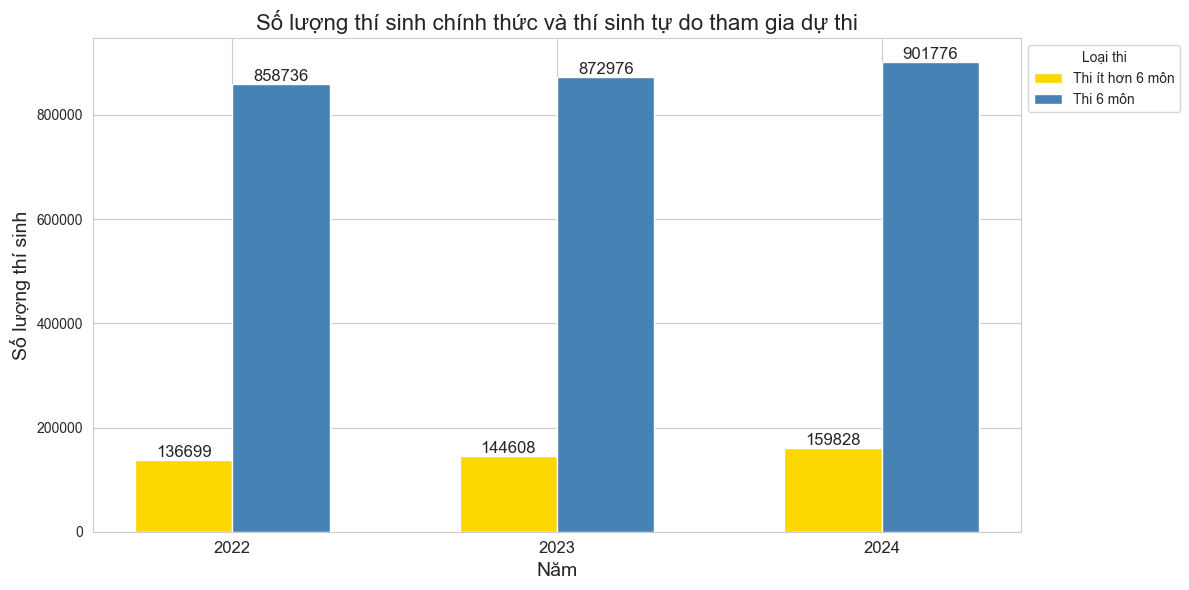

In [2]:
# Xử lý dữ liệu
not_null_2022 = df_2022[['toan','vat_li','hoa_hoc','ngoai_ngu','ngu_van','sinh_hoc','lich_su','dia_li','gdcd']].notna().sum(axis=1)
df_not_null_2022 = pd.DataFrame({
    'Số môn thi' : not_null_2022.value_counts().index,
    'Số lượng' : not_null_2022.value_counts().values,
})
df1 = pd.DataFrame({
    'Số môn thi': [' Thi 6 môn', ' Thi ít hơn 6 môn'],
    'Số lượng': [
        df_not_null_2022[df_not_null_2022['Số môn thi'] == 6]['Số lượng'].sum(),
        df_not_null_2022[df_not_null_2022['Số môn thi'] < 6]['Số lượng'].sum()
    ]
})

not_null_2023 = df_2023[['toan','vat_li','hoa_hoc','ngoai_ngu','ngu_van','sinh_hoc','lich_su','dia_li','gdcd']].notna().sum(axis=1)
df_not_null_2023 = pd.DataFrame({
    'Số môn thi' : not_null_2023.value_counts().index,
    'Số lượng' : not_null_2023.value_counts().values,
})
df2 = pd.DataFrame({
    'Số môn thi': [' Thi 6 môn', ' Thi ít hơn 6 môn'],
    'Số lượng': [
        df_not_null_2023[df_not_null_2023['Số môn thi'] == 6]['Số lượng'].sum(),
        df_not_null_2023[df_not_null_2023['Số môn thi'] < 6]['Số lượng'].sum()
    ]
})

not_null_2024 = df_2024[['toan','vat_li','hoa_hoc','ngoai_ngu','ngu_van','sinh_hoc','lich_su','dia_li','gdcd']].notna().sum(axis=1)
df_not_null_2024 = pd.DataFrame({
    'Số môn thi' : not_null_2024.value_counts().index,
    'Số lượng' : not_null_2024.value_counts().values,
})
df3 = pd.DataFrame({
    'Số môn thi': [' Thi 6 môn', ' Thi ít hơn 6 môn'],
    'Số lượng': [
        df_not_null_2024[df_not_null_2024['Số môn thi'] == 6]['Số lượng'].sum(),
        df_not_null_2024[df_not_null_2024['Số môn thi'] < 6]['Số lượng'].sum()
    ]
})

# Vẽ biểu đồ
df_bar = pd.DataFrame({
    'Năm': ['2022', '2023', '2024'],
    'Thi 6 môn': [df1['Số lượng'][0], df2['Số lượng'][0], df3['Số lượng'][0]],
    'Thi ít hơn 6 môn': [df1['Số lượng'][1], df2['Số lượng'][1], df3['Số lượng'][1]]
})

x = np.arange(len(df_bar['Năm']))
w = 0.3
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - w/2, df_bar['Thi ít hơn 6 môn'], w, label='Thi ít hơn 6 môn', color='#FFD700')
bar2 = ax.bar(x + w/2, df_bar['Thi 6 môn'], w, label='Thi 6 môn', color='#4682B4')

ax.set_title("Số lượng thí sinh chính thức và thí sinh tự do tham gia dự thi", fontsize=16)
ax.set_xlabel("Năm", fontsize=14)
ax.set_ylabel("Số lượng thí sinh", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_bar['Năm'], fontsize=12)
ax.legend(title='Loại thi', bbox_to_anchor=(1, 1), loc='upper left')

for bar_group in [bar1, bar2]:
    for bar in bar_group:
        res = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            res,
            f'{int(res)}',
            ha='center',
            va='bottom',
            fontsize=12
        )

plt.tight_layout()
plt.show()

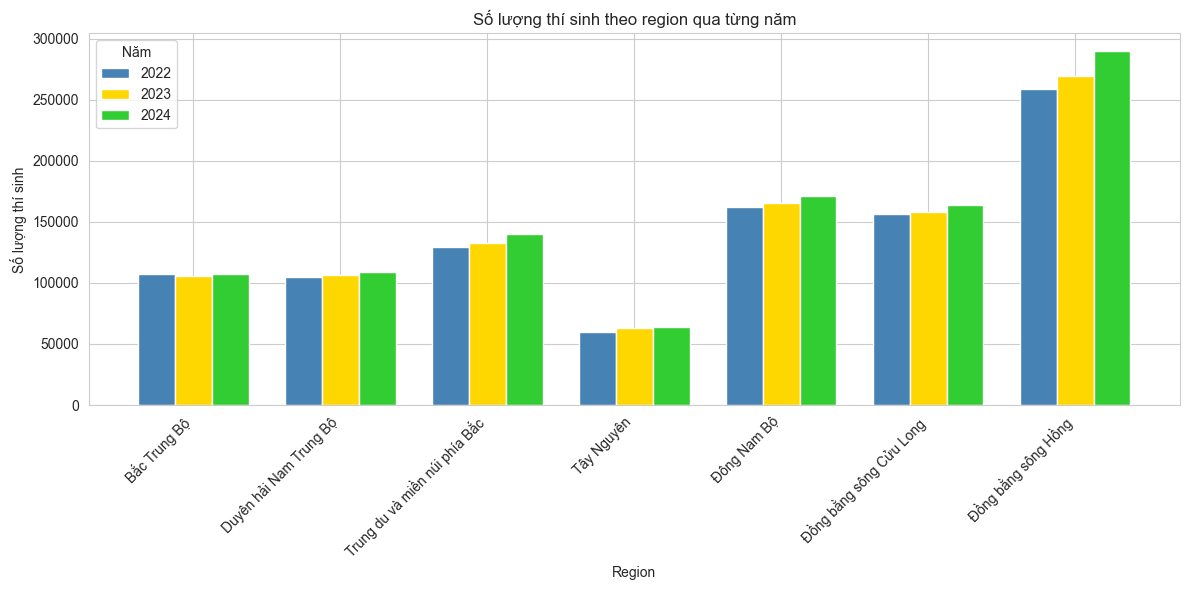

In [3]:
khu_vuc = {
    'Hà Nội': 'Đồng bằng sông Hồng',
    'TP. Hồ Chí Minh': 'Đông Nam Bộ',
    'Đà Nẵng': 'Duyên hải Nam Trung Bộ',
    'Cần Thơ': 'Đồng bằng sông Cửu Long',
    'Hải Phòng': 'Đồng bằng sông Hồng',
    'An Giang': 'Đồng bằng sông Cửu Long',
    'Bà Rịa - Vũng Tàu': 'Đông Nam Bộ',
    'Bắc Giang': 'Trung du và miền núi phía Bắc',
    'Bắc Kạn': 'Trung du và miền núi phía Bắc',
    'Bạc Liêu': 'Đồng bằng sông Cửu Long',
    'Bắc Ninh': 'Đồng bằng sông Hồng',
    'Bến Tre': 'Đồng bằng sông Cửu Long',
    'Bình Định': 'Duyên hải Nam Trung Bộ',
    'Bình Dương': 'Đông Nam Bộ',
    'Bình Phước': 'Đông Nam Bộ',
    'Bình Thuận': 'Duyên hải Nam Trung Bộ',
    'Cà Mau': 'Đồng bằng sông Cửu Long',
    'Cao Bằng': 'Trung du và miền núi phía Bắc',
    'Đăk Lăk': 'Tây Nguyên',
    'Đăk Nông': 'Tây Nguyên',
    'Điện Biên': 'Trung du và miền núi phía Bắc',
    'Đồng Nai': 'Đông Nam Bộ',
    'Đồng Tháp': 'Đồng bằng sông Cửu Long',
    'Gia Lai': 'Tây Nguyên',
    'Hà Giang': 'Trung du và miền núi phía Bắc',
    'Hà Nam': 'Đồng bằng sông Hồng',
    'Hải Dương': 'Đồng bằng sông Hồng',
    'Hòa Bình': 'Trung du và miền núi phía Bắc',
    'Hậu Giang': 'Đồng bằng sông Cửu Long',
    'Hưng Yên': 'Đồng bằng sông Hồng',
    'Khánh Hòa': 'Duyên hải Nam Trung Bộ',
    'Kiên Giang': 'Đồng bằng sông Cửu Long',
    'Kon Tum': 'Tây Nguyên',
    'Lai Châu': 'Trung du và miền núi phía Bắc',
    'Lâm Đồng': 'Tây Nguyên',
    'Lạng Sơn': 'Trung du và miền núi phía Bắc',
    'Lào Cai': 'Trung du và miền núi phía Bắc',
    'Long An': 'Đồng bằng sông Cửu Long',
    'Nam Định': 'Đồng bằng sông Hồng',
    'Nghệ An': 'Bắc Trung Bộ',
    'Ninh Bình': 'Đồng bằng sông Hồng',
    'Ninh Thuận': 'Duyên hải Nam Trung Bộ',
    'Phú Thọ': 'Trung du và miền núi phía Bắc',
    'Phú Yên': 'Duyên hải Nam Trung Bộ',
    'Quảng Bình': 'Bắc Trung Bộ',
    'Quảng Nam': 'Duyên hải Nam Trung Bộ',
    'Quảng Ngãi': 'Duyên hải Nam Trung Bộ',
    'Quảng Ninh': 'Đồng bằng sông Hồng',
    'Quảng Trị': 'Bắc Trung Bộ',
    'Sóc Trăng': 'Đồng bằng sông Cửu Long',
    'Sơn La': 'Trung du và miền núi phía Bắc',
    'Tây Ninh': 'Đông Nam Bộ',
    'Thái Bình': 'Đồng bằng sông Hồng',
    'Thái Nguyên': 'Trung du và miền núi phía Bắc',
    'Thanh Hóa': 'Bắc Trung Bộ',
    'Thừa Thiên Huế': 'Bắc Trung Bộ',
    'Tiền Giang': 'Đồng bằng sông Cửu Long',
    'Trà Vinh': 'Đồng bằng sông Cửu Long',
    'Tuyên Quang': 'Trung du và miền núi phía Bắc',
    'Vĩnh Long': 'Đồng bằng sông Cửu Long',
    'Vĩnh Phúc': 'Đồng bằng sông Hồng',
    'Yên Bái': 'Trung du và miền núi phía Bắc'
}

df_region = pd.DataFrame({'tinh_thanh' : khu_vuc.keys(), 'mien' : khu_vuc.values()})

re_2022 = df_2022['tinh_thi'].value_counts()
re_2023 = df_2023['tinh_thi'].value_counts()
re_2024 = df_2024['tinh_thi'].value_counts()

df_re_2022 = pd.DataFrame({'tinh_thanh': re_2022.index, 'so_luong': re_2022.values})
df_re_2022 = df_re_2022.merge(df_region, on='tinh_thanh', how='inner')
df_re_2022 = df_re_2022.groupby('mien')['so_luong'].sum().reset_index()

df_re_2023 = pd.DataFrame({'tinh_thanh': re_2023.index, 'so_luong': re_2023.values})
df_re_2023 = df_re_2023.merge(df_region, on='tinh_thanh', how='inner')
df_re_2023 = df_re_2023.groupby('mien')['so_luong'].sum().reset_index()

df_re_2024 = pd.DataFrame({'tinh_thanh': re_2024.index, 'so_luong': re_2024.values})
df_re_2024 = df_re_2024.merge(df_region, on='tinh_thanh', how='inner')
df_re_2024 = df_re_2024.groupby('mien')['so_luong'].sum().reset_index()


x = np.arange(len(df_re_2024['mien']))
w = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - w, df_re_2022['so_luong'], w, label='2022', color='#4682B4')
ax.bar(x, df_re_2023['so_luong'], w, label='2023', color='#FFD700')
ax.bar(x + w, df_re_2024['so_luong'], w, label='2024', color='#32CD32')

# Add labels and title
ax.set_title("Số lượng thí sinh theo region qua từng năm")
ax.set_xlabel("Region")
ax.set_ylabel("Số lượng thí sinh")
ax.set_xticks(x)
ax.set_xticklabels(df_re_2024['mien'], rotation=45, ha='right')
ax.legend(title="Năm")

plt.tight_layout()
plt.show()


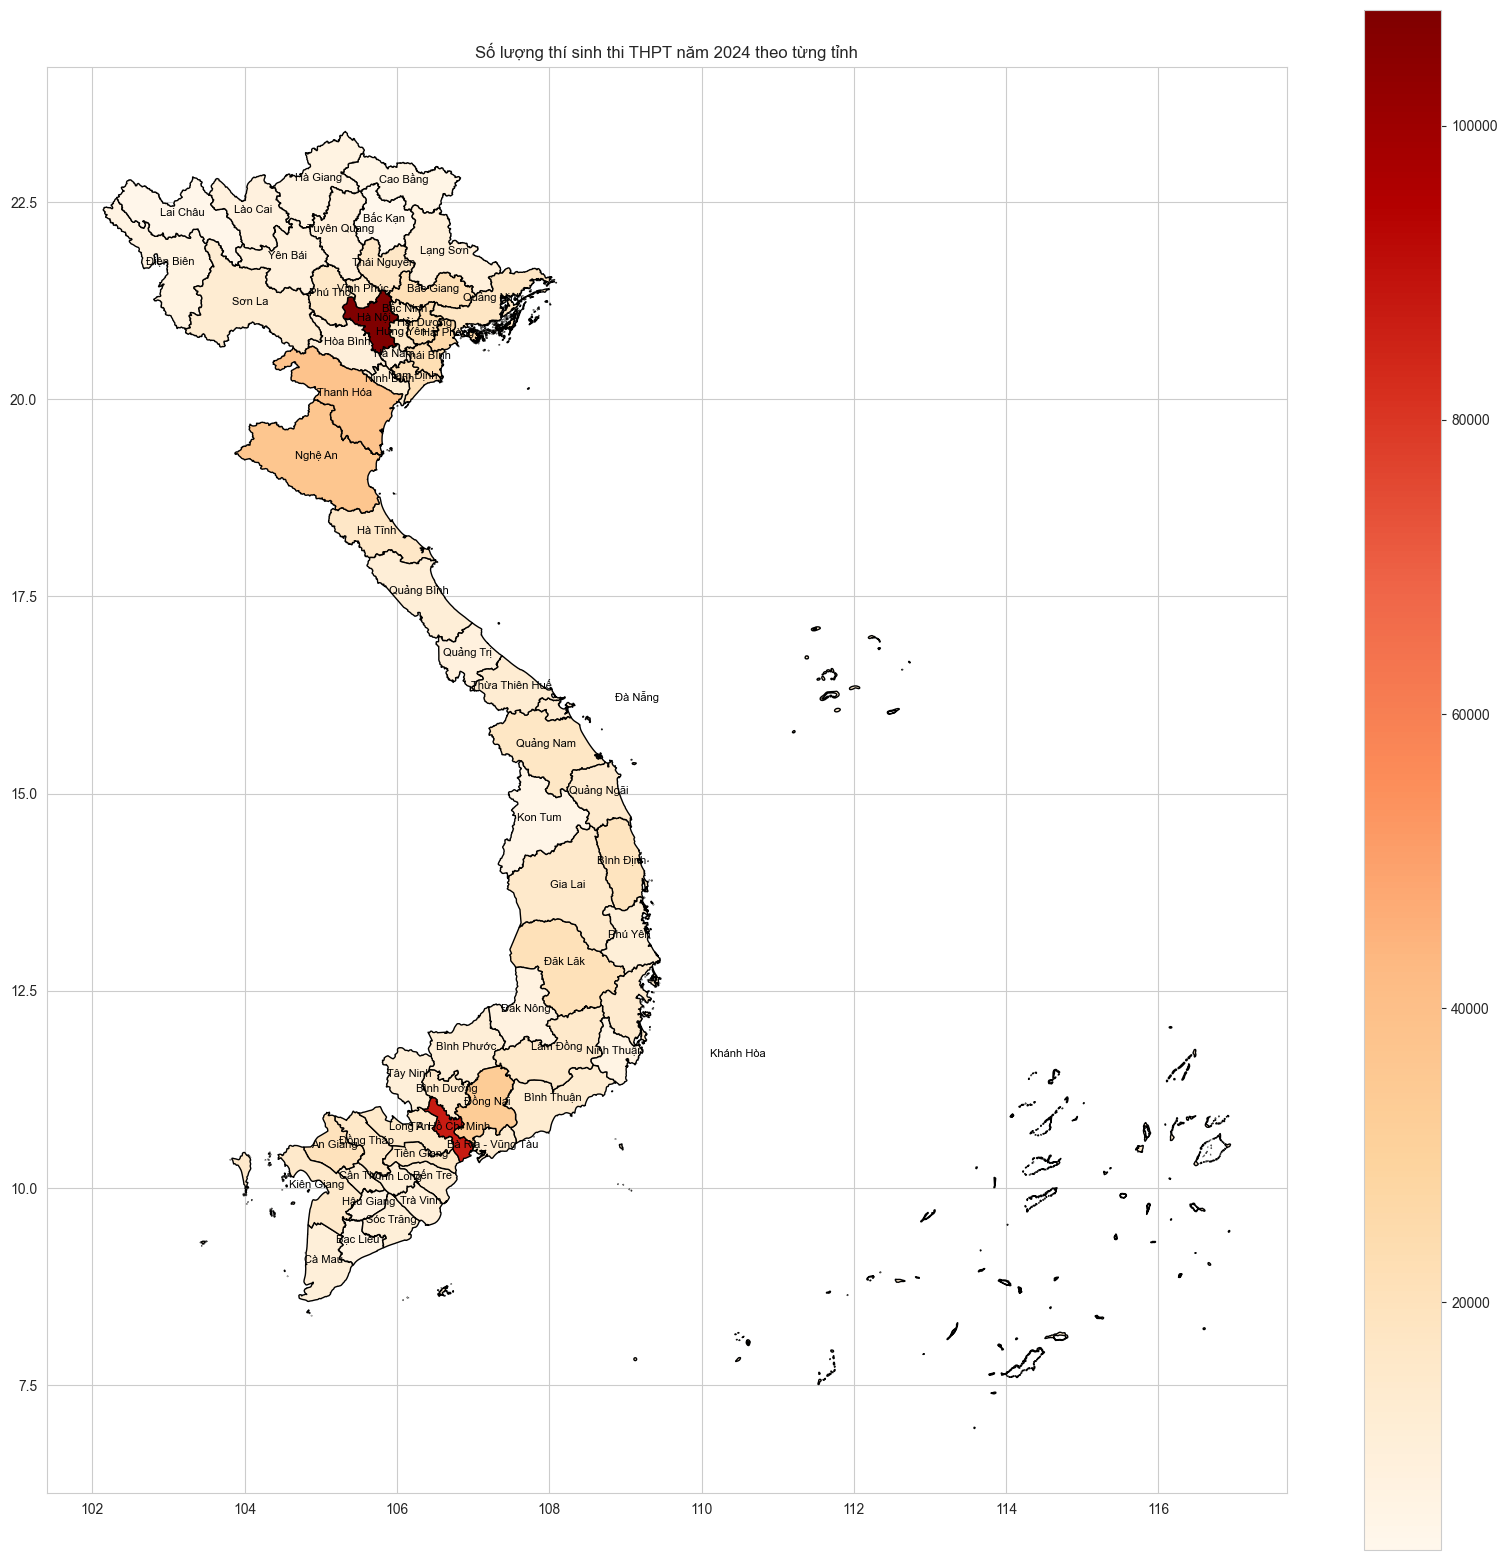

In [4]:
# Đọc dữ liệu
gdf = gpd.read_file('diaphantinh.geojson')
df_2024 = pd.read_csv('diem2024.csv')
soluong_2024 = df_2024['tinh_thi'].value_counts()
# Tạo DataFrame để vẽ biểu đồ
df_soluong2024 = pd.DataFrame({
    'Tỉnh thi': soluong_2024.index,
    'Số lượng': soluong_2024.values
})

# Kết nối cột 'Tỉnh thi' của dataframe với cột tên tỉnh trong biểu đồ geojson
g2024 = gdf.merge(df_soluong2024, left_on='ten_tinh', right_on='Tỉnh thi', how='inner')

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(20, 20))
g2024.plot(column='Số lượng', ax=ax, cmap='OrRd', edgecolor='black', legend=True)

for idx, r in gdf.iterrows():
    x, y = r['geometry'].centroid.x, r['geometry'].centroid.y
    ax.text(x, y, r['ten_tinh'], fontsize=8, ha='center', color='black')

# Tùy chỉnh
ax.set_title('Số lượng thí sinh thi THPT năm 2024 theo từng tỉnh')
plt.show()

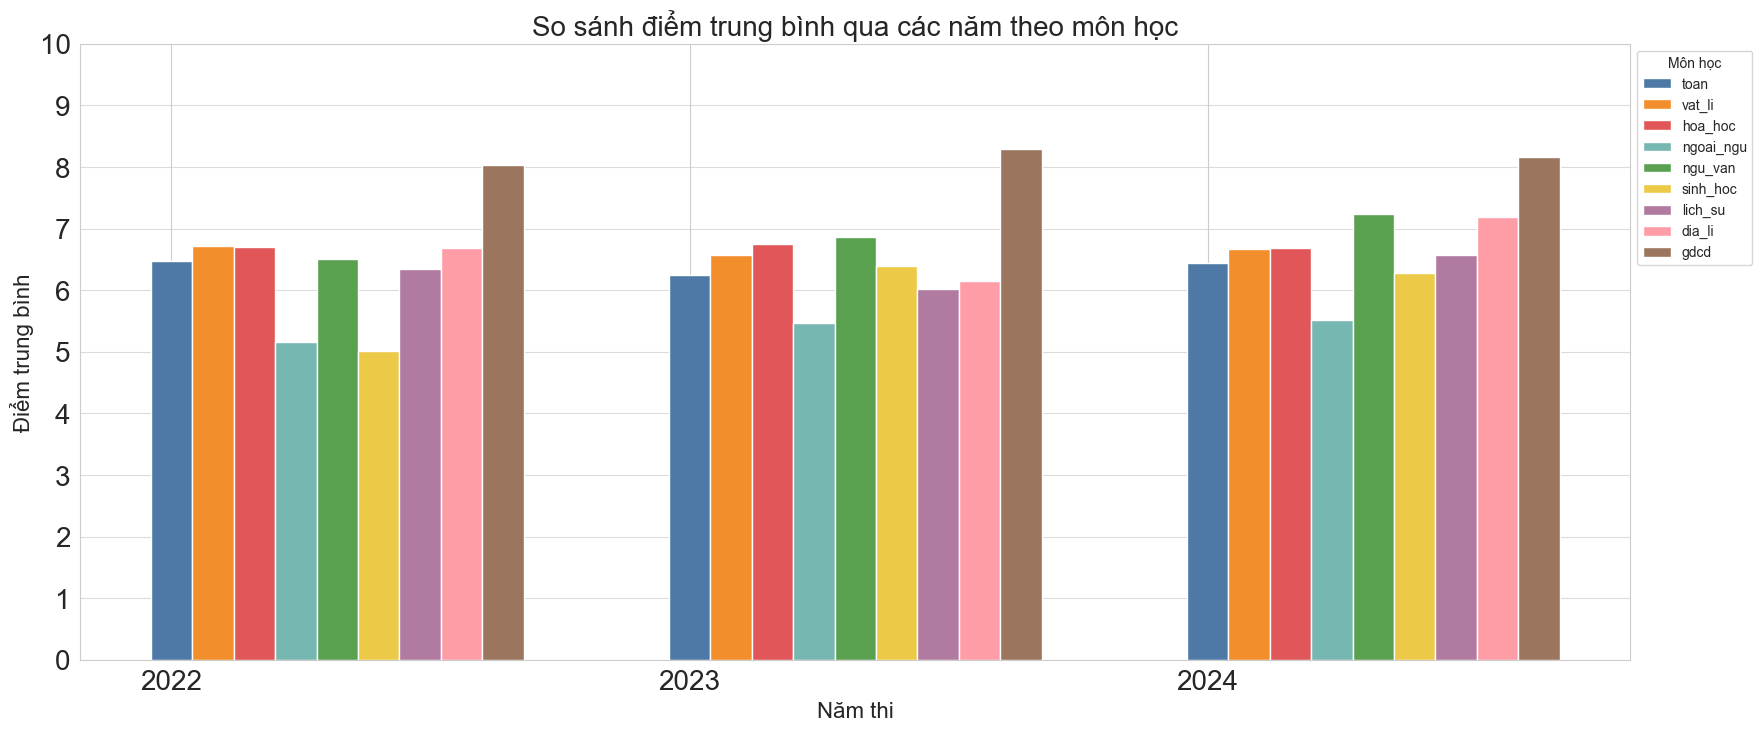

In [5]:
# OverView về điểm trung bình từng môn qua các năm
mon_hoc = ['toan','vat_li','hoa_hoc','ngoai_ngu','ngu_van','sinh_hoc','lich_su','dia_li','gdcd']
def diem_tb(df) :
    df_diemtb = df[mon_hoc].mean()
    return df_diemtb

tb_2022 = diem_tb(df_2022)
tb_2023 = diem_tb(df_2023)
tb_2024 = diem_tb(df_2024)
df_tb_2022 = pd.DataFrame({'Môn học' : tb_2022.index, 'Điểm Tbinh' : tb_2022.values, 'Năm' : 2022})
df_tb_2023 = pd.DataFrame({'Môn học' : tb_2023.index, 'Điểm Tbinh' : tb_2023.values, 'Năm' : 2023})
df_tb_2024 = pd.DataFrame({'Môn học' : tb_2024.index, 'Điểm Tbinh' : tb_2024.values, 'Năm' : 2024})

df_tb_all = pd.concat([df_tb_2022 , df_tb_2023 , df_tb_2024 ], ignore_index=True)

colors = [
    "#4E79A7",
    "#F28E2B",
    "#E15759",
    "#76B7B2",
    "#59A14F",
    "#EDC948",
    "#B07AA1",
    "#FF9DA7",
    "#9C755F"
]

plt.figure(figsize = (20,8))
for i,(s,color) in enumerate(zip(mon_hoc,colors)) :
    plt.bar(
        df_tb_all.loc[df_tb_all['Môn học'] == s, 'Năm'] + i * 0.08,
        df_tb_all.loc[df_tb_all['Môn học'] == s, 'Điểm Tbinh'],
        width = 0.08,
        label = s,
        color = color
    )
plt.xticks([2022,2023,2024], size = 20)
plt.yticks(np.arange(0,11), size = 20)
plt.xlabel('Năm thi', size = 16)
plt.ylabel('Điểm trung bình', size = 16)
plt.title('So sánh điểm trung bình qua các năm theo môn học', size = 20)
plt.legend(title='Môn học', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

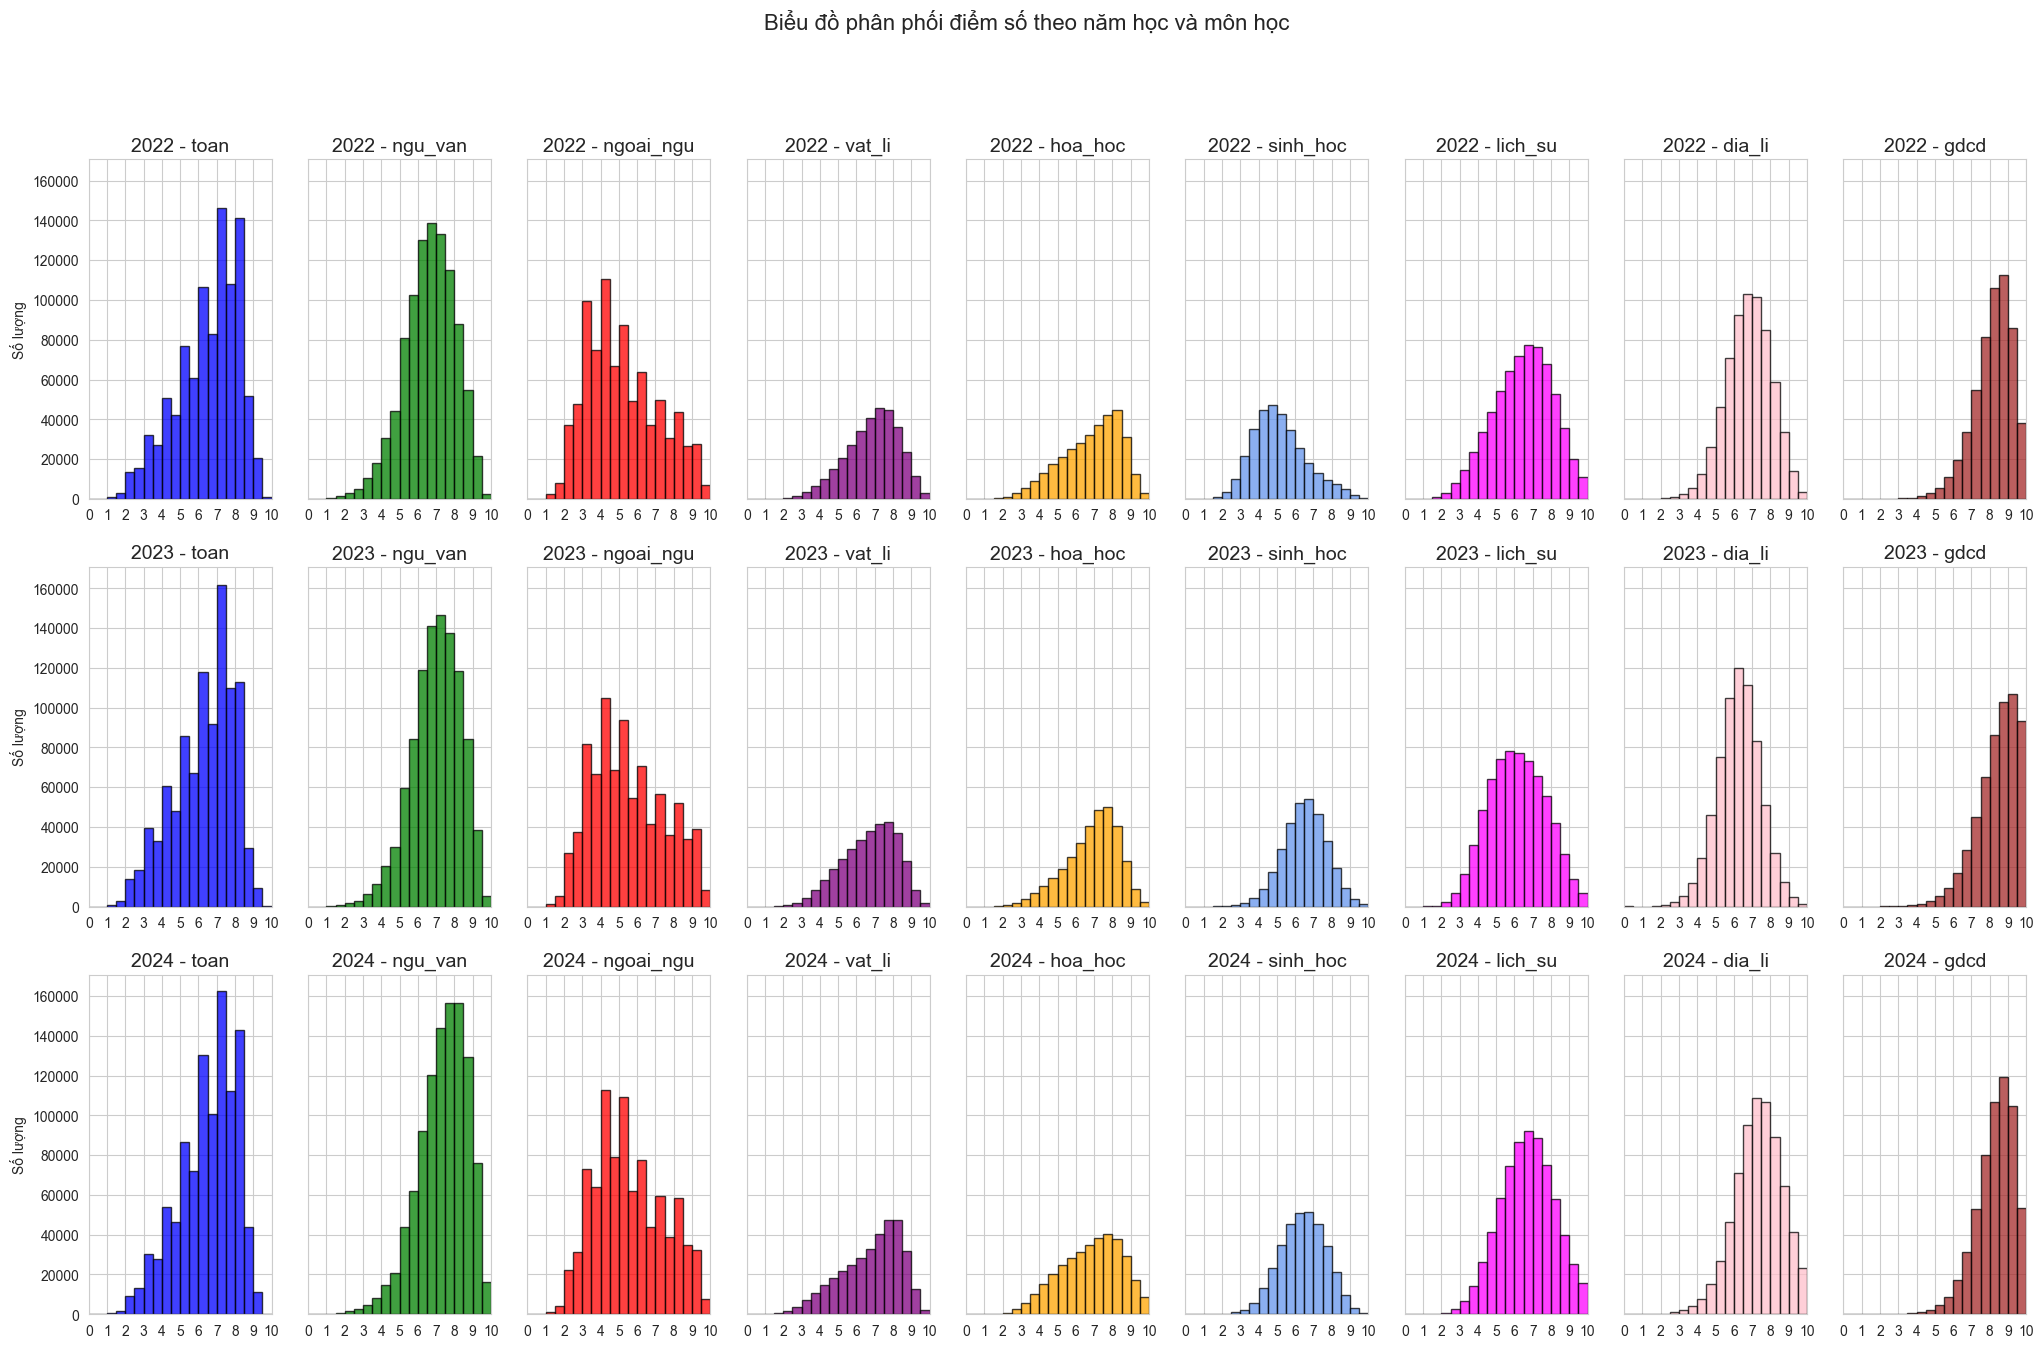

In [6]:
nam_hoc = [2022, 2023, 2024]
mon_hoc = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

mau_mon_hoc = {
    'toan': 'blue',
    'ngu_van': 'green',
    'ngoai_ngu': 'red',
    'vat_li': 'purple',
    'hoa_hoc': 'orange',
    'sinh_hoc': 'cornflowerblue',
    'lich_su': 'magenta',
    'dia_li': 'pink',
    'gdcd': 'brown'
}

fig, axes = plt.subplots(len(nam_hoc), len(mon_hoc), figsize=(25, 15), sharey=True)
fig.suptitle('Biểu đồ phân phối điểm số theo năm học và môn học', fontsize=16)

for i, nam in enumerate(nam_hoc):
    for j, mon in enumerate(mon_hoc):
        du_lieu_theo_nam = df_all[df_all['nam_thi'] == nam]
        diem_mon_hoc = du_lieu_theo_nam[mon]
        mau = mau_mon_hoc[mon]
        ax = axes[i, j]
        ax.hist(
            diem_mon_hoc,
            bins=20,
            range=(0, 10),
            alpha=0.75,
            color=mau,
            edgecolor='black'
        )

        ax.set_title(f"{nam} - {mon}", fontsize=14)
        ax.set_xlim(0, 10)
        ax.set_xticks(range(0, 11))
        if j == 0:
            ax.set_ylabel('Số lượng')

plt.show()


# Phân tích điểm các môn và xử lý giả thuyết

# Môn Toán

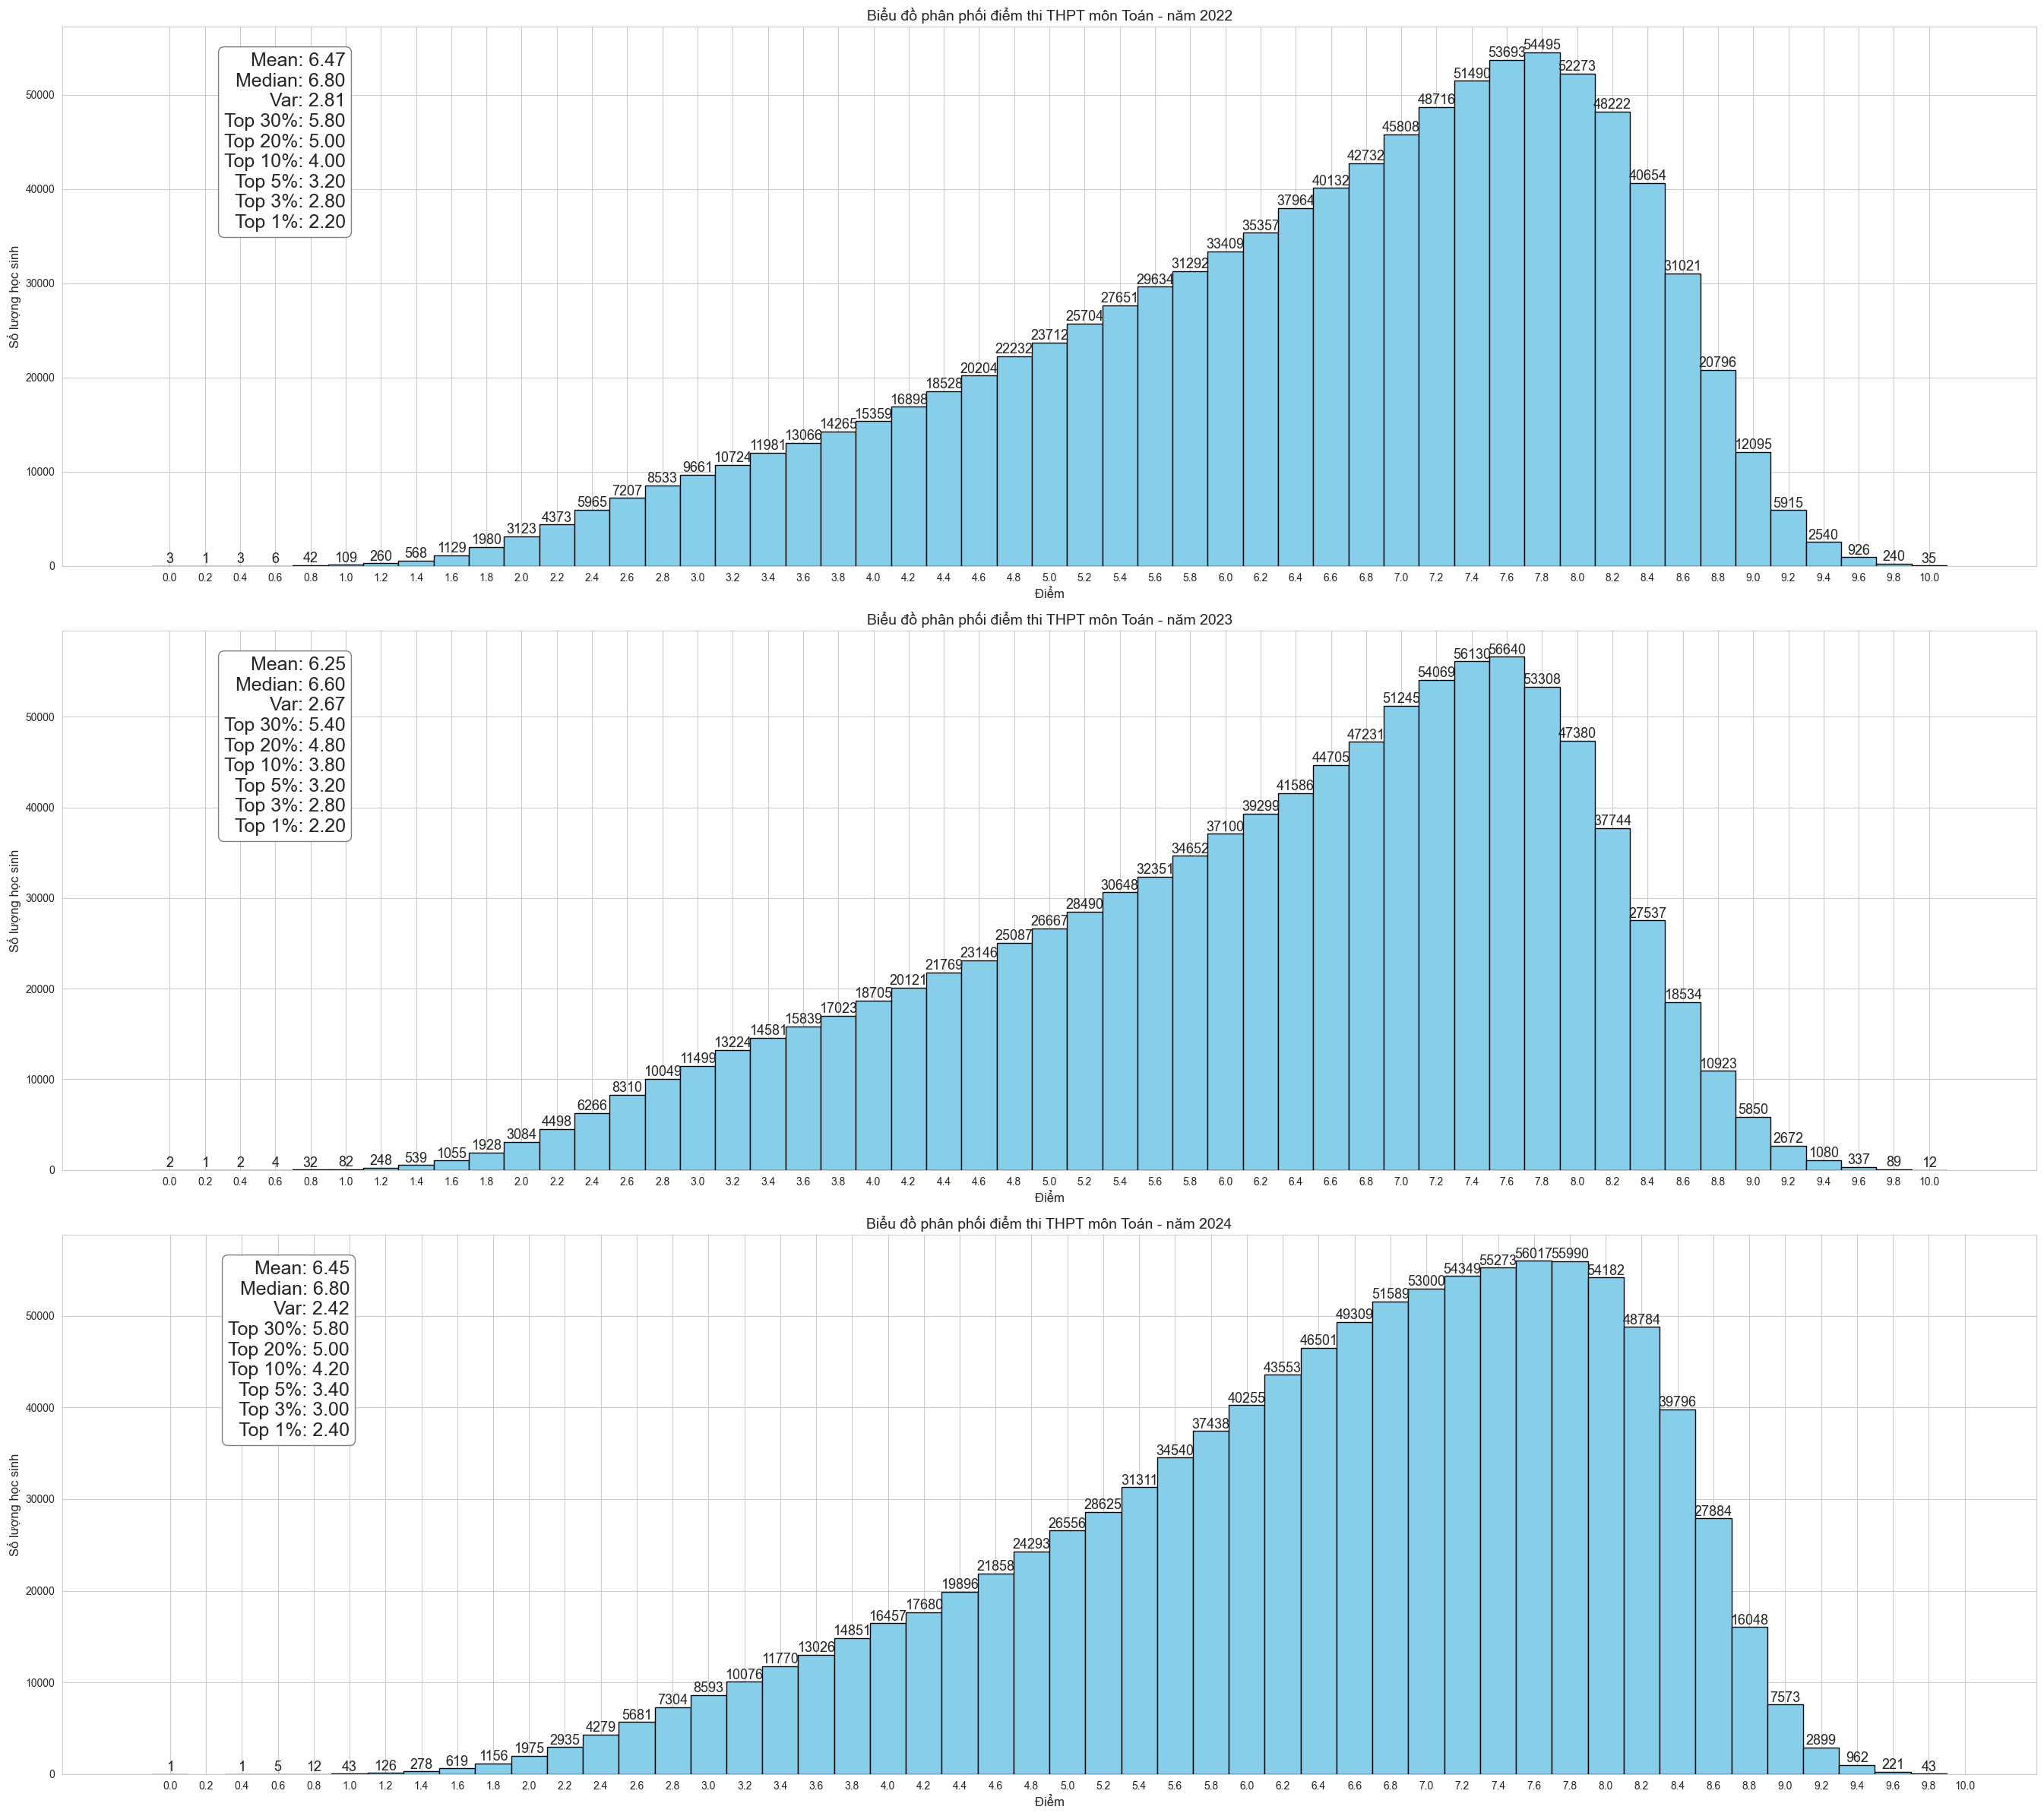

In [7]:
df = [df_2022, df_2023, df_2024]
years = [2022, 2023, 2024]

plt.figure(figsize=(27,24))

for i, (df, year) in enumerate(zip(df, years)):
    scores = df['toan'].dropna()
    a = scores.value_counts().sort_index()
    mean = scores.mean()
    median = scores.median()
    var = scores.var()
    percentiles = {
        f"Top {p}%": np.percentile(scores,p) for p in [30, 20, 10, 5, 3, 1]
    }
    stats_text = (
        f"Mean: {mean:.2f}\n"
        f"Median: {median:.2f}\n"
        f"Var: {var:.2f}\n"
        + "\n".join([f"{k}: {val:.2f}" for k, val in percentiles.items()])
    )

    plt.subplot(3, 1, i + 1)
    plt.bar(x=a.index, height=a.values, edgecolor='black', color='skyblue', width=0.2)
    plt.title(f'Biểu đồ phân phối điểm thi THPT môn Toán - năm {year}', fontsize=14)
    plt.xlabel('Điểm', fontsize=12)
    plt.ylabel('Số lượng học sinh', fontsize=12)

    for j in range(len(a)):
        plt.text(a.index[j], a.values[j] + 300, str(a.values[j]), ha='center', fontsize=13)

    plt.text(
        1, max(a.values) * 1, stats_text, fontsize=18,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
    )

    plt.xticks([i * 0.2 for i in range(51)])

plt.tight_layout()
plt.show()


Tổng số thí sinh thi môn toán là : 1045613


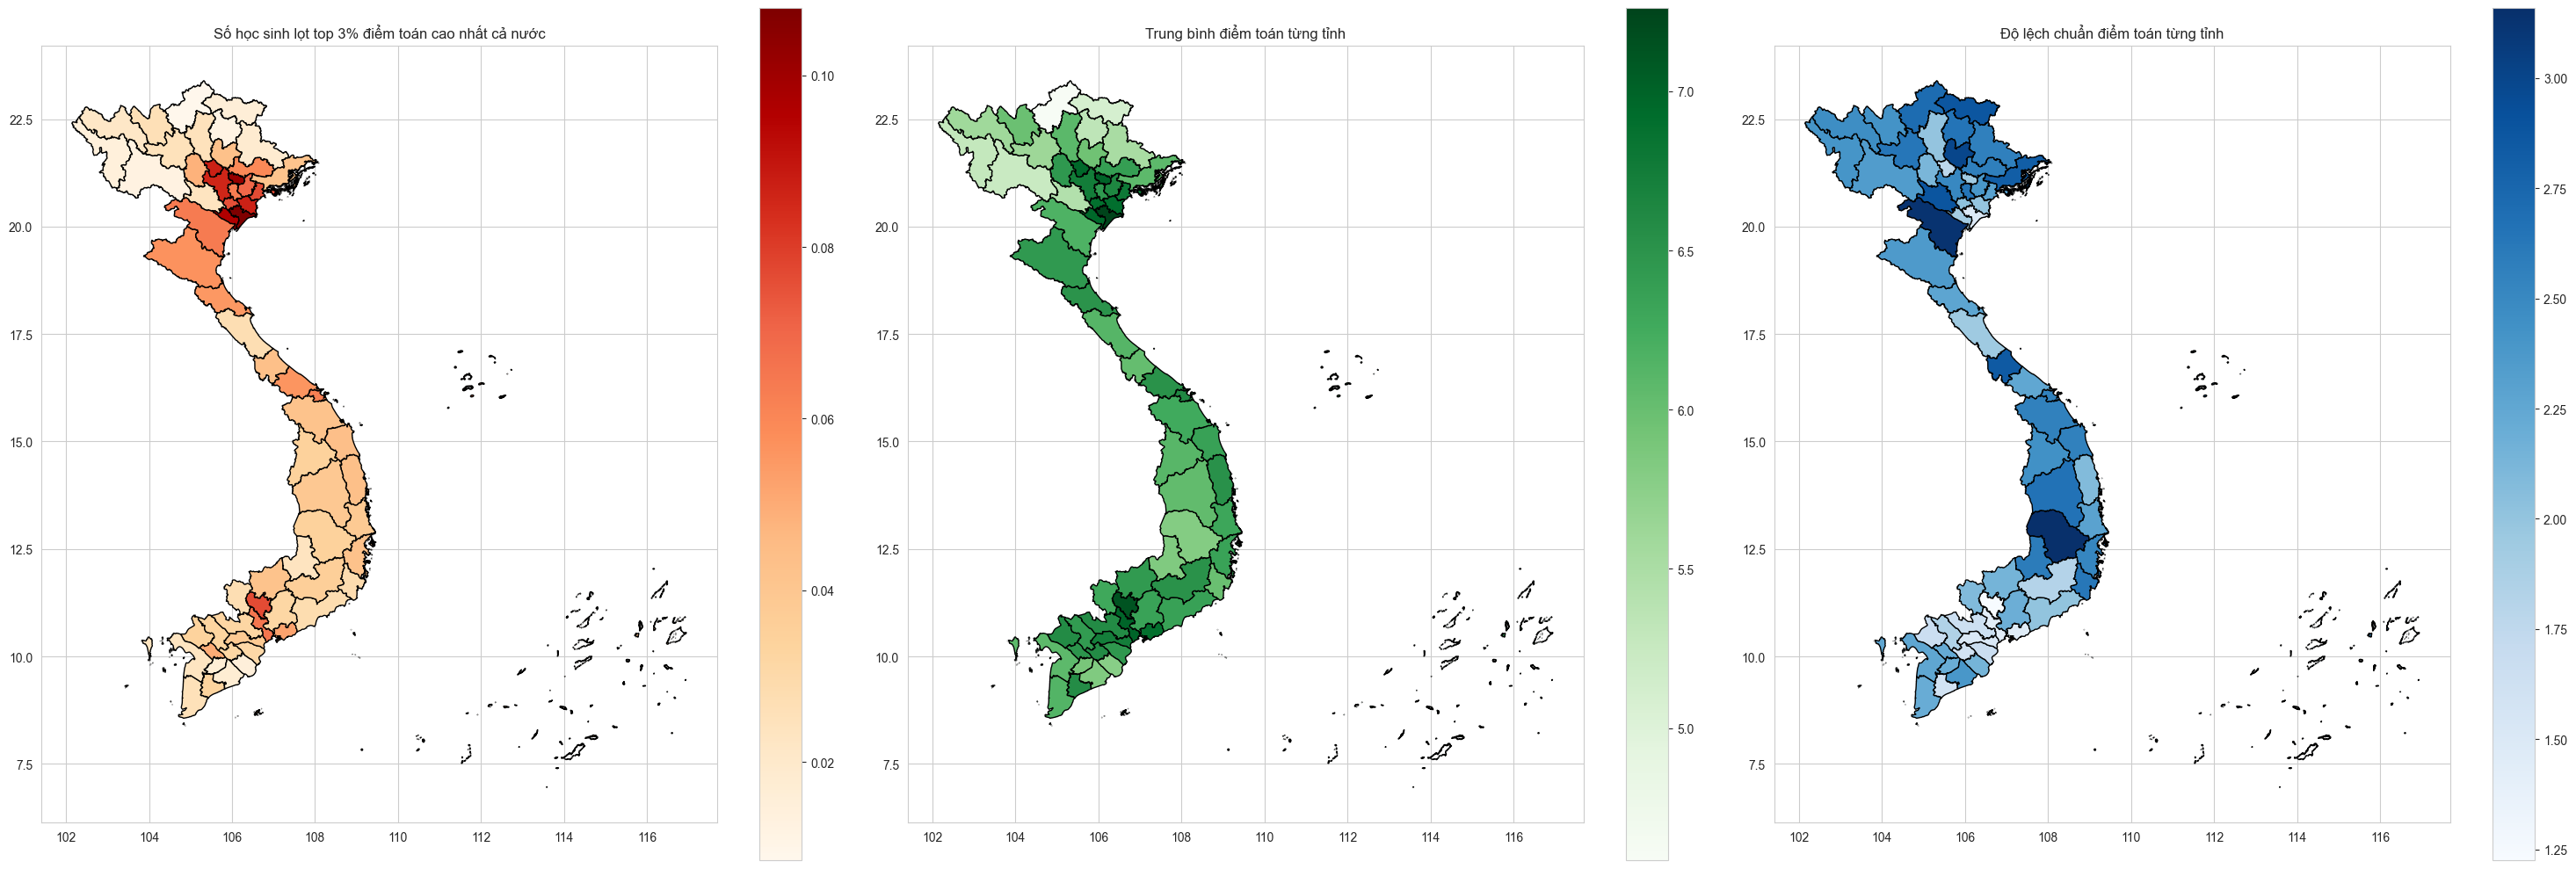

In [8]:
# ĐIỂM MÔN TOÁN Năm 2024 lọt top 3%
gdf = gpd.read_file('diaphantinh.geojson')
toan = df_2024[['toan','tinh_thi']].dropna()
print('Tổng số thí sinh thi môn toán là : '+ str(len(toan)))

tong = toan['tinh_thi'].value_counts()
top3= toan[toan['toan'] >= toan['toan'].quantile(0.97)]
Sr_top3 = top3['tinh_thi'].value_counts()
df_top3 = pd.DataFrame({
    'Tỉnh thi' : Sr_top3.index,
    'Tỉ lệ thí sinh lọt top 3%': (Sr_top3 / tong.loc[Sr_top3.index]).values
})
gdf_top3 = gdf.merge(df_top3, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH TRUNG BÌNH TỪNG TỈNH
mean_toan = toan.groupby('tinh_thi')['toan'].mean().reset_index()
mean_toan.columns = ['Tỉnh thi', 'Trung bình điểm toán']
gdf_mean = gdf.merge(mean_toan, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH ĐỘ LỆCH CHUẨN TỪNG TỈNH (VAR)
var_toan = toan.groupby('tinh_thi')['toan'].var().reset_index()
var_toan.columns = ['Tỉnh thi', 'Độ lệch chuẩn điểm toán']
gdf_var = gdf.merge(var_toan, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# Thiết lập kích thước và bố cục
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Biểu đồ 1: Top 3% điểm Toán
gdf_top3.plot(
    column='Tỉ lệ thí sinh lọt top 3%',
    ax=axes[0],
    cmap='OrRd',
    edgecolor='black',
    legend=True
)
axes[0].set_title('Số học sinh lọt top 3% điểm toán cao nhất cả nước')
# for idx, r in gdf.iterrows():
#     x, y = r['geometry'].centroid.x, r['geometry'].centroid.y
#     axes[0].text(x, y, r['ten_tinh'], fontsize=8, ha='center', color='black')

# Biểu đồ 2: Trung bình điểm Toán
gdf_mean.plot(
    column='Trung bình điểm toán',
    ax=axes[1],
    cmap='Greens',
    edgecolor='black',
    legend=True
)
axes[1].set_title('Trung bình điểm toán từng tỉnh')
# for idx, r in gdf.iterrows():
#     x, y = r['geometry'].centroid.x, r['geometry'].centroid.y
#     axes[1].text(x, y, r['ten_tinh'], fontsize=8, ha='center', color='black')

# Biểu đồ 3: Độ lệch chuẩn điểm Toán
gdf_var.plot(
    column='Độ lệch chuẩn điểm toán',
    ax=axes[2],
    cmap='Blues',
    edgecolor='black',
    legend=True
)
axes[2].set_title('Độ lệch chuẩn điểm toán từng tỉnh')
# for idx, r in gdf.iterrows():
#     x, y = r['geometry'].centroid.x, r['geometry'].centroid.y
#     axes[2].text(x, y, r['ten_tinh'], fontsize=8, ha='center', color='black')

# Tùy chỉnh và hiển thị
plt.tight_layout()
plt.show()



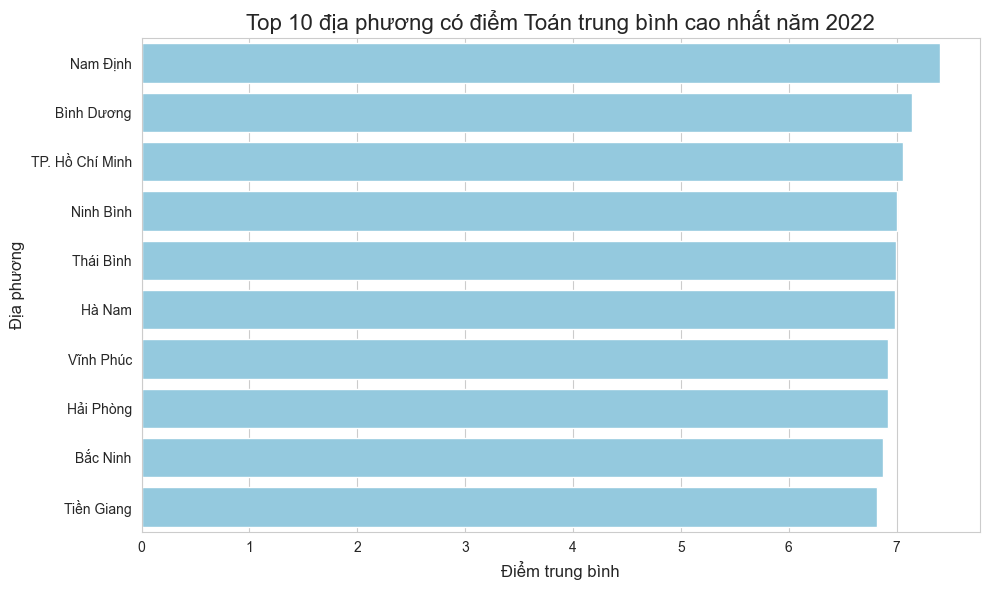

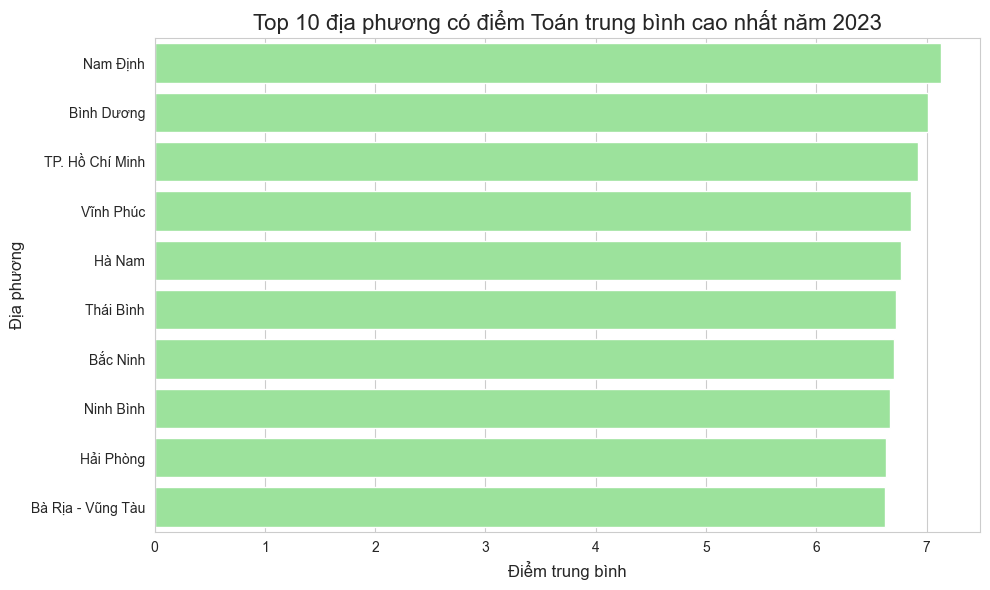

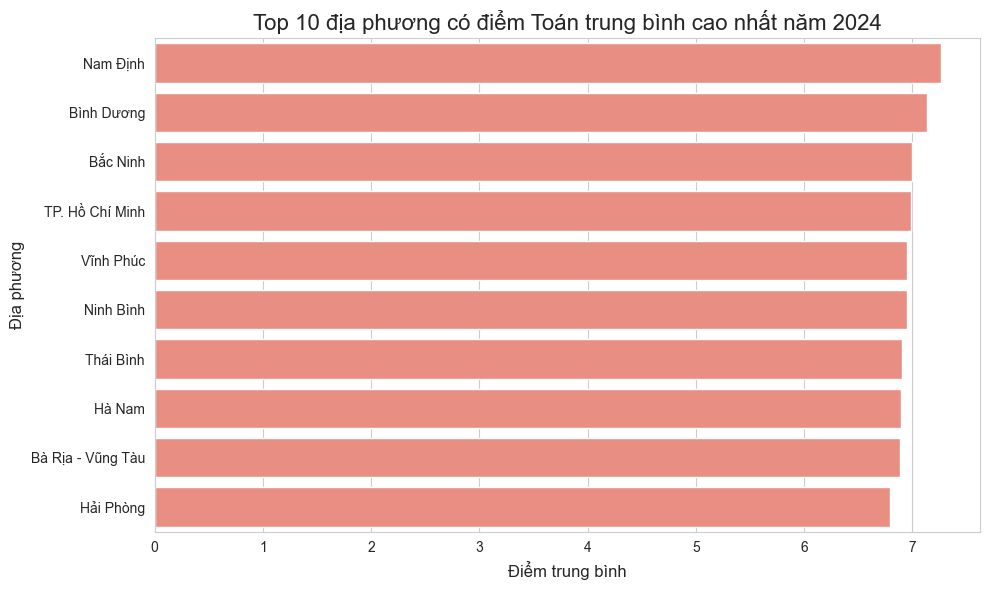

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm xử lý và lấy top 10 địa phương có điểm trung bình Toán cao nhất
def top10_tinh_theo_nam(data, nam):
    avg_scores = data.groupby("tinh_thi")["toan"].mean().sort_values(ascending=False).head(10)
    return avg_scores.reset_index()  # Đưa về DataFrame để dễ sử dụng với Seaborn

# Tính điểm trung bình top 10 cho từng năm
top10_2022 = top10_tinh_theo_nam(df_2022, 2022)
top10_2023 = top10_tinh_theo_nam(df_2023, 2023)
top10_2024 = top10_tinh_theo_nam(df_2024, 2024)

# Vẽ biểu đồ cho từng năm

# Biểu đồ cho năm 2022
plt.figure(figsize=(10, 6))
sns.barplot(
    x='toan',
    y='tinh_thi',
    data=top10_2022,
    color = 'skyblue'
)
plt.title("Top 10 địa phương có điểm Toán trung bình cao nhất năm 2022", fontsize=16)
plt.xlabel("Điểm trung bình", fontsize=12)
plt.ylabel("Địa phương", fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ cho năm 2023
plt.figure(figsize=(10, 6))
sns.barplot(
    x='toan',
    y='tinh_thi',
    data=top10_2023,
    color = 'lightgreen'
)
plt.title("Top 10 địa phương có điểm Toán trung bình cao nhất năm 2023", fontsize=16)
plt.xlabel("Điểm trung bình", fontsize=12)
plt.ylabel("Địa phương", fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ cho năm 2024
plt.figure(figsize=(10, 6))
sns.barplot(
    x='toan',
    y='tinh_thi',
    data=top10_2024,
    color = 'salmon'
)
plt.title("Top 10 địa phương có điểm Toán trung bình cao nhất năm 2024", fontsize=16)
plt.xlabel("Điểm trung bình", fontsize=12)
plt.ylabel("Địa phương", fontsize=12)
plt.tight_layout()
plt.show()


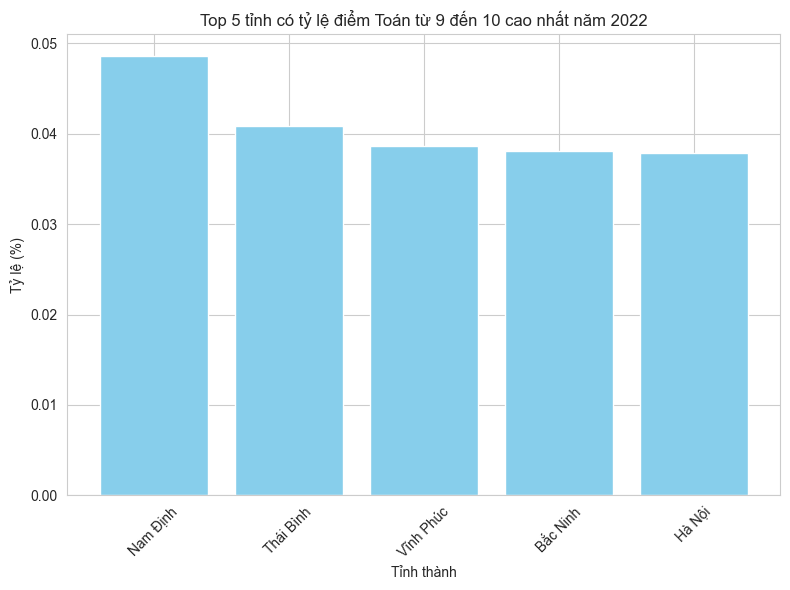

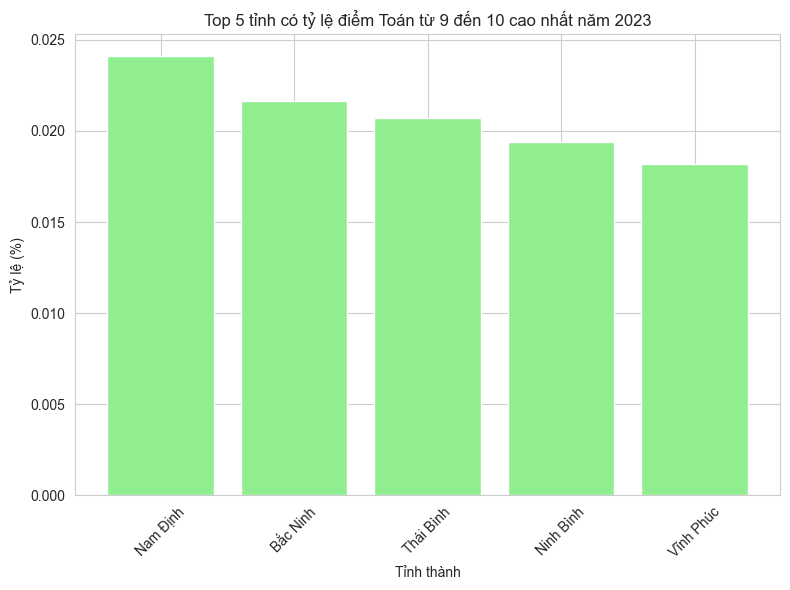

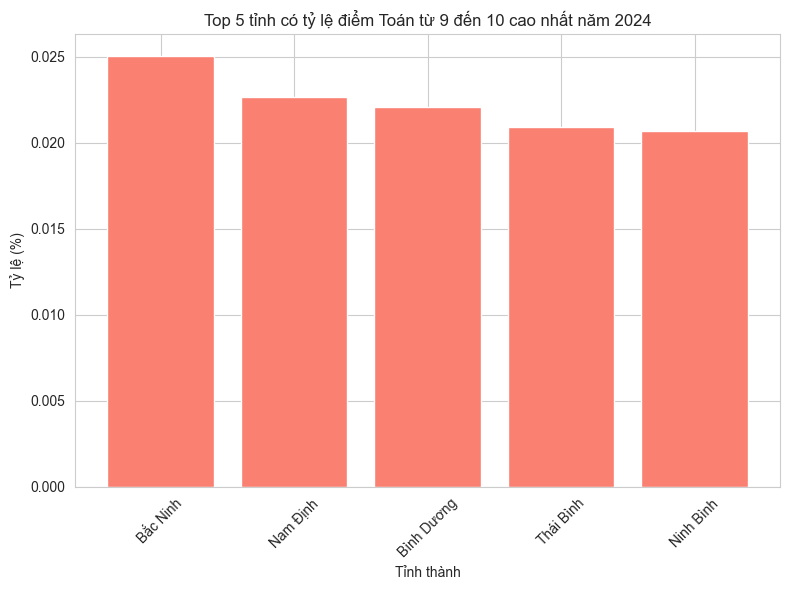

In [10]:
# Hàm tính tỷ lệ điểm Toán từ 9 đến 10
def calc_ratio(data):
    # Đếm số lượng học sinh có điểm từ 9 đến 10
    count_9_to_10 = data[(data["toan"] >= 9) & (data["toan"] <= 10)].groupby("tinh_thi")["toan"].count()
    # Đếm tổng số học sinh theo tỉnh
    total_students = data.groupby("tinh_thi")["toan"].count()
    # Tính tỷ lệ
    ratio = (count_9_to_10 / total_students).fillna(0)  # Xử lý các giá trị NaN nếu không có điểm 9-10
    return ratio

# Tính tỷ lệ cho từng năm
ratio_2022 = calc_ratio(df_2022)
ratio_2023 = calc_ratio(df_2023)
ratio_2024 = calc_ratio(df_2024)

# Lấy 5 tỉnh có tỷ lệ cao nhất
top5_2022 = ratio_2022.sort_values(ascending=False).head(5)
top5_2023 = ratio_2023.sort_values(ascending=False).head(5)
top5_2024 = ratio_2024.sort_values(ascending=False).head(5)

# Vẽ biểu đồ cho từng năm

# Biểu đồ năm 2022
plt.figure(figsize=(8, 6))
plt.bar(top5_2022.index, top5_2022.values, color='skyblue')
plt.title("Top 5 tỉnh có tỷ lệ điểm Toán từ 9 đến 10 cao nhất năm 2022")
plt.xlabel("Tỉnh thành")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ năm 2023
plt.figure(figsize=(8, 6))
plt.bar(top5_2023.index, top5_2023.values, color='lightgreen')
plt.title("Top 5 tỉnh có tỷ lệ điểm Toán từ 9 đến 10 cao nhất năm 2023")
plt.xlabel("Tỉnh thành")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ năm 2024
plt.figure(figsize=(8, 6))
plt.bar(top5_2024.index, top5_2024.values, color='salmon')
plt.title("Top 5 tỉnh có tỷ lệ điểm Toán từ 9 đến 10 cao nhất năm 2024")
plt.xlabel("Tỉnh thành")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Môn Ngoại Ngữ

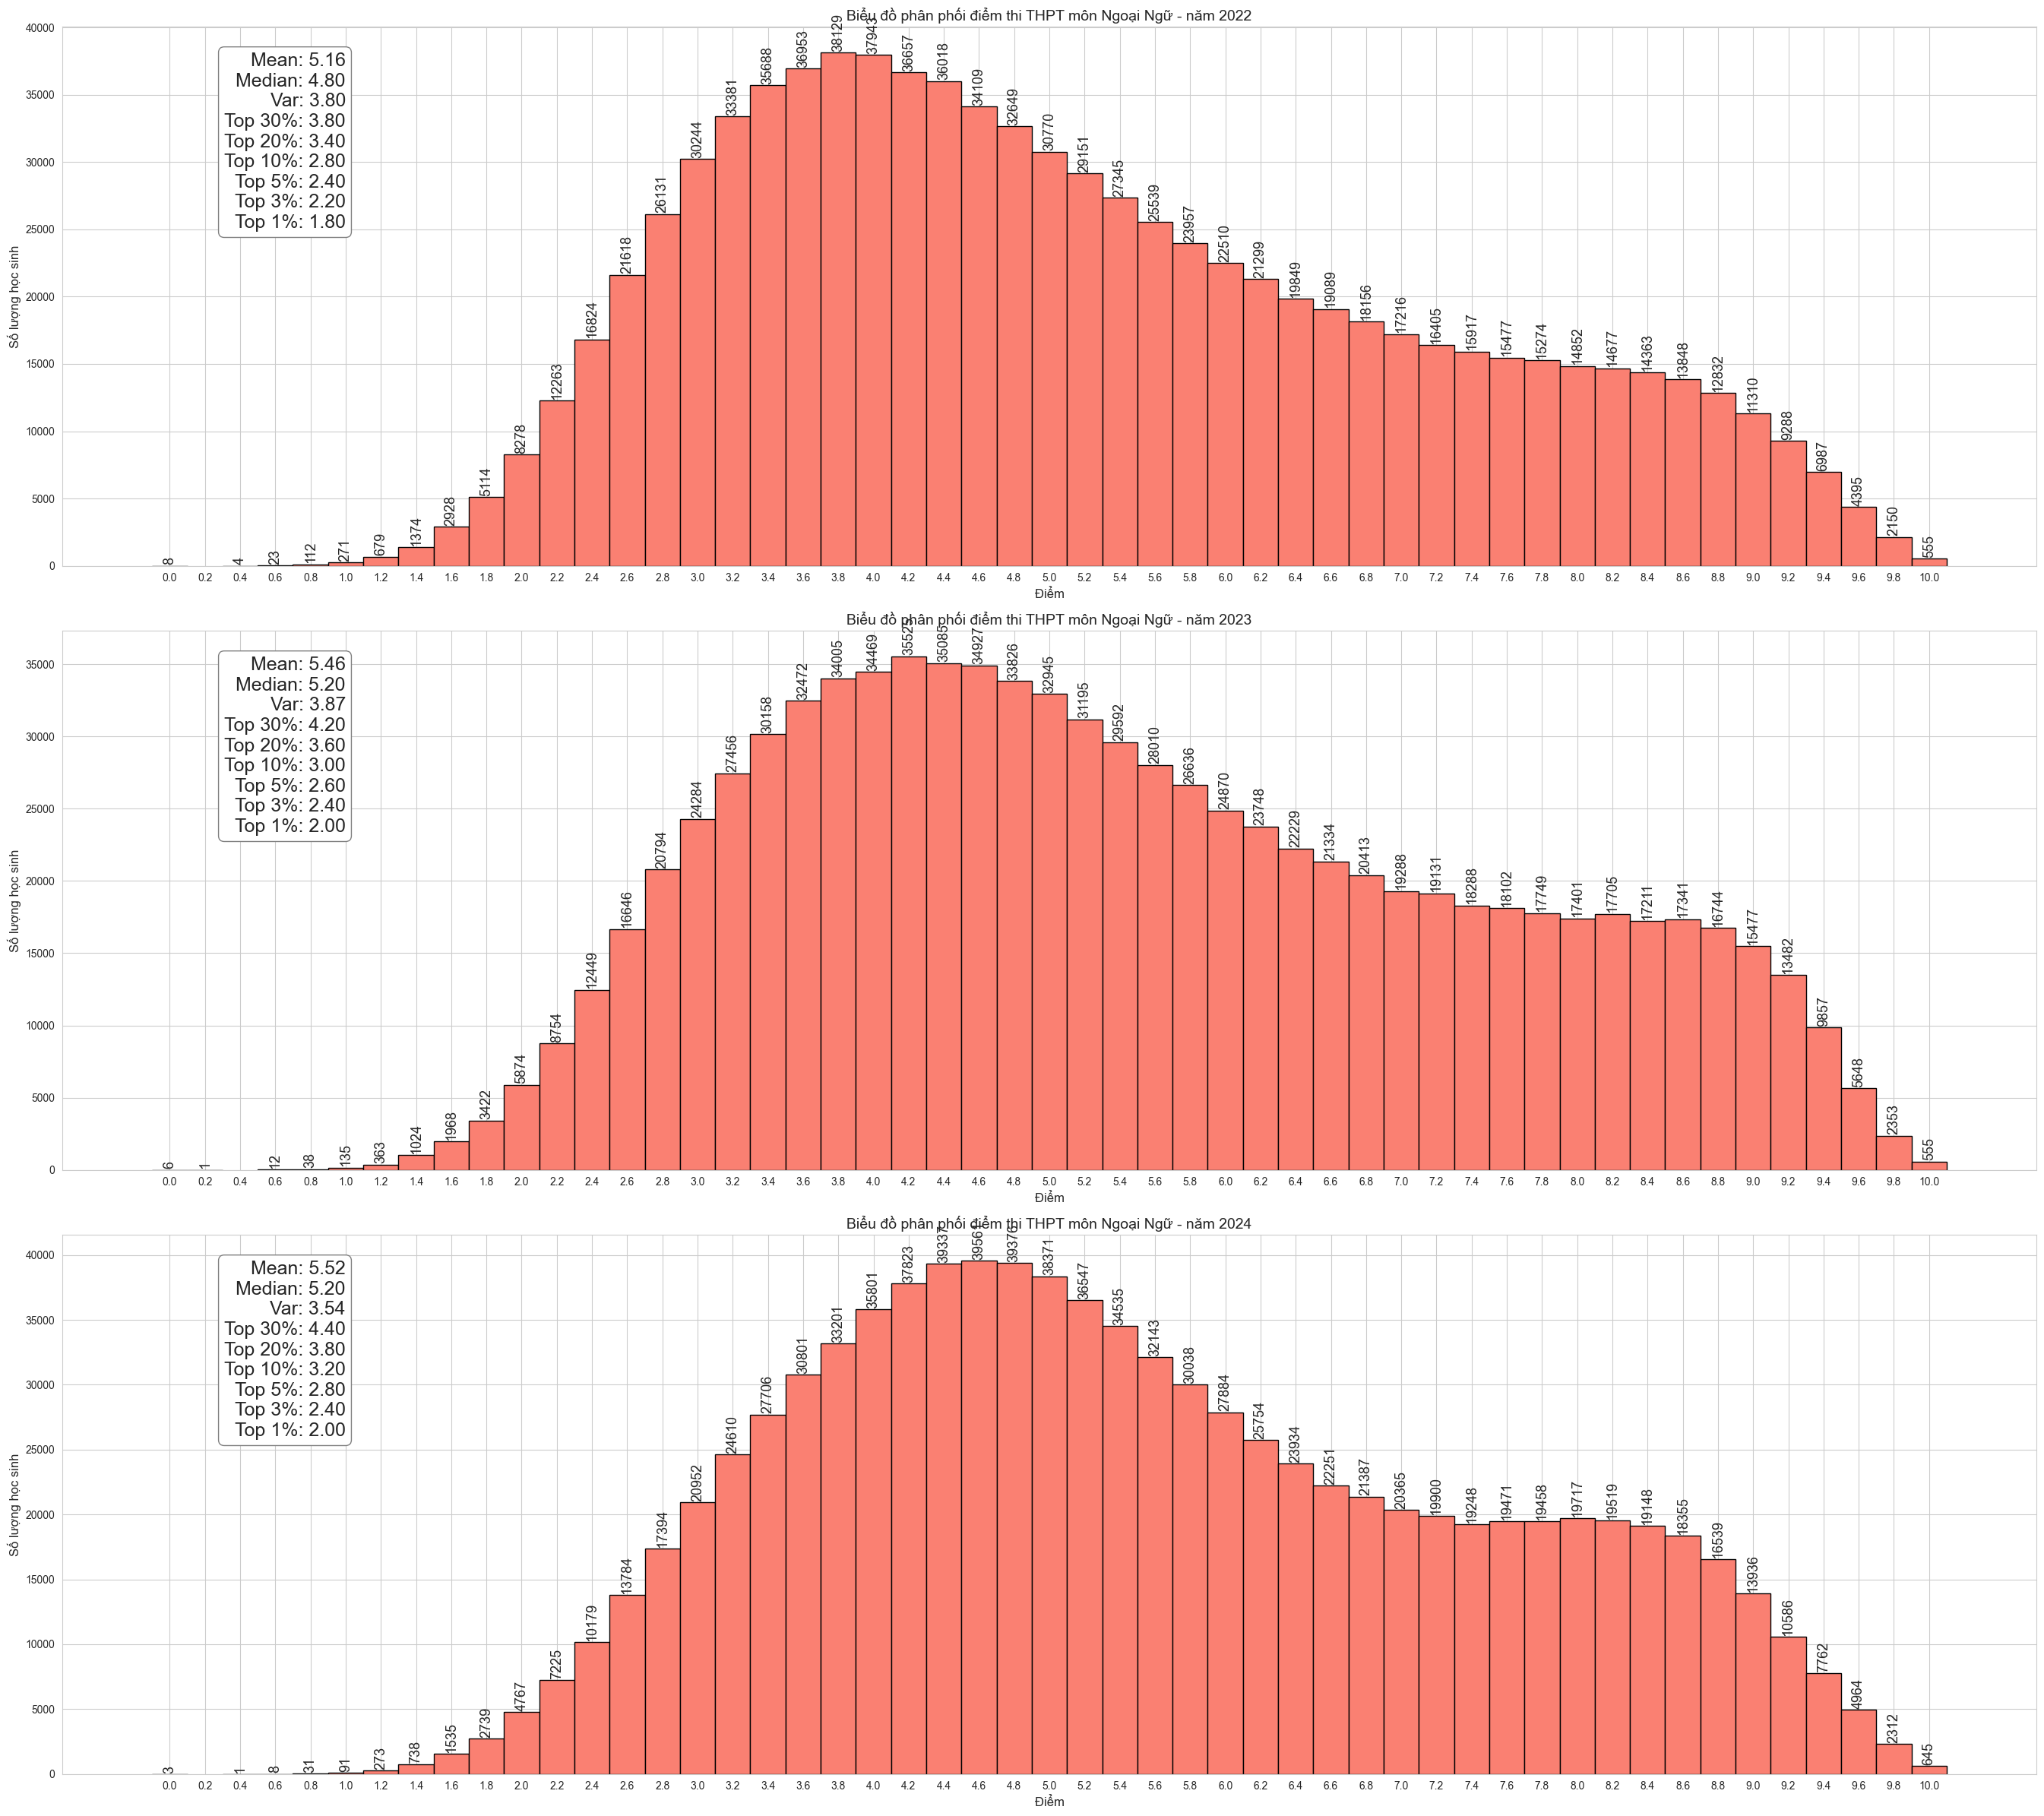

In [11]:
# Tạo danh sách các DataFrame và năm tương ứng
df = [df_2022, df_2023, df_2024]
years = [2022, 2023, 2024]

# Vẽ biểu đồ và tính toán các thống kê
plt.figure(figsize=(27,24))

for i, (df, year) in enumerate(zip(df, years)):
    # Lọc bỏ các giá trị NaN (nếu có) trong cột 'toan'
    scores = df['ngoai_ngu'].dropna()  # Đảm bảo không có giá trị NaN

    # Tính tần suất điểm
    a = scores.value_counts().sort_index()

    # Tính toán các thống kê
    mean = scores.mean()  # Điểm trung bình
    median = scores.median()  # Trung vị
    var = scores.var()  # Phương sai
    # Tính các mốc phân vị cho từng mức top
    percentiles = {
        f"Top {p}%": np.percentile(scores, p) for p in [30, 20, 10, 5, 3, 1]
    }

    # Tạo thông tin để hiển thị
    stats_text = (
        f"Mean: {mean:.2f}\n"
        f"Median: {median:.2f}\n"
        f"Var: {var:.2f}\n"
        + "\n".join([f"{key}: {value:.2f}" for key, value in percentiles.items()])
    )

    # Vẽ biểu đồ cột
    plt.subplot(3, 1, i + 1)
    plt.bar(x=a.index, height=a.values, edgecolor='black', color='salmon', width=0.2)

    # Đặt tiêu đề và nhãn
    plt.title(f'Biểu đồ phân phối điểm thi THPT môn Ngoại Ngữ - năm {year}', fontsize=14)
    plt.xlabel('Điểm', fontsize=12)
    plt.ylabel('Số lượng học sinh', fontsize=12)

    # Thêm giá trị vào các thanh cột
    for j in range(len(a)):
        plt.text(a.index[j], a.values[j] + 300, str(a.values[j]), ha='center',rotation=90, fontsize=13)

    # Hiển thị các thống kê trên biểu đồ
    plt.text(
        1, max(a.values) * 1, stats_text, fontsize=18,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
    )

    # Đặt các mốc trên trục x
    plt.xticks([i * 0.2 for i in range(51)])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Tổng số thí sinh thi môn ngoại ngữ năm 2024 là : 912705


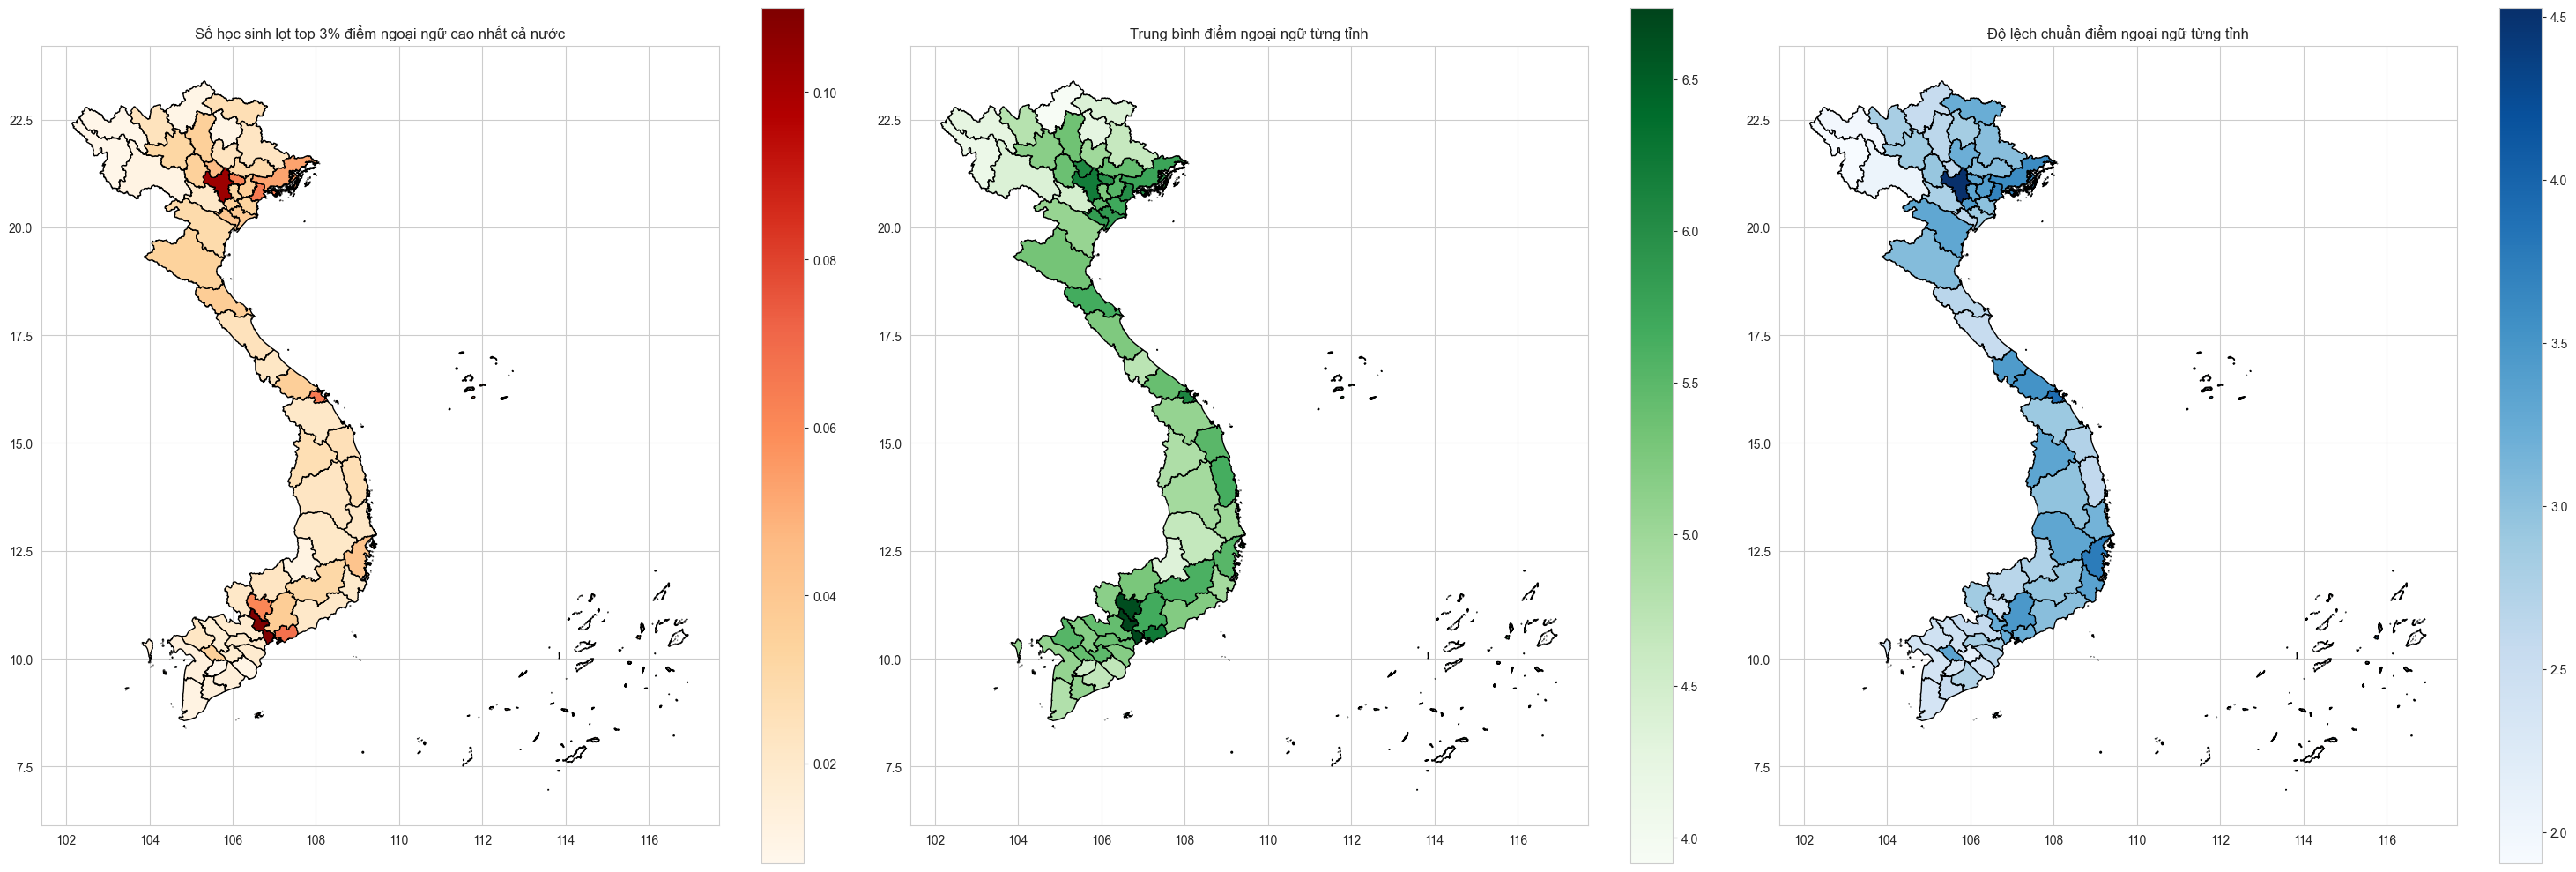

In [12]:
# ĐIỂM MÔN NGOẠI NGỮ Năm 2024 lọt top 3%
gdf = gpd.read_file('diaphantinh.geojson')
ngoai_ngu = df_2024[['ngoai_ngu','tinh_thi']].dropna()
print('Tổng số thí sinh thi môn ngoại ngữ năm 2024 là : '+ str(len(ngoai_ngu)))

tong = ngoai_ngu['tinh_thi'].value_counts()
top3= ngoai_ngu[ngoai_ngu['ngoai_ngu'] >= ngoai_ngu['ngoai_ngu'].quantile(0.97)]
Sr_top3 = top3['tinh_thi'].value_counts()
df_top3 = pd.DataFrame({
    'Tỉnh thi' : Sr_top3.index,
    'Tỉ lệ thí sinh lọt top 3%': (Sr_top3 / tong.loc[Sr_top3.index]).values
})

gdf_top3 = gdf.merge(df_top3, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH TRUNG BÌNH TỪNG TỈNH
mean_ngoai_ngu = ngoai_ngu.groupby('tinh_thi')['ngoai_ngu'].mean().reset_index()
mean_ngoai_ngu.columns = ['Tỉnh thi', 'Trung bình điểm ngoại ngữ']
gdf_mean = gdf.merge(mean_ngoai_ngu, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH ĐỘ LỆCH CHUẨN TỪNG TỈNH (VAR)
var_ngoai_ngu = ngoai_ngu.groupby('tinh_thi')['ngoai_ngu'].var().reset_index()
var_ngoai_ngu.columns = ['Tỉnh thi', 'Độ lệch chuẩn điểm ngoại ngữ']
gdf_var = gdf.merge(var_ngoai_ngu, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# Thiết lập kích thước và bố cục
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Biểu đồ 1: Top 3% điểm Ngoại ngữ
gdf_top3.plot(
    column='Tỉ lệ thí sinh lọt top 3%',
    ax=axes[0],
    cmap='OrRd',
    edgecolor='black',
    legend=True
)
axes[0].set_title('Số học sinh lọt top 3% điểm ngoại ngữ cao nhất cả nước')

# Biểu đồ 2: Trung bình điểm Ngoại ngữ
gdf_mean.plot(
    column='Trung bình điểm ngoại ngữ',
    ax=axes[1],
    cmap='Greens',
    edgecolor='black',
    legend=True
)
axes[1].set_title('Trung bình điểm ngoại ngữ từng tỉnh')

# Biểu đồ 3: Độ lệch chuẩn điểm Ngoại ngữ
gdf_var.plot(
    column='Độ lệch chuẩn điểm ngoại ngữ',
    ax=axes[2],
    cmap='Blues',
    edgecolor='black',
    legend=True
)
axes[2].set_title('Độ lệch chuẩn điểm ngoại ngữ từng tỉnh')

# Tùy chỉnh và hiển thị
plt.tight_layout()
plt.show()


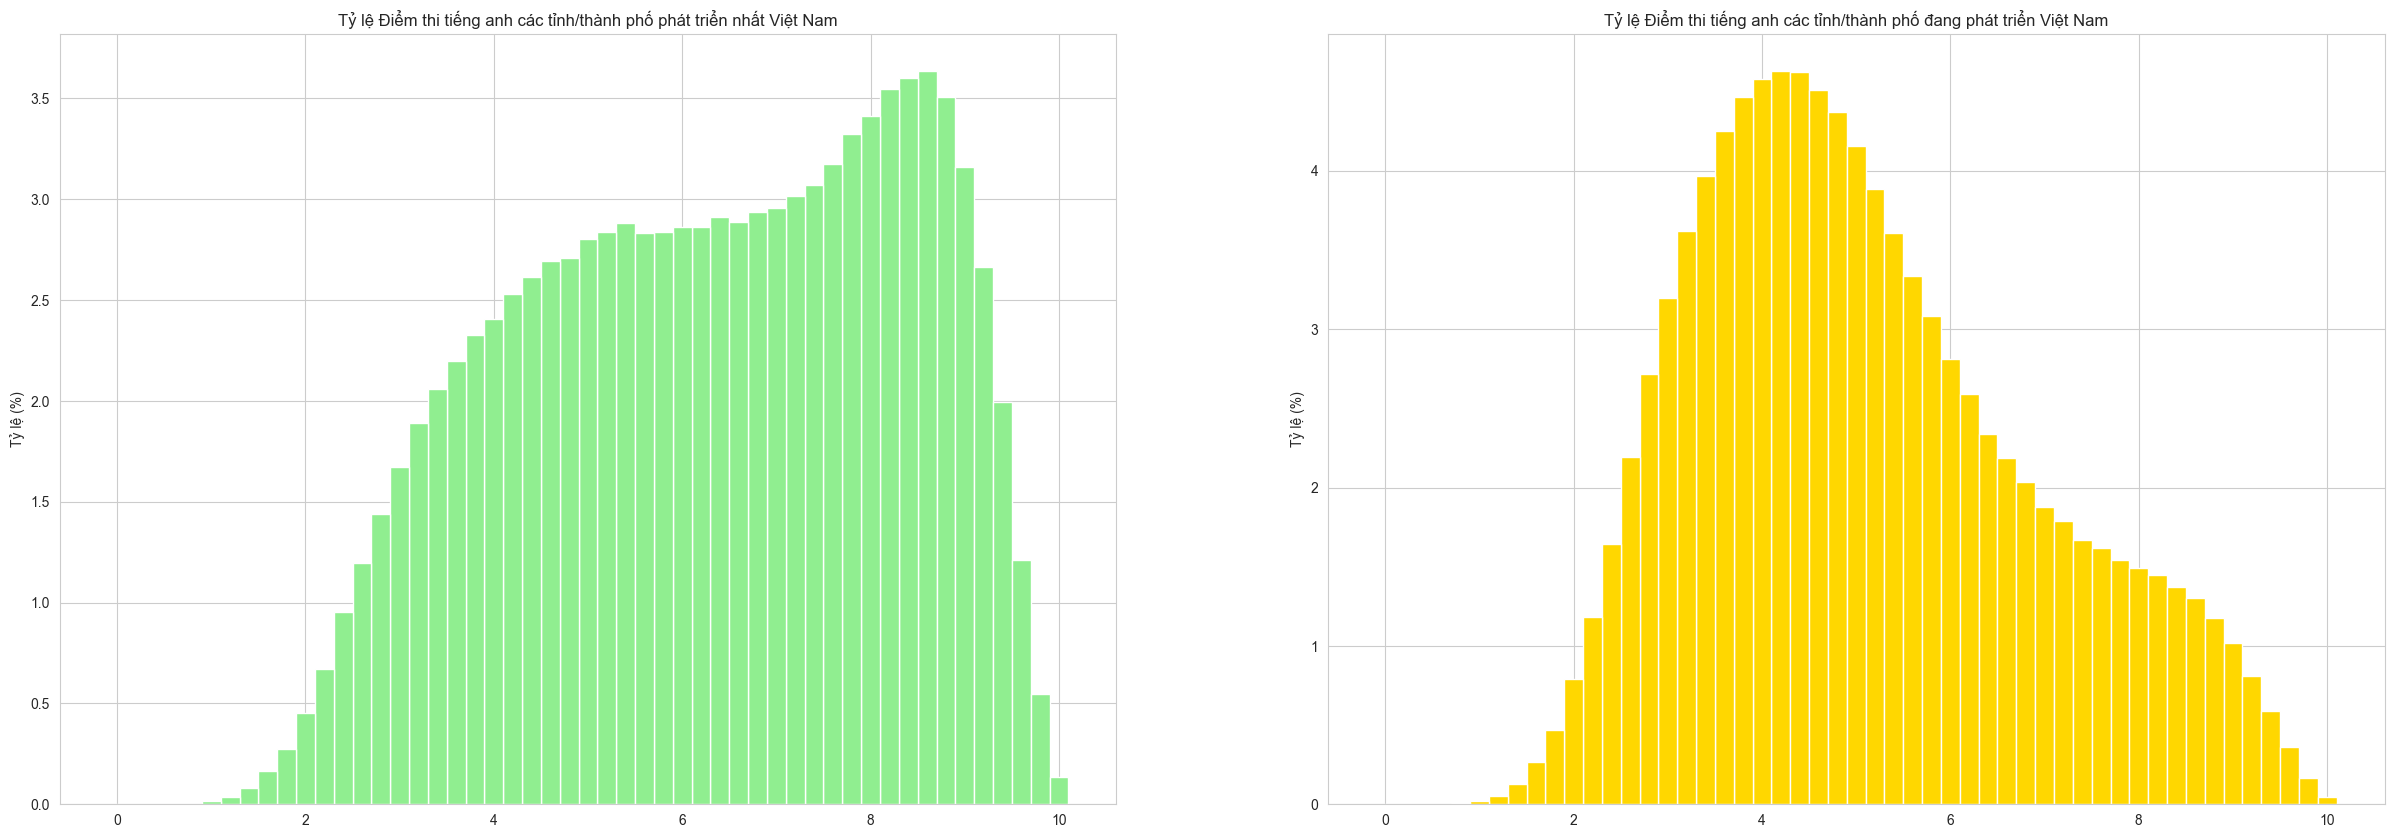

In [13]:
thanh_pho = ['Hà Nội', 'TP. Hồ Chí Minh', 'Bình Dương', 'Bà Rịa - Vũng Tàu', 'Đà Nẵng', 'Hải Phòng']
df_thanh_pho = df_all[df_all['tinh_thi'].isin(thanh_pho)]
df_diem_tp = pd.DataFrame({
    'Điểm thi': df_thanh_pho['ngoai_ngu'].value_counts().index,
    'Số lượng': df_thanh_pho['ngoai_ngu'].value_counts().values,
})

total_tp = df_diem_tp['Số lượng'].sum()

df_diem_tp['Tỷ lệ (%)'] = (df_diem_tp['Số lượng'] / total_tp) * 100

df_nong_thon = df_all[~df_all['tinh_thi'].isin(thanh_pho)]
df_diem_nt = pd.DataFrame({
    'Điểm thi': df_nong_thon['ngoai_ngu'].value_counts().index,
    'Số lượng': df_nong_thon['ngoai_ngu'].value_counts().values,
})

total_nt = df_diem_nt['Số lượng'].sum()

df_diem_nt['Tỷ lệ (%)'] = (df_diem_nt['Số lượng'] / total_nt) * 100

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].bar(df_diem_tp['Điểm thi'], df_diem_tp['Tỷ lệ (%)'], width=0.2, color='lightgreen')
ax[0].set_title('Tỷ lệ Điểm thi tiếng anh các tỉnh/thành phố phát triển nhất Việt Nam')
ax[0].set_ylabel('Tỷ lệ (%)')

ax[1].bar(df_diem_nt['Điểm thi'], df_diem_nt['Tỷ lệ (%)'], width=0.2, color='#FFD700')
ax[1].set_title('Tỷ lệ Điểm thi tiếng anh các tỉnh/thành phố đang phát triển Việt Nam')
ax[1].set_ylabel('Tỷ lệ (%)')

# Display the plots
plt.show()


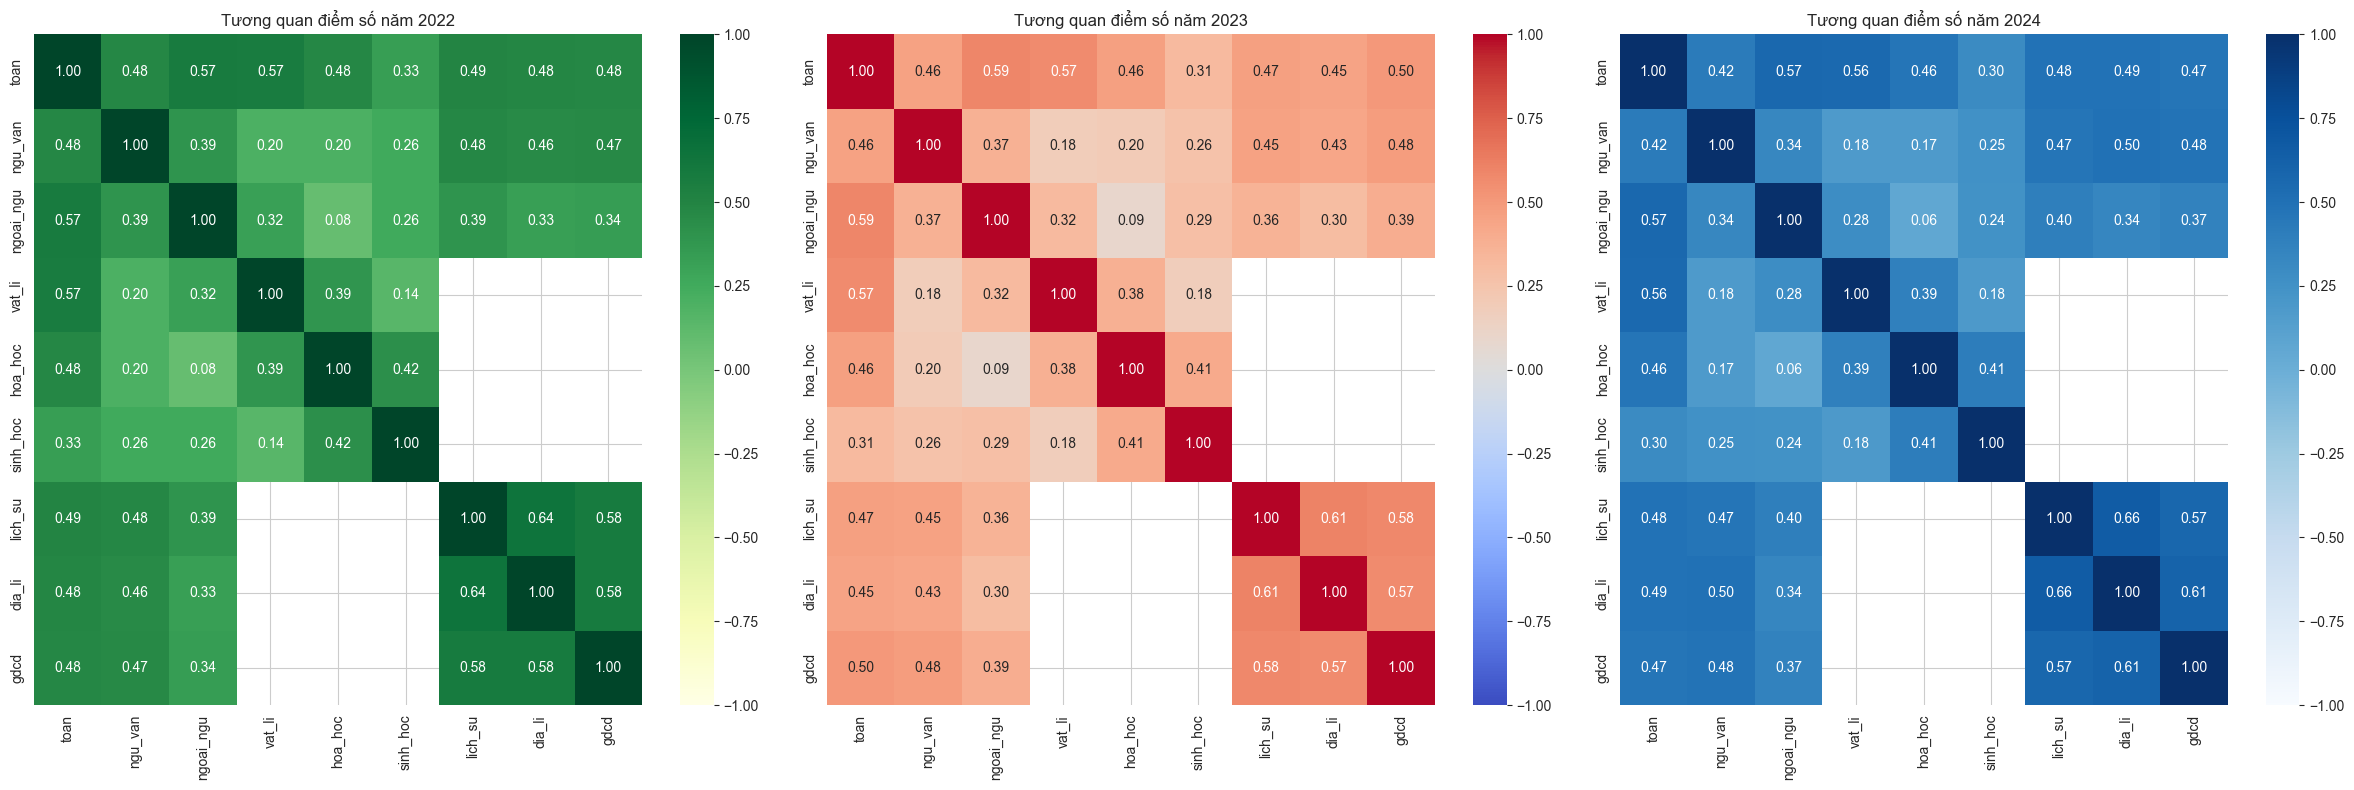

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 hàng, 3 cột, kích thước tổng

# Heatmap 1: Năm 2022
a_2022 = df_2022[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
s_matrix_2022 = a_2022.corr()
sns.heatmap(s_matrix_2022, annot=True, cmap='YlGn', fmt='.2f', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Tương quan điểm số năm 2022')

# Heatmap 2: Năm 2023
a_2023 = df_2023[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
s_matrix_2023 = a_2023.corr()
sns.heatmap(s_matrix_2023, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Tương quan điểm số năm 2023')

# Heatmap 3: Năm 2024
a_2024 = df_2024[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
s_matrix_2024 = a_2024.corr()
sns.heatmap(s_matrix_2024, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title('Tương quan điểm số năm 2024')

plt.tight_layout()  # Tự động căn chỉnh khoảng cách
plt.show()


# Phân tích điểm các khối thi

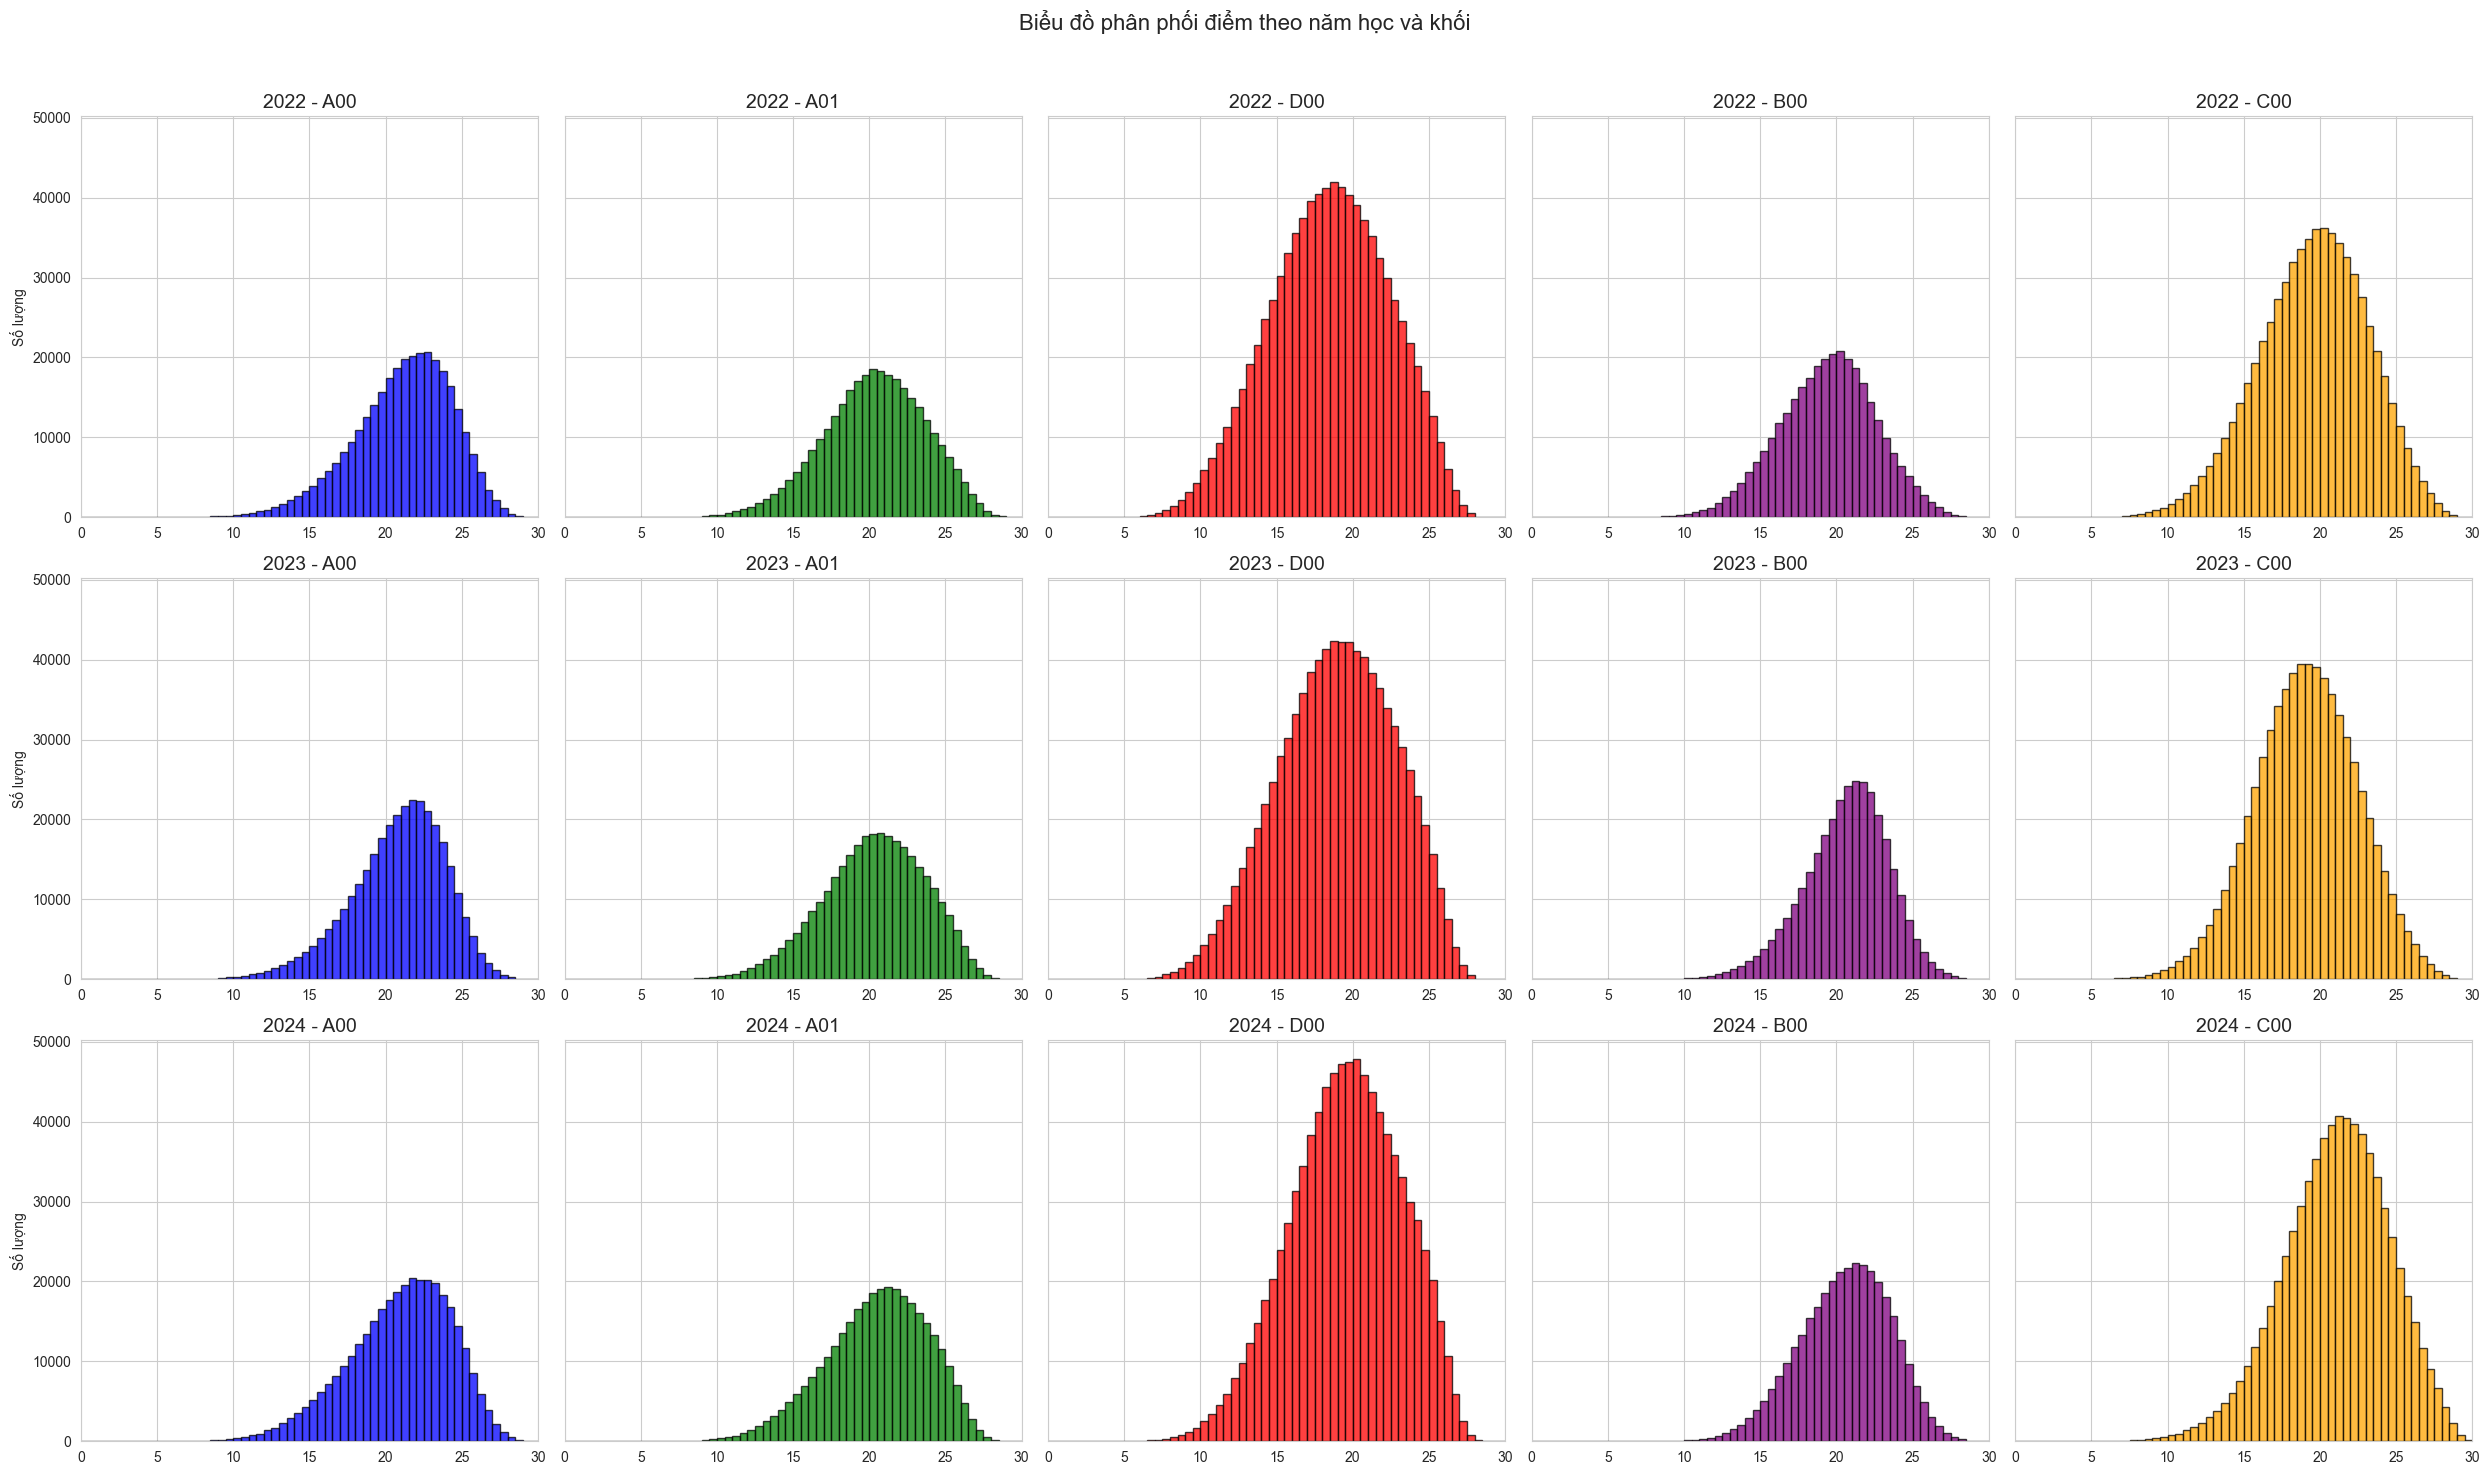

In [15]:
# Tạo một dictionary chứa màu sắc cho các khối
mau_khoi = {
    'a00': 'blue',
    'a01': 'green',
    'd00': 'red',
    'b00': 'purple',
    'c00': 'orange'
}

# Tạo các subplot với 3 hàng và 5 cột
fig, axes = plt.subplots(len(nam_hoc), 5, figsize=(25, 15), sharey=True)
fig.suptitle('Biểu đồ phân phối điểm theo năm học và khối', fontsize=16)

# Vẽ biểu đồ cho từng khối và năm học
for i, nam in enumerate(nam_hoc):
    for j, khoi in enumerate(['a00', 'a01', 'd00', 'b00', 'c00']):
        # Lọc dữ liệu theo năm và khối
        du_lieu_theo_nam = df_all[df_all['nam_thi'] == nam]
        diem_khoi = du_lieu_theo_nam[khoi]
        mau = mau_khoi[khoi]

        # Chọn axes để vẽ biểu đồ
        ax = axes[i, j]

        # Vẽ histogram
        ax.hist(
            diem_khoi,
            bins=60,
            range=(0, 30),
            alpha=0.75,
            color=mau,
            edgecolor='black'
        )

        # Cài đặt tiêu đề cho mỗi biểu đồ
        ax.set_title(f"{nam} - {khoi.upper()}", fontsize=14)
        ax.set_xlim(0, 30)
        ax.set_xticks(range(0, 31, 5))  # Tạo nhãn cho các giá trị từ 0 đến 30, cách 5 điểm

        # Thiết lập nhãn trục Y cho cột đầu tiên
        if j == 0:
            ax.set_ylabel('Số lượng')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Đảm bảo tiêu đề không bị cắt
plt.show()


# Khối A00 Toán Lý Hóa

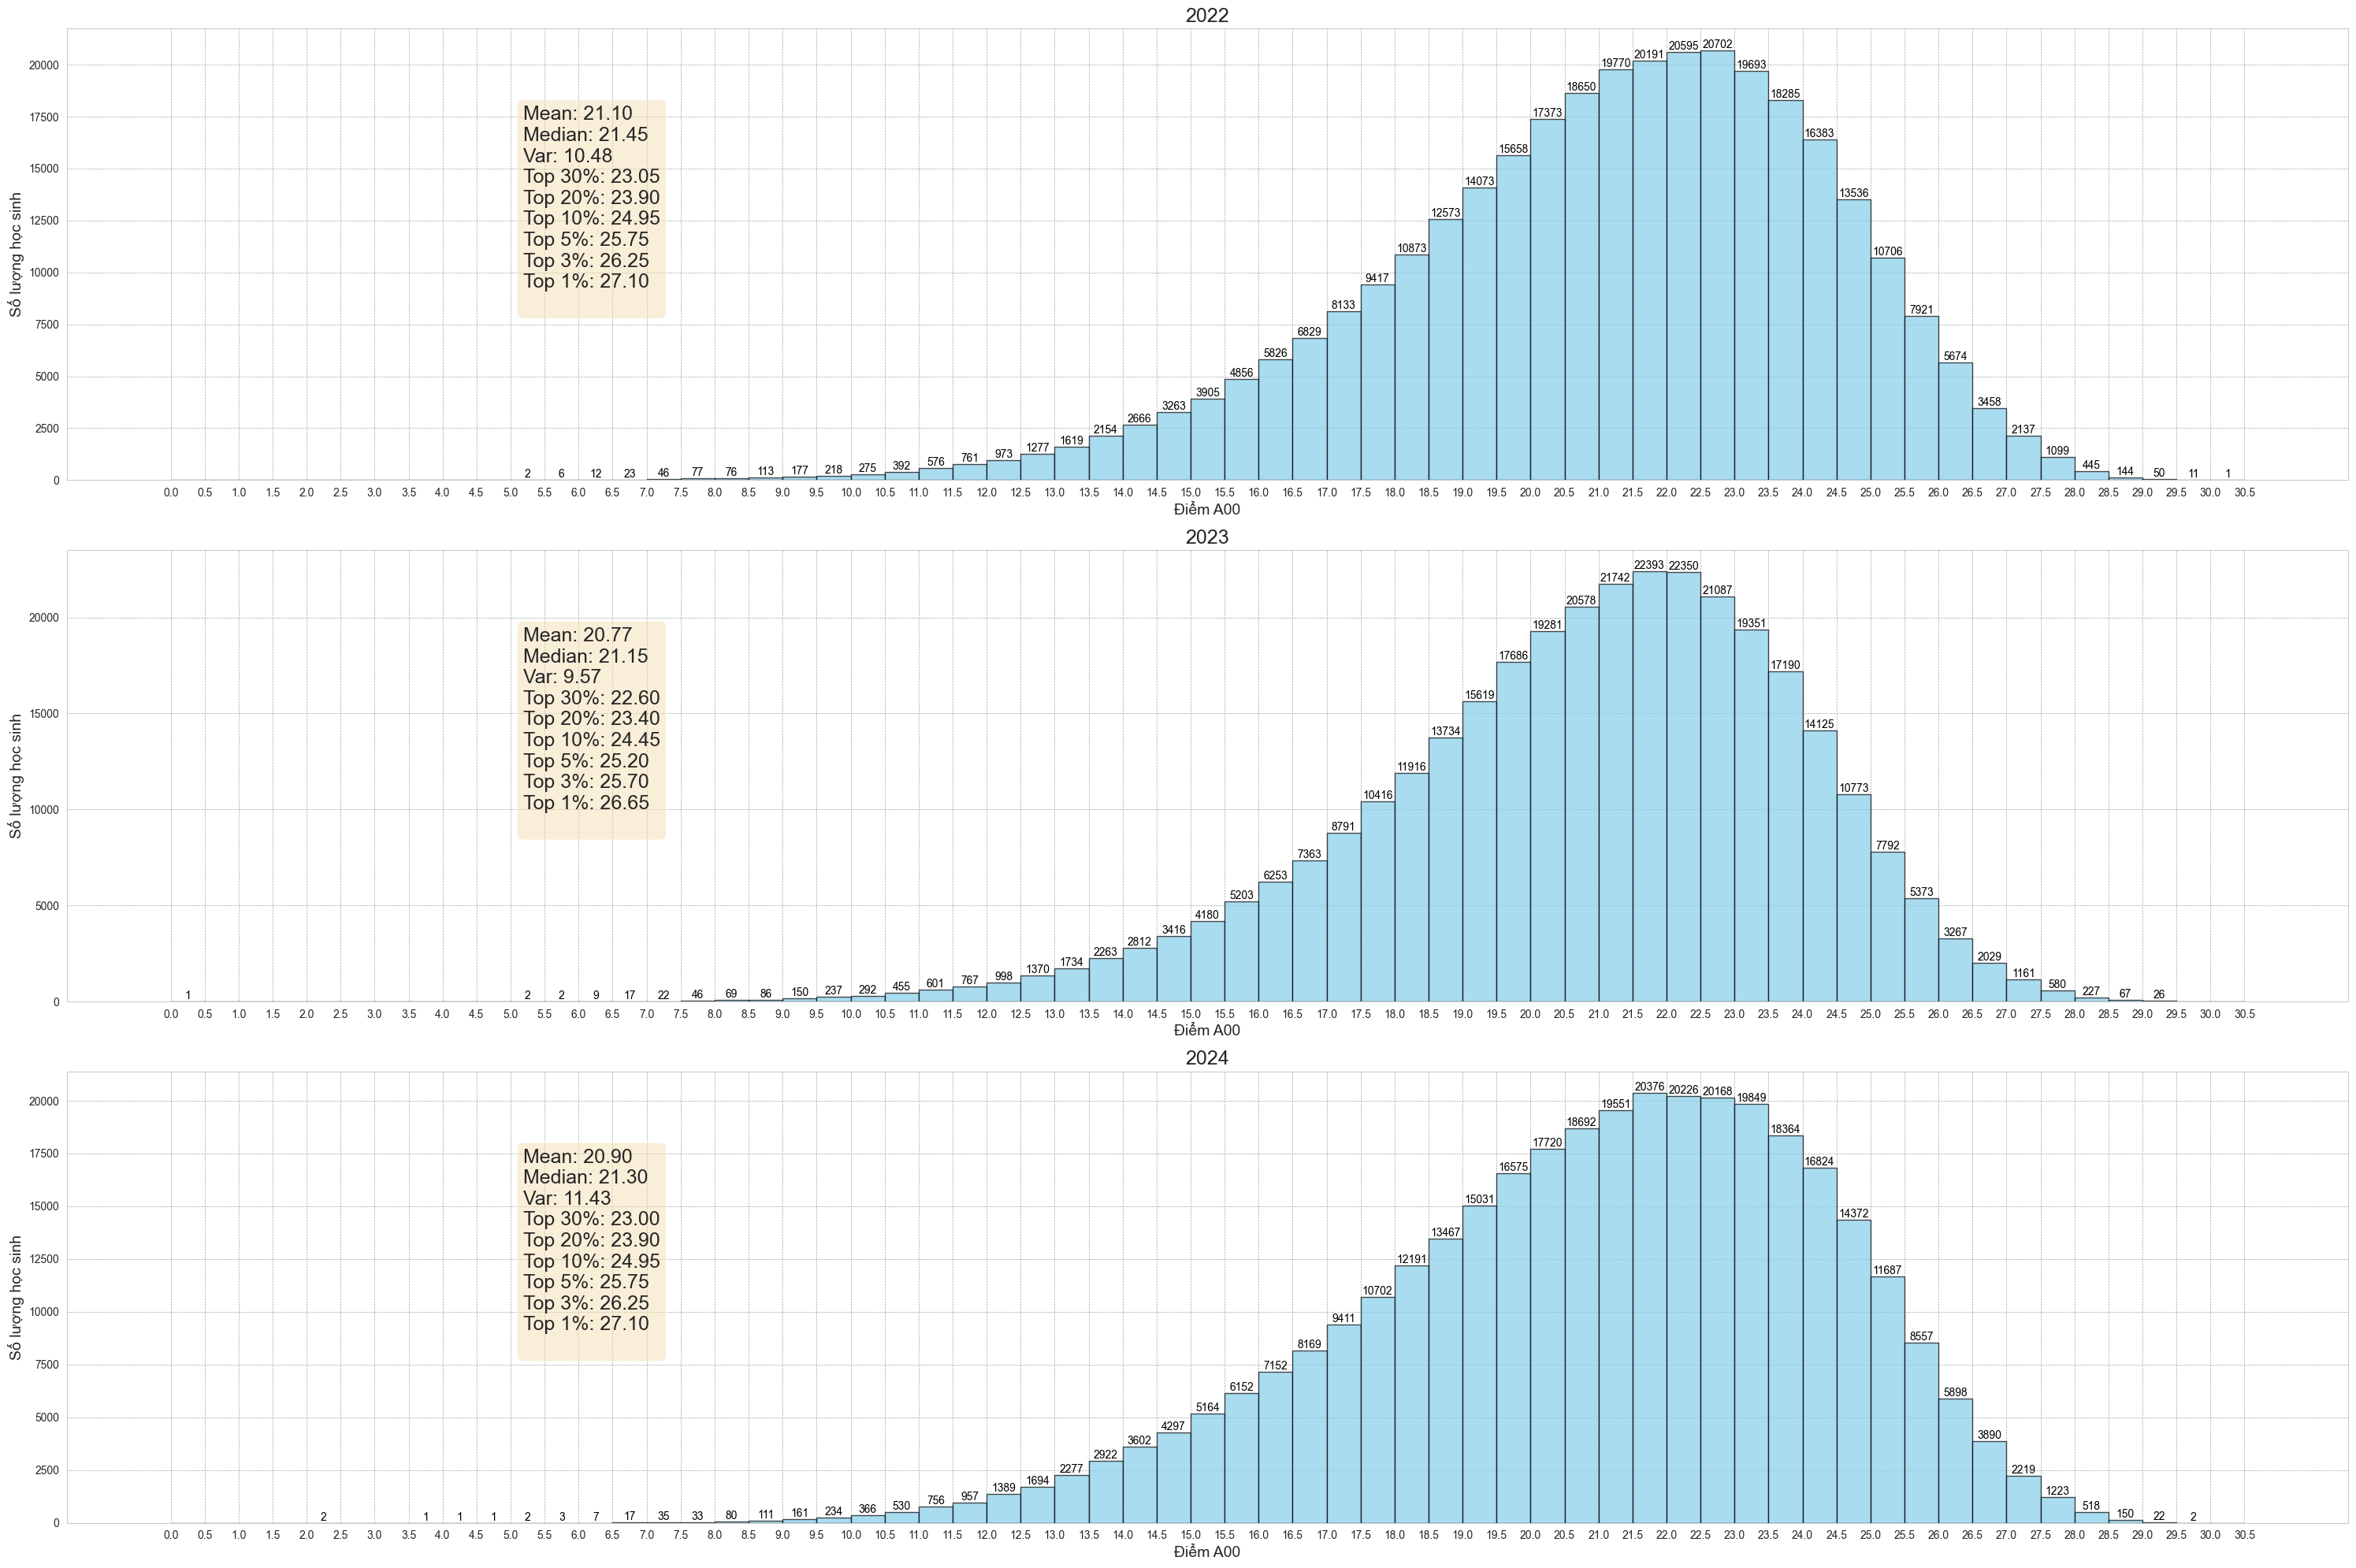

In [16]:
stats_2022 = df_2022['a00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['a00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['a00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['a00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['a00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm A00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}',
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"Var: {(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=18,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()


Tổng số thí sinh thi A00 là: 343800


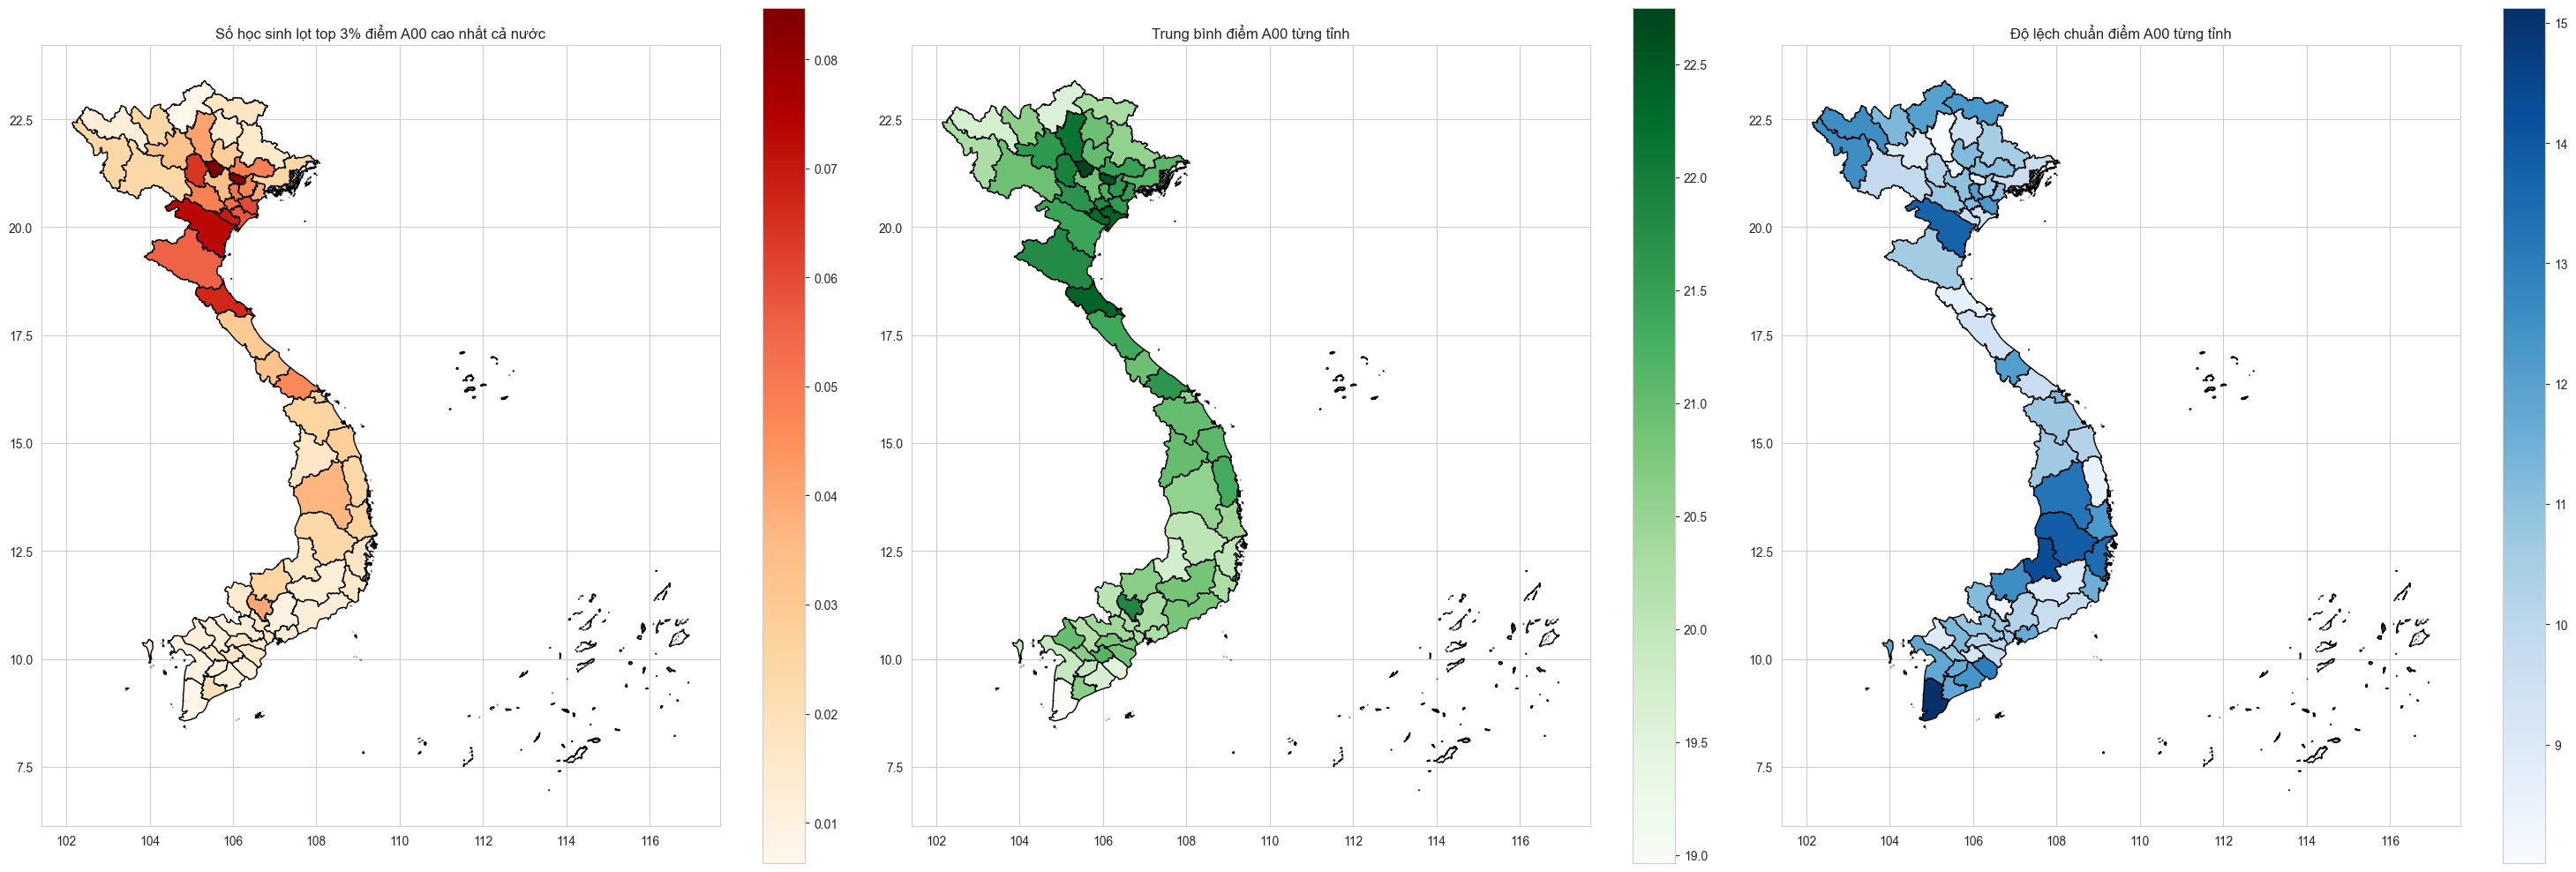

In [17]:
# LỌC DỮ LIỆU A00
a00 = df_2024[['a00', 'tinh_thi']].dropna()
print('Tổng số thí sinh thi A00 là: ' + str(len(a00)))

# TÍNH TOP 3% ĐIỂM A00
tong = a00['tinh_thi'].value_counts()
top3 = a00[a00['a00'] >= a00['a00'].quantile(0.97)]
Sr_top3 = top3['tinh_thi'].value_counts()
df_top3 = pd.DataFrame({
    'Tỉnh thi': Sr_top3.index,
    'Tỉ lệ thí sinh lọt top 3%': (Sr_top3 / tong.loc[Sr_top3.index]).values
})
gdf_top3 = gdf.merge(df_top3, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH TRUNG BÌNH ĐIỂM A00 TỪNG TỈNH
mean_a00 = a00.groupby('tinh_thi')['a00'].mean().reset_index()
mean_a00.columns = ['Tỉnh thi', 'Trung bình điểm A00']
gdf_mean = gdf.merge(mean_a00, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH ĐỘ LỆCH CHUẨN ĐIỂM A00 TỪNG TỈNH
var_a00 = a00.groupby('tinh_thi')['a00'].var().reset_index()
var_a00.columns = ['Tỉnh thi', 'Độ lệch chuẩn điểm A00']
gdf_var = gdf.merge(var_a00, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# THIẾT LẬP KÍCH THƯỚC VÀ BỐ CỤC BIỂU ĐỒ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# BIỂU ĐỒ 1: TOP 3% ĐIỂM A00
gdf_top3.plot(
    column='Tỉ lệ thí sinh lọt top 3%',
    ax=axes[0],
    cmap='OrRd',
    edgecolor='black',
    legend=True
)
axes[0].set_title('Số học sinh lọt top 3% điểm A00 cao nhất cả nước')

# BIỂU ĐỒ 2: TRUNG BÌNH ĐIỂM A00
gdf_mean.plot(
    column='Trung bình điểm A00',
    ax=axes[1],
    cmap='Greens',
    edgecolor='black',
    legend=True
)
axes[1].set_title('Trung bình điểm A00 từng tỉnh')

# BIỂU ĐỒ 3: ĐỘ LỆCH CHUẨN ĐIỂM A00
gdf_var.plot(
    column='Độ lệch chuẩn điểm A00',
    ax=axes[2],
    cmap='Blues',
    edgecolor='black',
    legend=True
)
axes[2].set_title('Độ lệch chuẩn điểm A00 từng tỉnh')

# TÙY CHỈNH VÀ HIỂN THỊ
plt.tight_layout()
plt.show()


# Khối A01 Toán Lý Anh

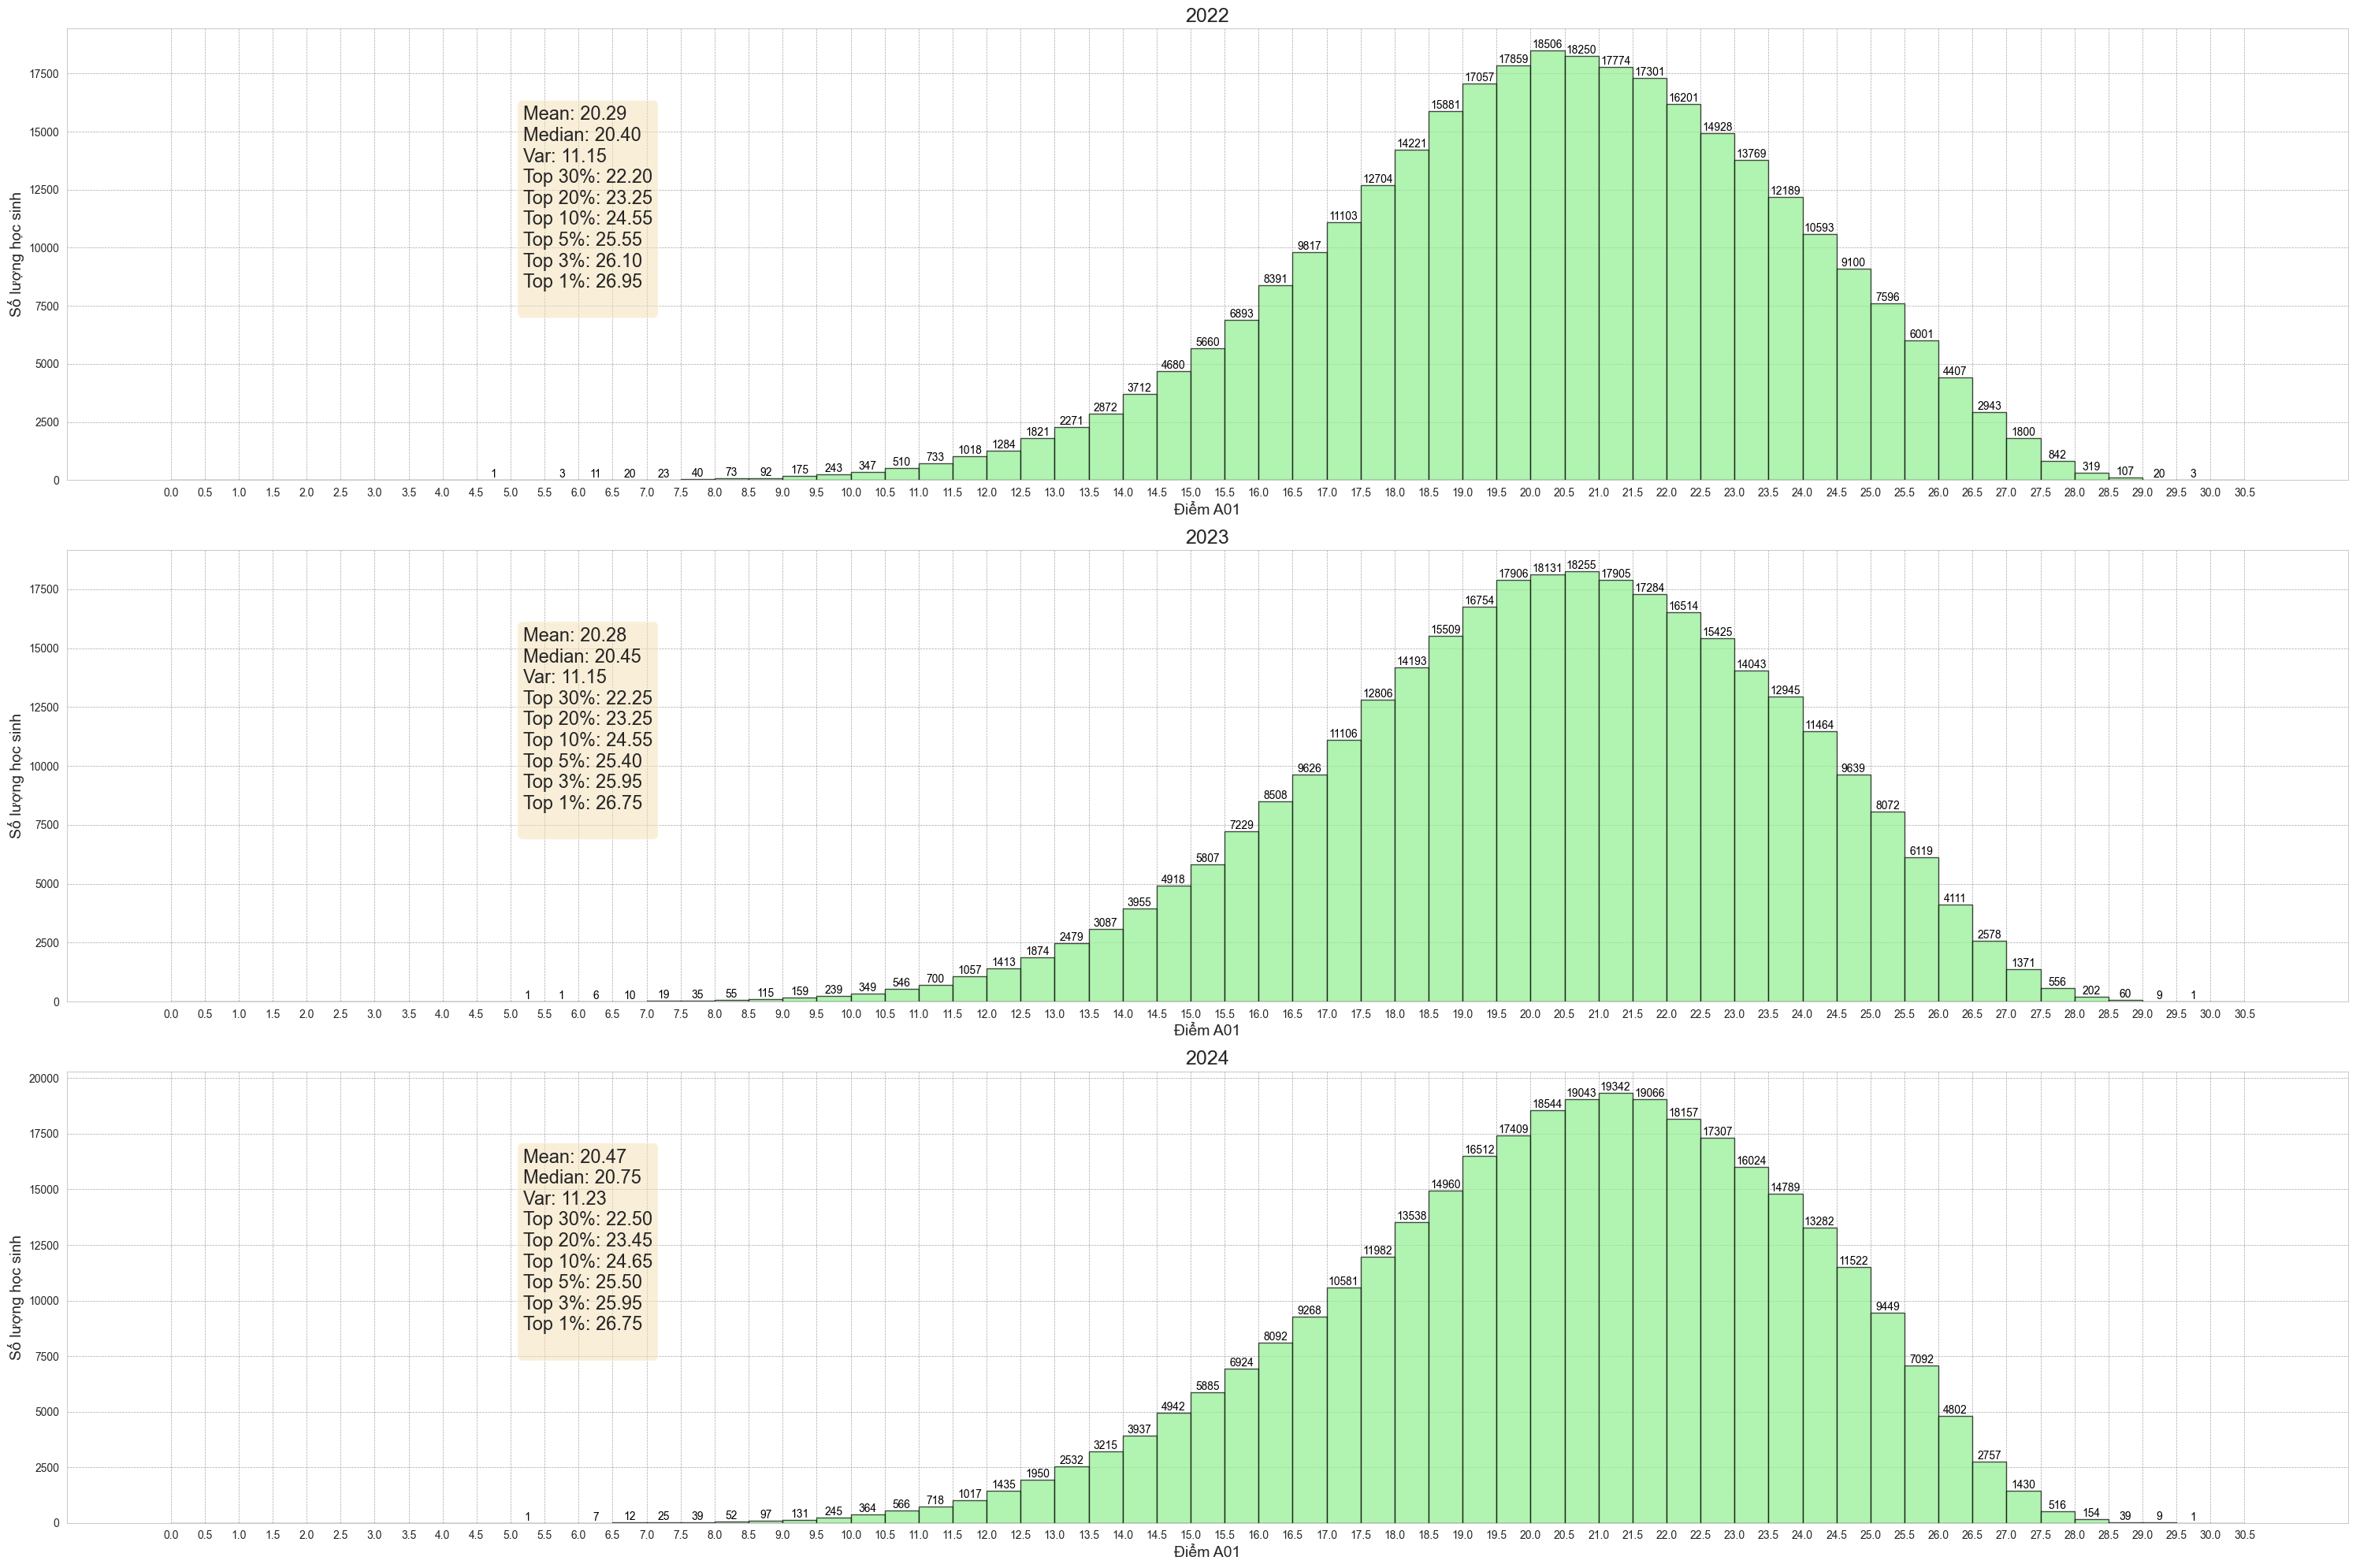

In [18]:
stats_2022 = df_2022['a01'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['a01'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['a01'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['a01'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['a01'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='lightgreen')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm A01', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}',
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"Var: {(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()


Tổng số thí sinh thi A01 là: 329761


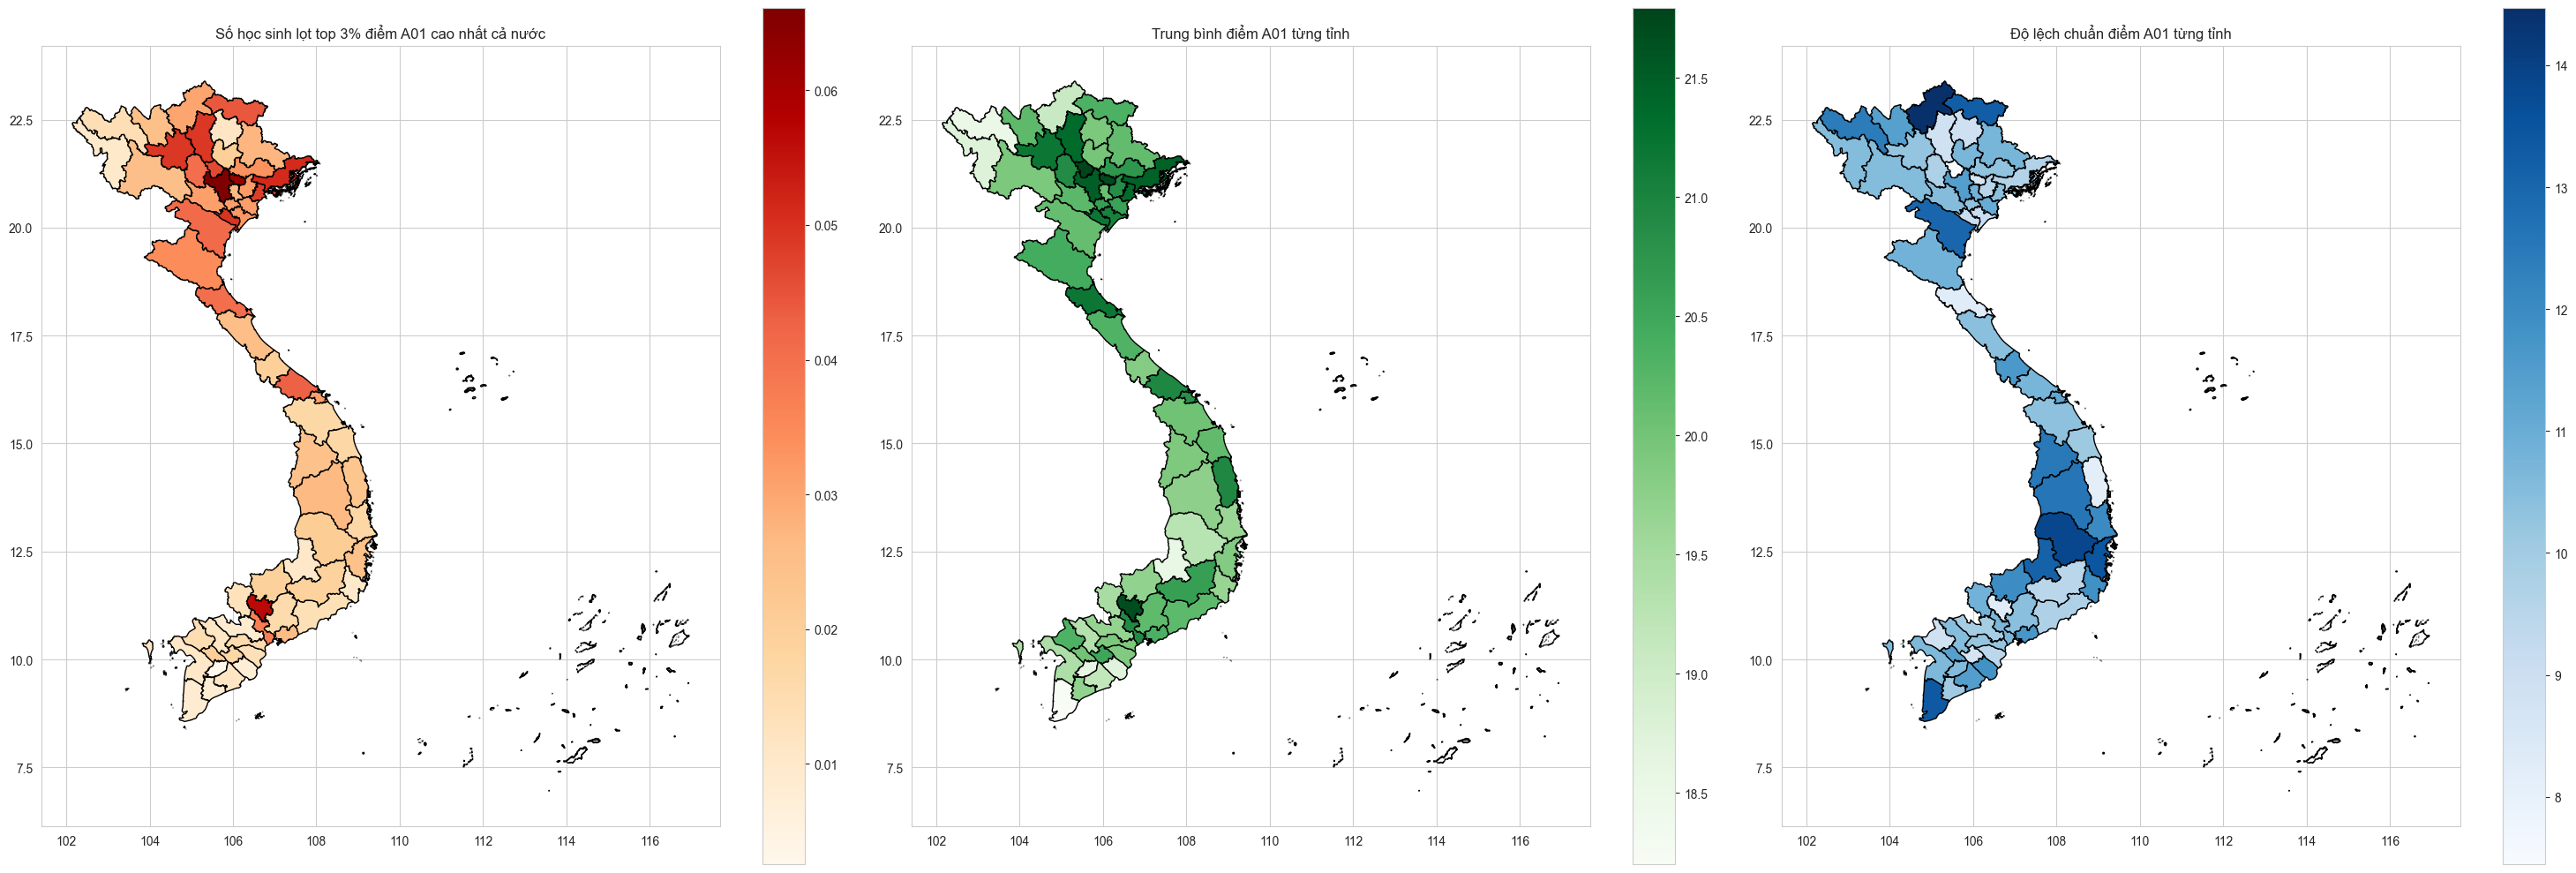

In [19]:
# LỌC DỮ LIỆU A01
a01 = df_2024[['a01', 'tinh_thi']].dropna()
print('Tổng số thí sinh thi A01 là: ' + str(len(a01)))

# TÍNH TOP 3% ĐIỂM A01
tong = a01['tinh_thi'].value_counts()
top3 = a01[a01['a01'] >= a01['a01'].quantile(0.97)]
Sr_top3 = top3['tinh_thi'].value_counts()
df_top3 = pd.DataFrame({
    'Tỉnh thi': Sr_top3.index,
    'Tỉ lệ thí sinh lọt top 3%': (Sr_top3 / tong.loc[Sr_top3.index]).values
})
gdf_top3 = gdf.merge(df_top3, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH TRUNG BÌNH ĐIỂM A01 TỪNG TỈNH
mean_a01 = a01.groupby('tinh_thi')['a01'].mean().reset_index()
mean_a01.columns = ['Tỉnh thi', 'Trung bình điểm A01']
gdf_mean = gdf.merge(mean_a01, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH ĐỘ LỆCH CHUẨN ĐIỂM A01 TỪNG TỈNH
var_a01 = a01.groupby('tinh_thi')['a01'].var().reset_index()
var_a01.columns = ['Tỉnh thi', 'Độ lệch chuẩn điểm A01']
gdf_var = gdf.merge(var_a01, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# THIẾT LẬP KÍCH THƯỚC VÀ BỐ CỤC BIỂU ĐỒ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# BIỂU ĐỒ 1: TOP 3% ĐIỂM A01
gdf_top3.plot(
    column='Tỉ lệ thí sinh lọt top 3%',
    ax=axes[0],
    cmap='OrRd',
    edgecolor='black',
    legend=True
)
axes[0].set_title('Số học sinh lọt top 3% điểm A01 cao nhất cả nước')

# BIỂU ĐỒ 2: TRUNG BÌNH ĐIỂM A01
gdf_mean.plot(
    column='Trung bình điểm A01',
    ax=axes[1],
    cmap='Greens',
    edgecolor='black',
    legend=True
)
axes[1].set_title('Trung bình điểm A01 từng tỉnh')

# BIỂU ĐỒ 3: ĐỘ LỆCH CHUẨN ĐIỂM A01
gdf_var.plot(
    column='Độ lệch chuẩn điểm A01',
    ax=axes[2],
    cmap='Blues',
    edgecolor='black',
    legend=True
)
axes[2].set_title('Độ lệch chuẩn điểm A01 từng tỉnh')

# TÙY CHỈNH VÀ HIỂN THỊ
plt.tight_layout()
plt.show()


# Khối D00 Toán Văn Anh

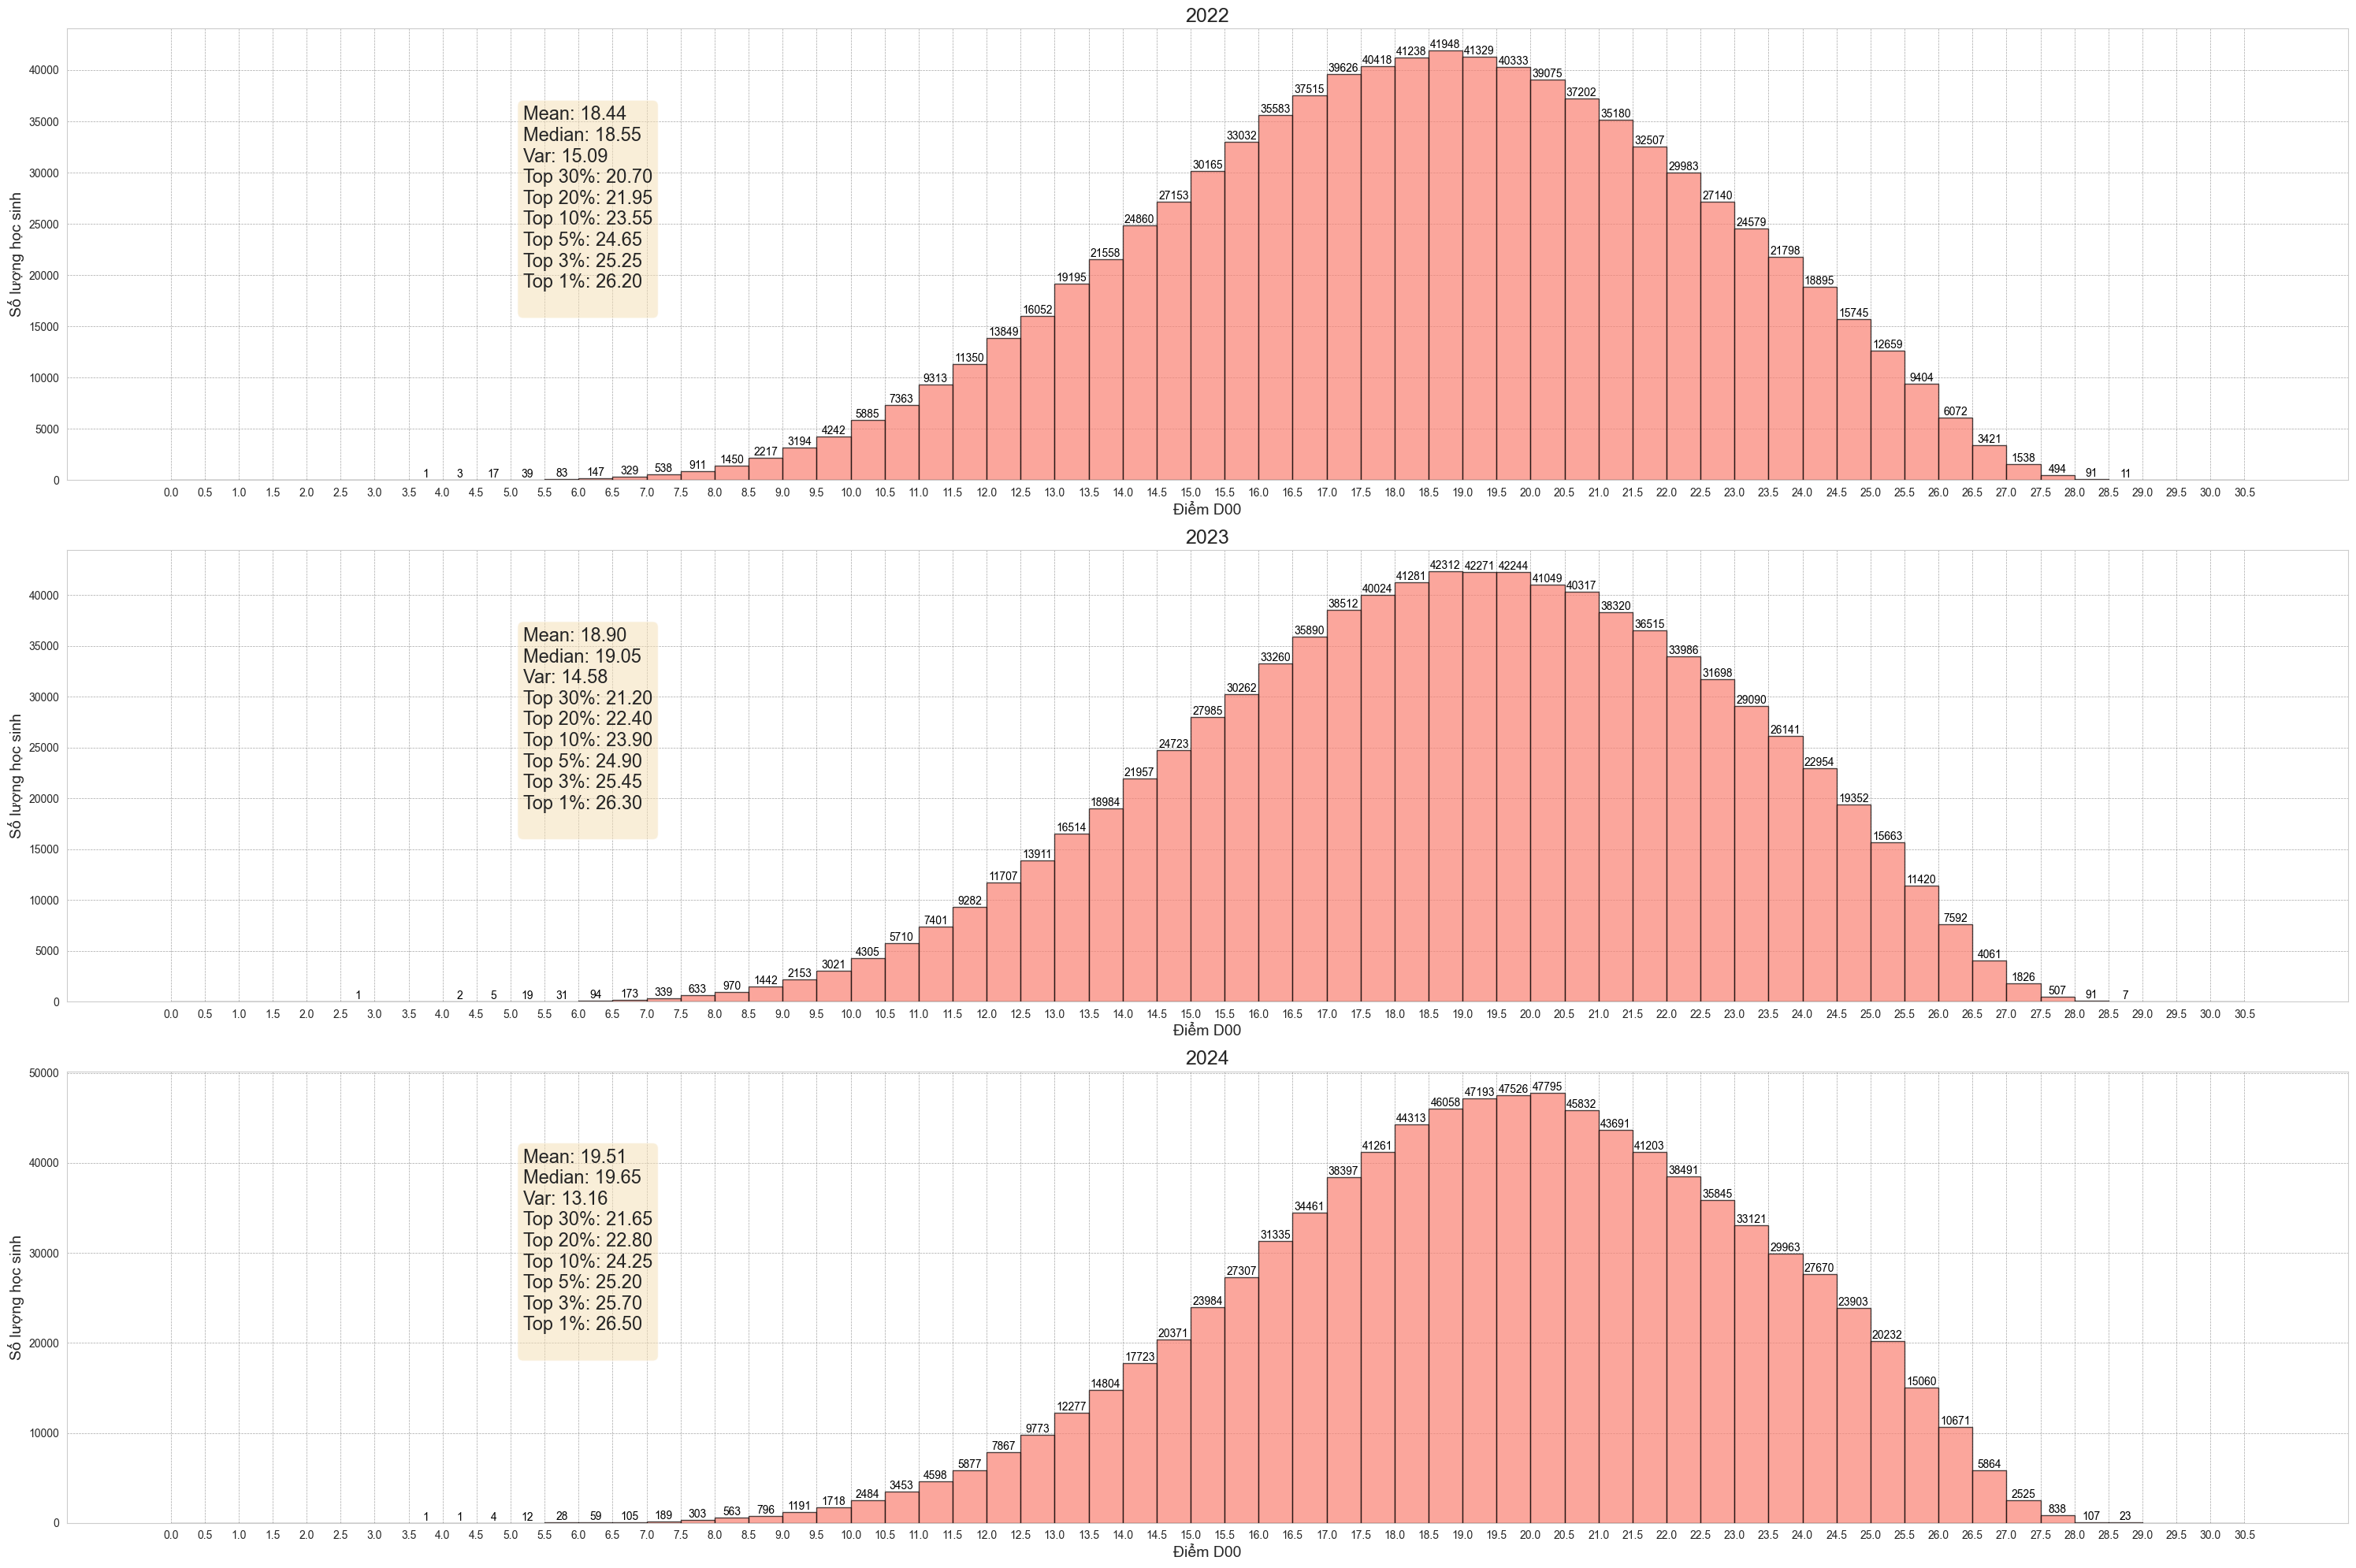

In [20]:
stats_2022 = df_2022['d00'].agg(['mean', 'median', 'var'])
stats_2023 = df_2023['d00'].agg(['mean', 'median', 'var'])
stats_2024 = df_2024['d00'].agg(['mean', 'median', 'var'])
percentiles_2022 = df_2022['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2023 = df_2023['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])
percentiles_2024 = df_2024['d00'].quantile([0.70, 0.80, 0.90, 0.95, 0.97, 0.99])

# bar charts using matplotlib:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
statistics = [stats_2022, stats_2023, stats_2024]
percentiles_list = [percentiles_2022, percentiles_2023, percentiles_2024]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20), facecolor='white')
fig.patch.set_facecolor('white')

for i, year in enumerate(years):
    df = data_frames[i]
    stats = statistics[i]
    percentiles = percentiles_list[i]
    ax = axes[i]
    ax.set_facecolor('white')

    # plot distribution
    n, bins, patches = ax.hist(df['d00'], bins=np.arange(0, 31, 0.5), edgecolor='black', alpha=0.7, color='salmon')
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Điểm D00', fontsize=14)
    ax.set_ylabel('Số lượng học sinh', fontsize=14)
    ax.set_xticks(np.arange(0, 31, 0.5))
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # num of students on bars
    for rect, count in zip(patches, n):
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}',
                    ha='center', va='bottom', fontsize=10, color='black')

    # legend
    textstr = (
        f"Mean: {stats['mean']:.2f}\n"
        f"Median: {stats['median']:.2f}\n"
        f"Var: {(stats['var']):.2f}\n"
    )
    for pct, score in percentiles.items():
        textstr += f"Top {int((1 - pct) * 100 + 0.00001)}%: {score:.2f}\n"

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.2, 0.6, textstr, transform=ax.transAxes, fontsize=17,
            verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

Tổng số thí sinh thi D00 là: 908866


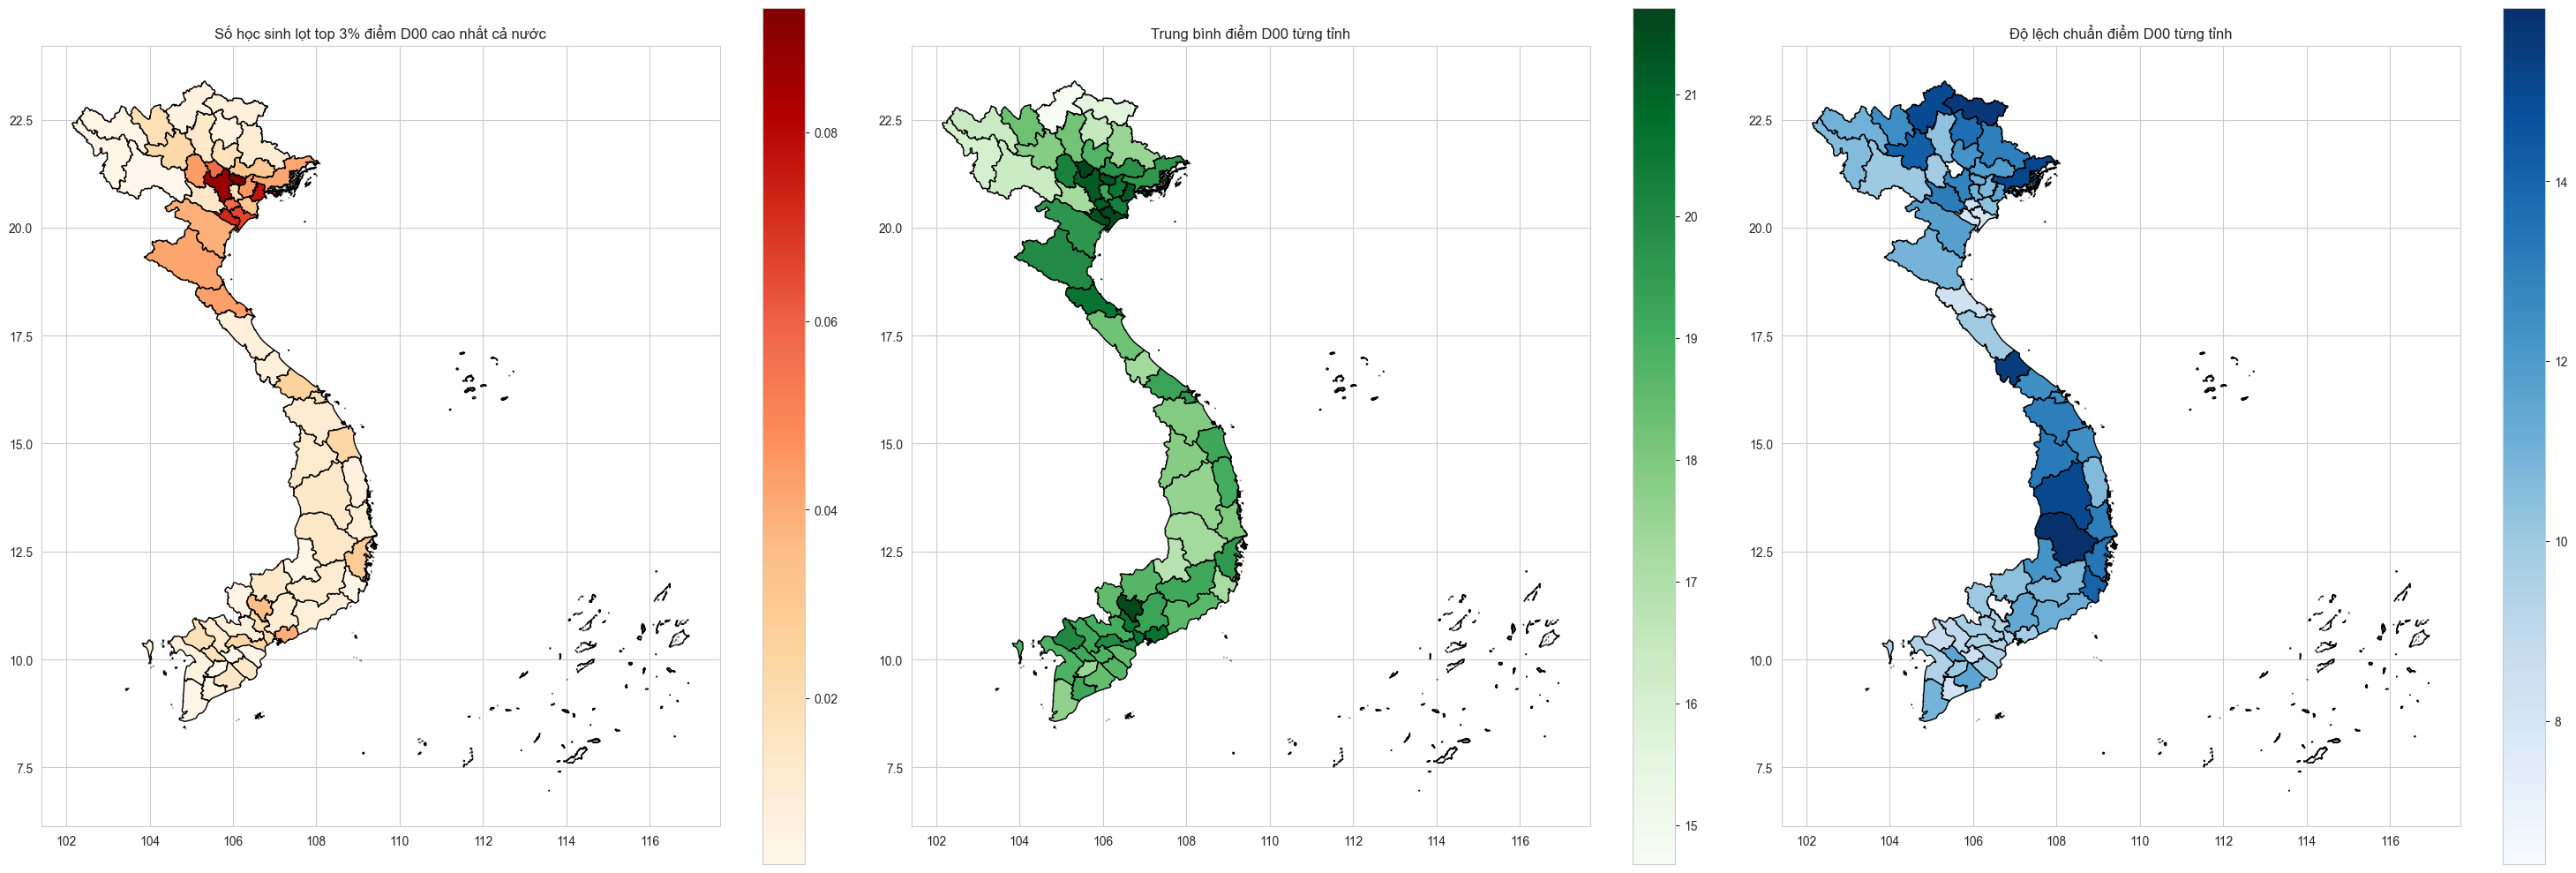

In [21]:
    # LỌC DỮ LIỆU D00
d00 = df_2024[['d00', 'tinh_thi']].dropna()
print('Tổng số thí sinh thi D00 là: ' + str(len(d00)))

# TÍNH TOP 3% ĐIỂM D00
tong = d00['tinh_thi'].value_counts()
top3 = d00[d00['d00'] >= d00['d00'].quantile(0.97)]
Sr_top3 = top3['tinh_thi'].value_counts()
df_top3 = pd.DataFrame({
    'Tỉnh thi': Sr_top3.index,
    'Tỉ lệ thí sinh lọt top 3%': (Sr_top3 / tong.loc[Sr_top3.index]).values
})
gdf_top3 = gdf.merge(df_top3, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH TRUNG BÌNH ĐIỂM D00 TỪNG TỈNH
mean_d00 = d00.groupby('tinh_thi')['d00'].mean().reset_index()
mean_d00.columns = ['Tỉnh thi', 'Trung bình điểm D00']
gdf_mean = gdf.merge(mean_d00, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# TÍNH ĐỘ LỆCH CHUẨN ĐIỂM D00 TỪNG TỈNH
var_d00 = d00.groupby('tinh_thi')['d00'].var().reset_index()
var_d00.columns = ['Tỉnh thi', 'Độ lệch chuẩn điểm D00']
gdf_var = gdf.merge(var_d00, left_on='ten_tinh', right_on='Tỉnh thi', how='left')

# THIẾT LẬP KÍCH THƯỚC VÀ BỐ CỤC BIỂU ĐỒ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# BIỂU ĐỒ 1: TOP 3% ĐIỂM D00
gdf_top3.plot(
    column='Tỉ lệ thí sinh lọt top 3%',
    ax=axes[0],
    cmap='OrRd',
    edgecolor='black',
    legend=True
)
axes[0].set_title('Số học sinh lọt top 3% điểm D00 cao nhất cả nước')

# BIỂU ĐỒ 2: TRUNG BÌNH ĐIỂM D00
gdf_mean.plot(
    column='Trung bình điểm D00',
    ax=axes[1],
    cmap='Greens',
    edgecolor='black',
    legend=True
)
axes[1].set_title('Trung bình điểm D00 từng tỉnh')

# BIỂU ĐỒ 3: ĐỘ LỆCH CHUẨN ĐIỂM D00
gdf_var.plot(
    column='Độ lệch chuẩn điểm D00',
    ax=axes[2],
    cmap='Blues',
    edgecolor='black',
    legend=True
)
axes[2].set_title('Độ lệch chuẩn điểm D00 từng tỉnh')

# TÙY CHỈNH VÀ HIỂN THỊ
plt.tight_layout()
plt.show()


# Chứng minh giả thuyết Miền Bắc học khối A00, A01, D00 tốt hơn miền Nam

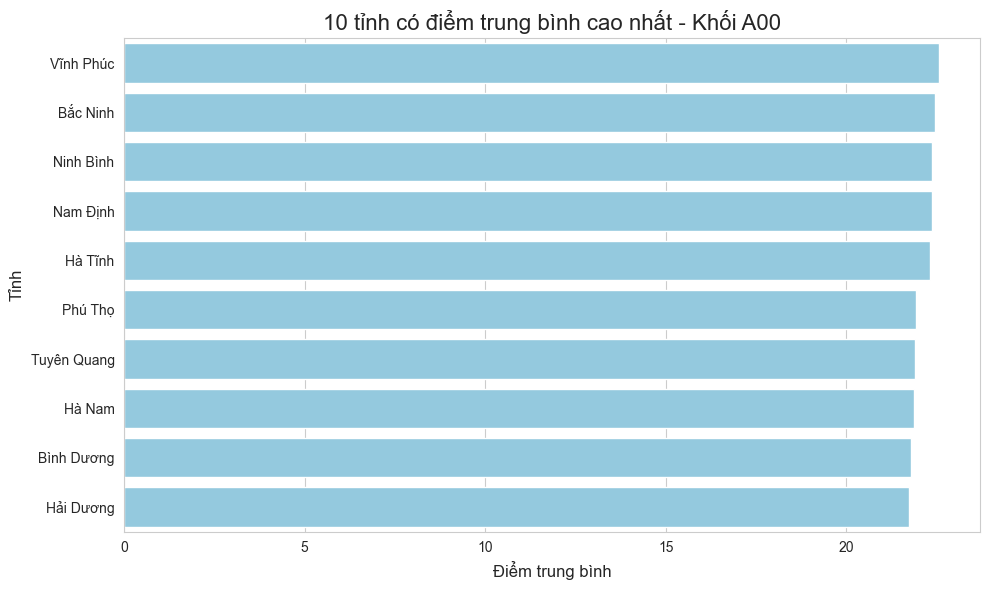

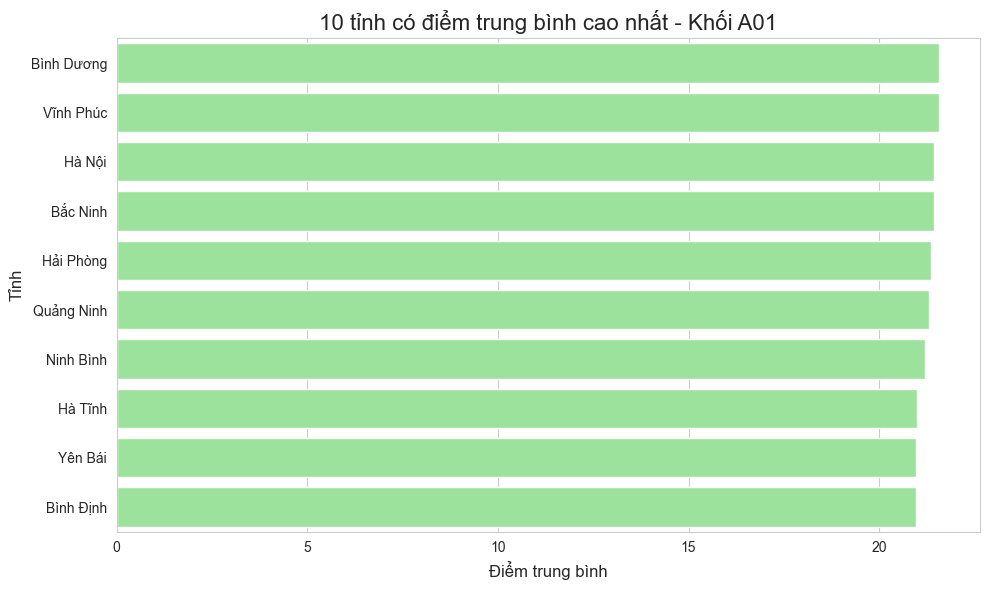

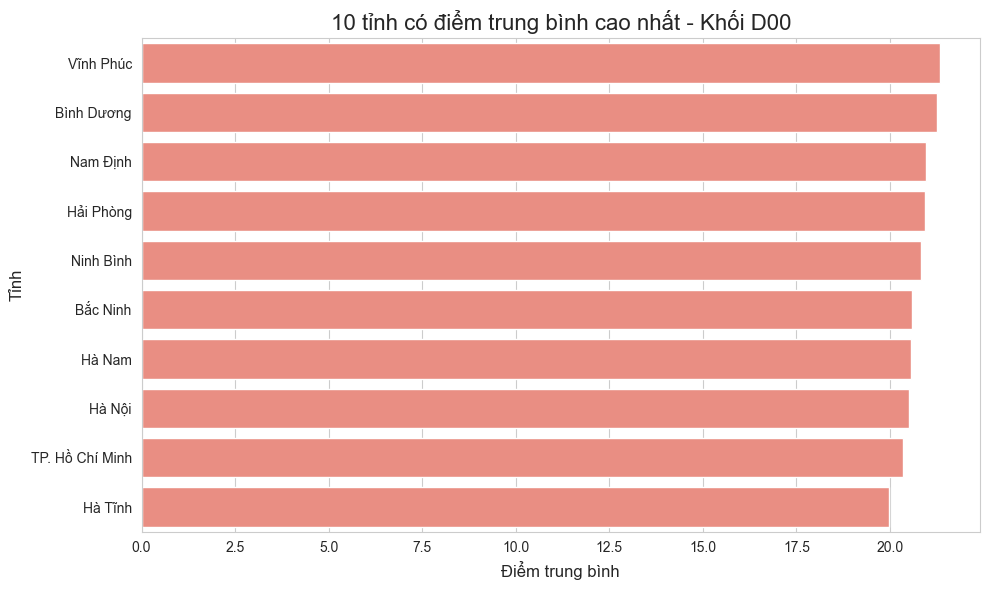

In [22]:
# Tính điểm trung bình mỗi khối theo tỉnh
diem_trung_binh = df_all.groupby('tinh_thi')[['a00', 'a01', 'd00']].mean().reset_index()

# Lấy 10 tỉnh có điểm trung bình cao nhất cho từng khối
top10_a00 = diem_trung_binh.nlargest(10, 'a00')
top10_a01 = diem_trung_binh.nlargest(10, 'a01')
top10_d00 = diem_trung_binh.nlargest(10, 'd00')

# Biểu đồ khối A00
plt.figure(figsize=(10, 6))
sns.barplot(
    x='a00',
    y='tinh_thi',
    data=top10_a00,
    color = 'skyblue'
)
plt.title('10 tỉnh có điểm trung bình cao nhất - Khối A00', fontsize=16)
plt.xlabel('Điểm trung bình', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ khối A01
plt.figure(figsize=(10, 6))
sns.barplot(
    x='a01',
    y='tinh_thi',
    data=top10_a01,
    color = 'lightgreen'

)
plt.title('10 tỉnh có điểm trung bình cao nhất - Khối A01', fontsize=16)
plt.xlabel('Điểm trung bình', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ khối D00
plt.figure(figsize=(10, 6))
sns.barplot(
    x='d00',
    y='tinh_thi',
    data=top10_d00,
    color =  'salmon'
)
plt.title('10 tỉnh có điểm trung bình cao nhất - Khối D00', fontsize=16)
plt.xlabel('Điểm trung bình', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()


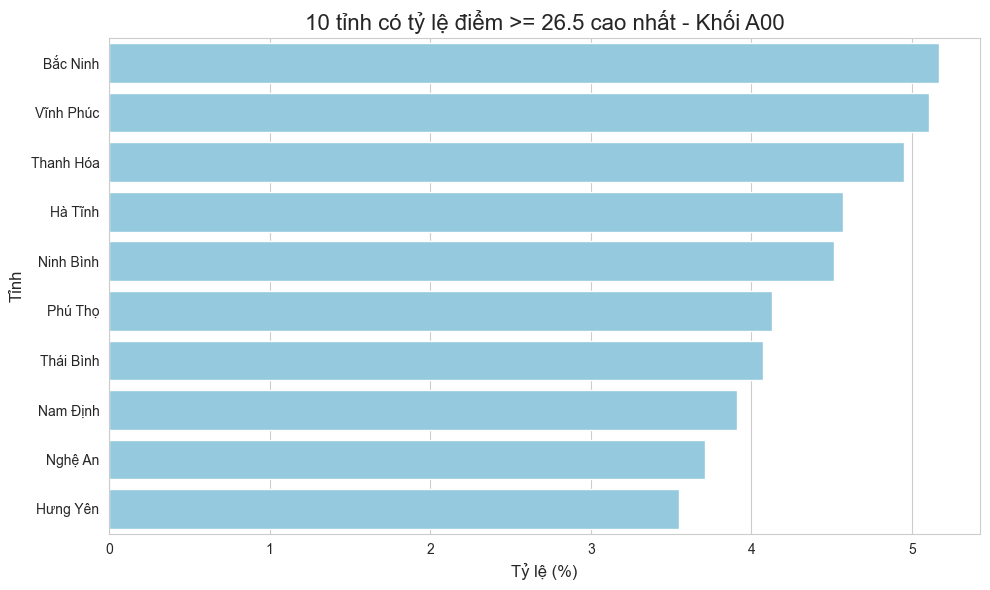

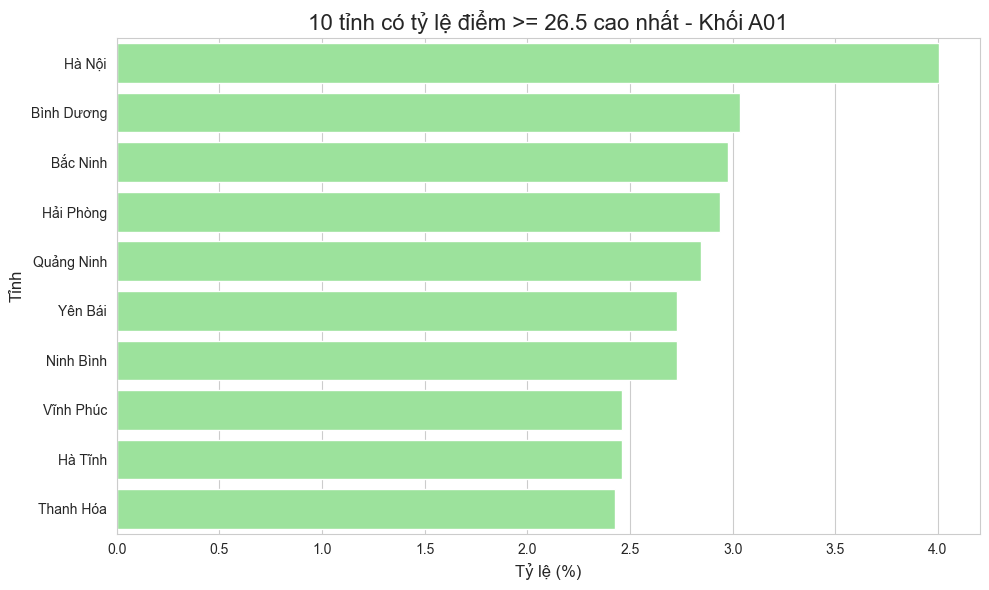

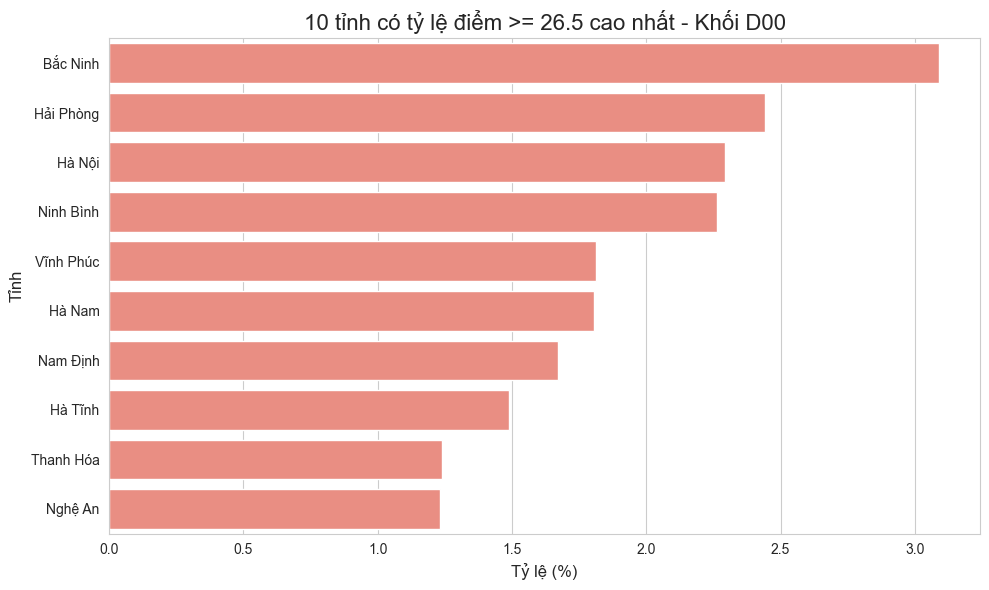

In [23]:
# Tính tỷ lệ thí sinh có điểm >= 26.5 theo khối
def tinh_ty_le_diem_cao(data, mon, threshold):
    # Đếm tổng số thí sinh mỗi tỉnh
    tong_thi_sinh = data.groupby('tinh_thi')[mon].count()
    # Đếm số lượng thí sinh đạt điểm >= threshold mỗi tỉnh
    diem_cao = data[data[mon] >= threshold].groupby('tinh_thi')[mon].count()
    # Tính tỷ lệ
    ty_le = (diem_cao / tong_thi_sinh).fillna(0) * 100  # Tỷ lệ %
    return ty_le.reset_index().rename(columns={mon: 'ty_le'})

# Tính tỷ lệ cho từng khối
ty_le_a00 = tinh_ty_le_diem_cao(df_all, 'a00', 26.5)
ty_le_a01 = tinh_ty_le_diem_cao(df_all, 'a01', 26.5)
ty_le_d00 = tinh_ty_le_diem_cao(df_all, 'd00', 26.5)

# Lấy top 10 tỉnh có tỷ lệ cao nhất
top10_a00 = ty_le_a00.nlargest(10, 'ty_le')
top10_a01 = ty_le_a01.nlargest(10, 'ty_le')
top10_d00 = ty_le_d00.nlargest(10, 'ty_le')

# Vẽ biểu đồ

# Biểu đồ khối A00
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ty_le',
    y='tinh_thi',
    data=top10_a00,
    color='skyblue'
)
plt.title('10 tỉnh có tỷ lệ điểm >= 26.5 cao nhất - Khối A00', fontsize=16)
plt.xlabel('Tỷ lệ (%)', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ khối A01
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ty_le',
    y='tinh_thi',
    data=top10_a01,
    color='lightgreen'
)
plt.title('10 tỉnh có tỷ lệ điểm >= 26.5 cao nhất - Khối A01', fontsize=16)
plt.xlabel('Tỷ lệ (%)', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ khối D00
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ty_le',
    y='tinh_thi',
    data=top10_d00,
    color='salmon'
)
plt.title('10 tỉnh có tỷ lệ điểm >= 26.5 cao nhất - Khối D00', fontsize=16)
plt.xlabel('Tỷ lệ (%)', fontsize=12)
plt.ylabel('Tỉnh', fontsize=12)
plt.tight_layout()
plt.show()


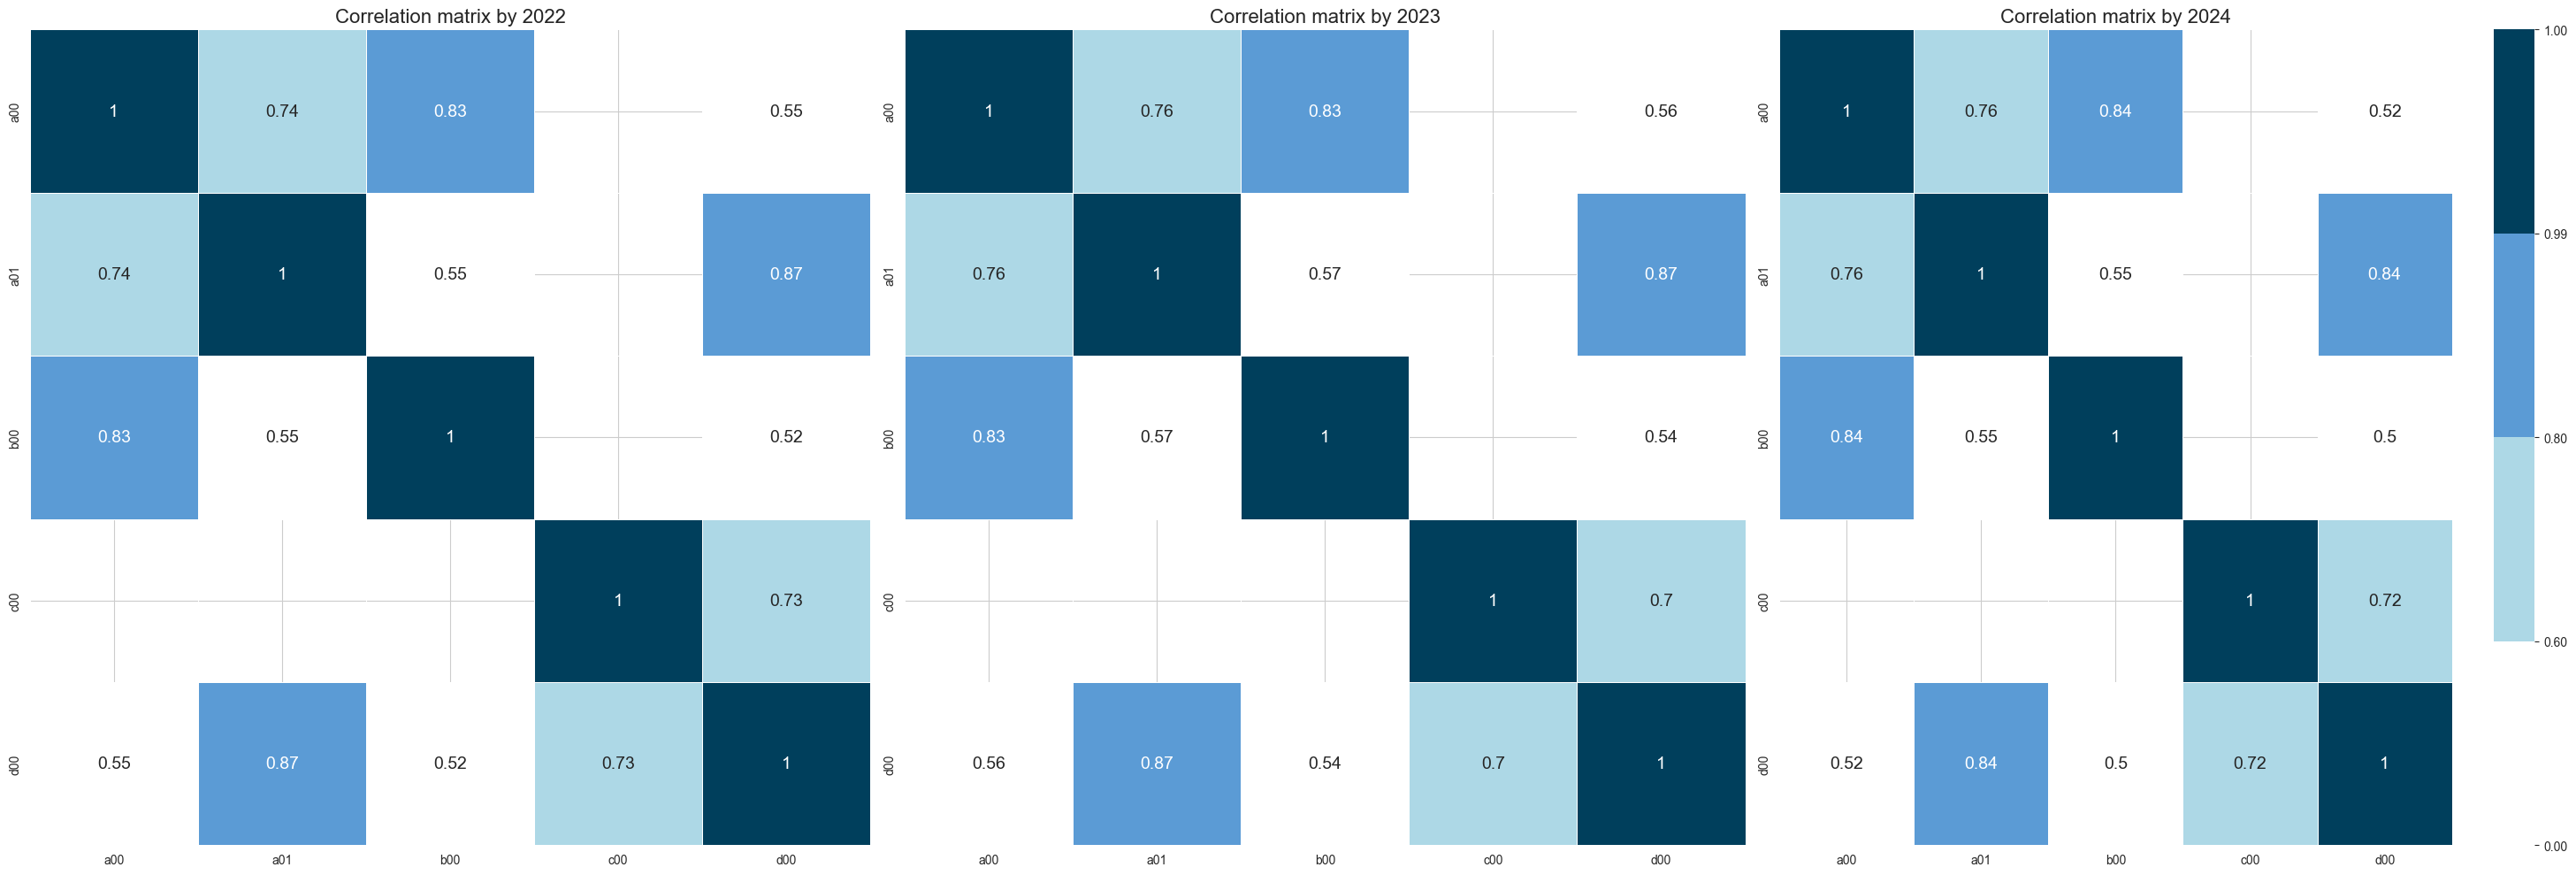

In [24]:
years = [2022, 2023, 2024]
data_frames = [df_2022, df_2023, df_2024]
selected_columns = ['a00', 'a01', 'b00', 'c00', 'd00']
colors = ['white', '#add8e6', '#5b9bd5', '#003f5c']  # light medium dark blues
cmap = ListedColormap(colors)
bounds = [0, 0.6, 0.8, 0.99, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, year in enumerate(years):
    selected_df = data_frames[i][selected_columns]
    corr_matrix = selected_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, norm=norm, ax=axes[i], cbar=(i == 2), linewidths=0.5, linecolor='white', annot_kws={"size": 14})
    axes[i].set_title(f'Correlation matrix by {year}', fontsize=16)

plt.subplots_adjust(wspace=1.5, hspace=0.75)
plt.tight_layout()
plt.show()


# Dùng mô hình hồi quy tuyến tính dự đoán điểm

In [25]:
# Lọc dữ liệu liên quan đến điểm Toán và A00
data_toan_nn = df_2024[['a00', 'toan']].dropna()

# Tách đầu vào (X) và đầu ra (y)
X_nn = data_toan_nn[['toan']]
y_toan_nn = data_toan_nn['a00']
# y = Ax + B

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train_nn, X_test_nn, y_train_toan_nn, y_test_toan_nn = train_test_split(X_nn, y_toan_nn, test_size=0.2, random_state=42)

# Huấn luyện mô hình Linear Regression
model_toan_nn = LinearRegression()
model_toan_nn.fit(X_train_nn, y_train_toan_nn)

# Dự đoán trên tập kiểm tra
y_pred_toan_nn = model_toan_nn.predict(X_test_nn)

# Đánh giá mô hình
mse_toan_nn = mean_squared_error(y_test_toan_nn, y_pred_toan_nn)
r2_toan_nn = r2_score(y_test_toan_nn, y_pred_toan_nn)

mse_toan_nn, r2_toan_nn


(4.651170214574061, 0.5930496156416789)

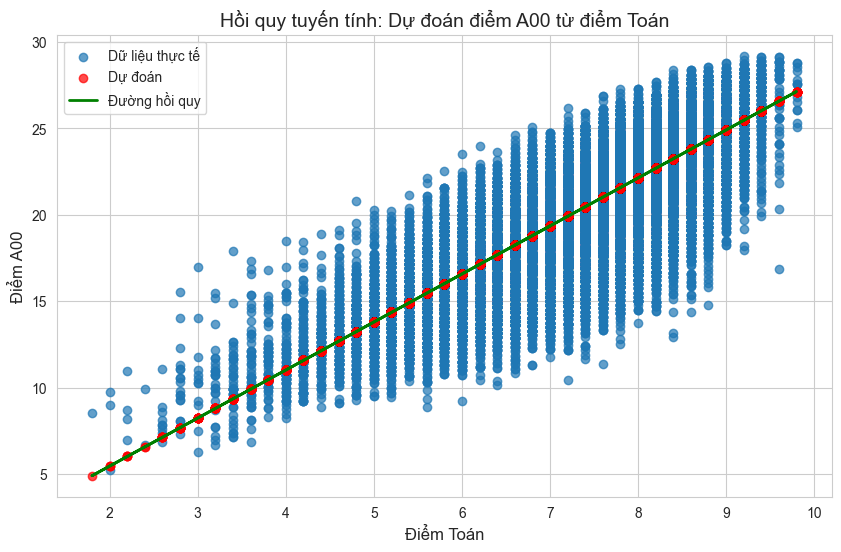

In [26]:
# Vẽ biểu đồ thực tế vs dự đoán trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(X_test_nn, y_test_toan_nn, label='Dữ liệu thực tế', alpha=0.7)
plt.scatter(X_test_nn, y_pred_toan_nn, color='red', label='Dự đoán', alpha=0.7)
plt.plot(X_test_nn, y_pred_toan_nn, color='green', label='Đường hồi quy', linewidth=2)
plt.title('Hồi quy tuyến tính: Dự đoán điểm A00 từ điểm Toán', fontsize=14)
plt.xlabel('Điểm Toán', fontsize=12)
plt.ylabel('Điểm A00', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
